## google drive

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/mount')
# lab.ai.ch
#Ctrl + M + L

Mounted at /content/mount


In [ ]:
%cd '/content/mount/My Drive/00_work/USE'
#!tar zxvf STAIR-captions/stair_captions_v1.2.tar.gz 
!tar zxvf  'universal-sentence-encoder-multilingual-large_3.tar.gz'

In [ ]:
%cd '/content/mount/My Drive/00_work/bleurt/bleurt'
!wget https://storage.googleapis.com/bleurt-oss/bleurt-base-128.zip
!unzip bleurt-base-128.zip

In [ ]:
%cd '/content/mount/My Drive/00_work/bleurt/bleurt'
!wget https://storage.googleapis.com/bleurt-oss/bleurt-large-512.zip
!unzip bleurt-large-512.zip

In [ ]:
!git clone https://github.com/google-research/bleurt

#01_title


In [ ]:
import tensorflow_hub as hub
# import tensorflow_text
import numpy as np
import pandas as pd
import json


def createFile(col,pathout):  
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))

  tiltles = []
  remarks = []
  outFile=[]
  for remark in json_remark:
      # remark_vec = embed(remark["sentence"])
      for title in json_title:
          tiltles.append(title[col])
          remarks.append(remark["sentence"])
          outFile.append([remark["sentence"],title['word'],title[col]])

  df = pd.DataFrame(tiltles, columns=['title'])
  df.to_csv(pathout+"00_candidate_file.csv", header=None,index=None)
  df = pd.DataFrame(remarks, columns=['sentence'])
  df.to_csv(pathout+"00_reference_file_file.csv", header=None,index=None)

  df = pd.DataFrame(outFile, columns=['sentence','word',col])
  df.to_csv(pathout+"00_out_col.csv",index=None)

def linkResult(out_col,score_col,pathout,col):  
    df_out=pd.read_csv(out_col,sep=',',header=0)
    df_score=pd.read_csv(score_col,sep=',',header=None)
    df_score.columns = ['similarity']
    df=pd.concat([df_out,df_score],axis=1)
    #00_base128_score
    df.to_csv(pathout+"00_out_base128_"+col+"_similarity.csv", header=None,index=None)
# 01_title
columns='title'
path='/content/mount/My Drive/00_work/guidance/20200701/01_title/'
# createFile(columns,path)
linkResult(path+'00_out_col.csv',path+'00_base128_score.csv',path,columns)

#02_confirm
columns='confirmation'
path='/content/mount/My Drive/00_work/guidance/20200701/02_confirm/'
# createFile(columns,path)
linkResult(path+'00_out_col.csv',path+'00_base128_score.csv',path,columns)

#03_detail 
columns='detail'
path='/content/mount/My Drive/00_work/guidance/20200701/03_detail/'
# createFile(columns,path)
linkResult(path+'00_out_col.csv',path+'00_base128_score.csv',path,columns)

#04_word  
columns='synonyms'
path='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
# createFile(columns,path)
linkResult(path+'00_out_col.csv',path+'00_base128_score.csv',path,columns)

#05_all  
columns='all'
path='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
# createFile(columns,path)
linkResult(path+'00_out_col.csv',path+'00_base128_score.csv',path,columns)


In [ ]:
%cd '/content/mount/My Drive/00_work/bleurt'
path='/content/mount/My\ Drive/00_work/guidance/20200701/01_title/'
path='/content/mount/My\ Drive/00_work/guidance/20200701/02_confirm/'
path='/content/mount/My\ Drive/00_work/guidance/20200701/03_detail/'
path='/content/mount/My\ Drive/00_work/guidance/20200701/04_word/'
path='/content/mount/My\ Drive/00_work/guidance/20200701/05_all/'
!python -m bleurt.score \
  -candidate_file={path}"00_candidate_file.csv" \
  -reference_file={path}"00_reference_file_file.csv" \
  -bleurt_checkpoint=bleurt/bleurt-base-128  \
  -scores_file={path}"00_base128_score.csv"
 

In [ ]:
# 01_title
columns='title'
path='/content/mount/My Drive/00_work/guidance/20200701/01_title/'
df_out=pd.read_csv(path+'00_out_col.csv',sep=',',header=0)
df_score=pd.read_csv(path+'00_score.csv',sep=',',header=None)
df_score.columns = ['similarity']
df=pd.concat([df_out,df_score],axis=1)
print(df_out.shape)
print(df_score.shape)
print(df.shape)
# df.to_csv(pathout+"00_out_"+col+"_similarity.csv", header=None,index=None)

# 環境構築
```
# MeCabのインストール
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3
# mecab-ipadic-NEologdのインストール
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a
!pip install unidic-lite
```


##word2vec

In [ ]:
# %cd '/content/mount/My Drive/00_work/word2vec'
#https://drive.google.com/file/d/0ByFQ96A4DgSPUm9wVWRLdm5qbmc/view
# !unzip vector_neologd.zip

## install MeCab

In [2]:
# install MeCab
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null
!pip install unidic-lite > /dev/null
! export MECABRC="/etc/mecabrc"
!pip install tensorflow_text > /dev/null
!pip install jaconv > /dev/null
###################ginza
# !pip install ginza > /dev/null
# !pip install git+https://github.com/boudinfl/pke.git > /dev/null
# !python -m nltk.downloader stopwords > /dev/null
# !apt install aptitude swig > /dev/null

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [15]:
!pip install tensorflow_text==2.2.0 > /dev/null

!pip install tf_sentencepiece > /dev/null

##import

In [3]:
import MeCab  as mc
import subprocess
import json
import pandas as pd
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
import readline
from gensim.models import word2vec
import MeCab
import re
import warnings
from sklearn import preprocessing
# import pke
# pke.base.ISO_to_language['ja_ginza'] = 'japanese'
# import ginza
# import nltk
import gensim
# stopwords = list(ginza.STOP_WORDS)
# nltk.corpus.stopwords.words_org = nltk.corpus.stopwords.words
# nltk.corpus.stopwords.words = lambda lang : stopwords if lang == 'japanese' else nltk.corpus.stopwords.words_org(lang)
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,shell=True).communicate()[0]).decode('utf-8')
m=mc.Tagger("-d {0}".format(path))
warnings.simplefilter('ignore')
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
pathout='/content/mount/My Drive/00_work/INES_guidance/w2vmodel/ja-gensim.50d.data.model'
model_w2v50 = word2vec.Word2Vec.load(pathout) # path of w2v model
pathword2vec='/content/mount/My Drive/00_work/fastText_w2v/model.vec'
model_w2v300 = gensim.models.KeyedVectors.load_word2vec_format(pathword2vec, binary=False)

In [ ]:
# %cd '/content/mount/My Drive/00_work'
# !unzip guidance_org.zip

In [18]:
modpath='/content/mount/My Drive/00_work/INES_guidance/w2vmodel/ja-gensim.50d.data.model'
sw=synonymswords(modpath)

In [ ]:
plst=['放置','単語','場合']
nlst=['用法','単語の場合']
n=10
sw.getsynonyms_wdlist(pwdlst=plst,th=0.8,topn=n)


## word2vec import

In [3]:
from gensim.models import word2vec
import warnings
warnings.simplefilter('ignore')
pathout='/content/mount/My Drive/00_work/INES_guidance/w2vmodel/ja-gensim.50d.data.model'
model_w2v50 = word2vec.Word2Vec.load(pathout) # path of w2v model


In [8]:
import gensim
pathword2vec='/content/mount/My Drive/00_work/fastText_w2v/model.vec'
model_w2v300 = gensim.models.KeyedVectors.load_word2vec_format(pathword2vec, binary=False)

In [17]:
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [ ]:
model_w2v300.most_similar(positive=['知的','発達','影響'],topn=20)

In [97]:
words_txt = "同情引く"
print(m.parse(words_txt))

同情	名詞,サ変接続,*,*,*,*,同情,ドウジョウ,ドージョー
引く	動詞,自立,*,*,五段・カ行イ音便,基本形,引く,ヒク,ヒク
EOS



In [99]:
searchstr='ミュンヒハウゼン症候群'
model_w2v50.most_similar(positive=[searchstr],topn=10)

[('糖尿病性ニューロパチー', 0.9011921882629395),
 ('結節性硬化症', 0.8835355043411255),
 ('代理ミュンヒハウゼン症候群', 0.8818574547767639),
 ('傍腫瘍性神経症候群', 0.879774808883667),
 ('hypp', 0.8777968883514404),
 ('トルーソー', 0.8757524490356445),
 ('レベチラセタム', 0.873195469379425),
 ('ヘモクロマトーシス', 0.8724767565727234),
 ('イフェクサー', 0.8678131103515625),
 ('ストロイスラー', 0.8668649196624756)]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
searchstr='硬膜下血腫'
searchstr='虚偽'
words='知的発達面への影響 低い自己評価'
# sims=model_w2v300.most_similar(positive=['知的','発達','影響'],topn=100)
sims=model_w2v50.most_similar(positive=[searchstr],negative=[],topn=1000)
cos_sim=cosine_similarity(embed(np.array(sims)[:,0]),embed([searchstr]))
sims_exp=np.expand_dims(np.array(sims)[:,0],axis=1)
use_sim=np.concatenate([cos_sim,sims_exp],axis=1)
sorted(use_sim,key=lambda x:x[0], reverse=True)[0:50]

In [104]:
cosine_similarity(embed(['代理によるミュンヒハウゼン症候群']),embed(['虚偽や症状の捏造']))

array([[0.36656892]], dtype=float32)

In [33]:
sims_exp.shape

(20, 1)

In [8]:
simlst=model_w2v50.most_similar(positive=['搾取'],negative=[],topn=10)
th=0.85
# retsim=[]
# for sim in simlst:
#   if sim[1]

In [11]:
th=0.8
list(filter(lambda x: x[1] > th, simlst))

[('抑圧', 0.8276890516281128),
 ('収奪', 0.8263579607009888),
 ('助長', 0.8150772452354431),
 ('差別', 0.8112378120422363),
 ('腐敗', 0.8038375377655029),
 ('排除', 0.8019343614578247)]

In [ ]:
model_w2v50.most_similar(positive=['性的搾取'],topn=10)

In [ ]:
sample_txt = "発言し"
print("Mecab:\n", m.parse(sample_txt))

In [ ]:
# print(m_cab2.parse('身体的影響'))
print(m.parse('母は昼から男のところへ遊びにいき、私は朝まで放置されました。'))

In [ ]:
words=['ネグレクト','置き去り','無視','放置','怠る']
remark1=['顔','腫れ上がり','額','ケロイド','出来','怠る']
remark2=['母','男','遊び','いき','放置']

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(embed(remark1),embed(words))

In [ ]:
cosine_similarity(model_w2v50.wv[remark1],model_w2v50.wv[words])

In [ ]:
words=['痴愚','知的障害者','知能障害','魯鈍']
cosine_similarity(embed(words),embed(words))

In [ ]:
cosine_similarity(model_w2v50.wv[words],model_w2v50.wv[words])

In [ ]:
words=['知的発達面への影響','ちてきしょうがい','痴愚','知的発達遅滞','知的発達障がい','知的発達障害','知的発達障害者','知的発達障碍','知的発達障礙','知的障害児','知的障害者','知的障碍','知的障碍者','知的障礙','知的障礙者','知能障害','知障者','精神発達遅滞','精神薄弱児','精薄児','精薄者','魯鈍']
remark1=['知的発達面への影響','ちてきしょうがい','痴愚','知的発達遅滞','知的発達障がい','知的発達障害','知的発達障害者','知的発達障碍','知的発達障礙','知的障害児','知的障害者','知的障碍','知的障碍者','知的障礙','知的障礙者','知能障害','知障者','精神発達遅滞','精神薄弱児','精薄児','精薄者','魯鈍']
# remark2=['母','男','遊び','いき','放置']
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(embed(words),embed(remark1))

In [ ]:
words=['知的発達面への影響','ちてきしょうがい','痴愚','知的発達遅滞','知的発達障がい','知的発達障害','知的発達障害者','知的発達障碍','知的発達障礙','知的障害児','知的障害者','知的障碍','知的障碍者','知的障礙','知的障礙者','知能障害','知障者','精神発達遅滞','精神薄弱児','精薄児','精薄者','魯鈍']
for w in words:
  if w in model_w2v50.wv:
    print(w,",〇")
  else:
    print(w,",×")

In [ ]:
words=['知的発達面への影響','ちてきしょうがい','痴愚','知的発達遅滞','知的発達障がい','知的発達障害','知的発達障害者','知的発達障碍','知的発達障礙','知的障害児','知的障害者','知的障碍','知的障碍者','知的障礙','知的障礙者','知能障害','知障者','精神発達遅滞','精神薄弱児','精薄児','精薄者','魯鈍']
# remark2=['母','男','遊び','いき','放置']
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(embed(words),embed(words))

In [ ]:
remark2=['痴愚','知的障害者','知能障害','魯鈍']
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(embed(words),embed(words))

0.58717793

In [ ]:
cosine_similarity(model_w2v50.wv[words],model_w2v50.wv[words])

In [ ]:
sim_a=[]
for w in words:
  sim_l=[]
  for r in remark2:
    sim=w2v.similarity(w,r)
    sim_l.append(sim)
  sim_a.append(sim_l)

In [ ]:
model_w2v50.most_similar(positive=['性的搾取'],topn=10)

In [ ]:
model_w2v50.most_similar_cosmul(['子供','身体','影響','虐待'],topn=50)

In [ ]:
model_w2v50.most_similar(positive=['知的障害者'],topn=10)

In [ ]:
import pprint
pprint.pprint(model_w2v.most_similar(positive=['女', '国王'], negative=['男']))
# pprint.pprint(model_w2v.similarity('国王', '王妃'))
# # => 0.74155587641044496
# pprint.pprint(model_w2v.similarity('国王', 'ラーメン'))

In [ ]:
model_w2v.most_similar('中学1年生')#,negative=['身体'])) #'ネグレクト','無視','放置','怠る'

In [6]:
print(model_w2v.most_similar(positive=['影響','身体','虐待']))#,negative=['身体'])) #'ネグレクト','無視','放置','怠る'

NameError: ignored

In [ ]:
model_w2v.get_vector('身体的虐待').shape

(300,)

In [ ]:
model_w2v.most_similar('身体的虐待')

In [ ]:
!git clone https://github.com/philipperemy/japanese-word-to-vectors.git

In [ ]:
%cd japanese-word-to-vectors

/content/mount/My Drive/00_work/word2vec/japanese-word-to-vectors


In [ ]:
!pip3 install -r requirements.txt

In [ ]:
!bzip2 -d  jawiki_20180420_100d.pkl.bz2

In [ ]:
!wget https://dumps.wikimedia.org/jawiki/latest/jawiki-latest-pages-articles.xml.bz2

In [ ]:
!python3 generate_vectors.py 

In [ ]:
!python3 generate_vectors.py --mecab

In [ ]:
!wget http://wikipedia2vec.s3.amazonaws.com/models/ja/2018-04-20/jawiki_20180420_100d.pkl.bz2

In [ ]:
!pip install chakin

In [ ]:
import chakin
chakin.search(lang='Japanese')

In [ ]:
fnmode='/content/mount/My Drive/00_work/word2vec/word2vec.gensim.model'
# w2v = gensim.models.KeyedVectors.load_word2vec_format(fnmode, binary=False)
w2v = word2vec.Word2Vec.load(fnmode) 

In [ ]:
w2v.most_similar('身体的虐待')

[('近親姦', 0.8238307237625122),
 ('性的虐待', 0.8128407597541809),
 ('ドメスティックバイオレンス', 0.8069393634796143),
 ('性犯罪', 0.8037077188491821),
 ('ネグレクト', 0.7936483025550842),
 ('児童虐待', 0.7804021239280701),
 ('人工妊娠中絶', 0.7800942063331604),
 ('医療過誤', 0.7763338685035706),
 ('精神疾患', 0.7758262157440186),
 ('心的外傷後ストレス障害', 0.7734633684158325)]

In [ ]:
chakin.download(number=22, save_dir='./') # select fastText(en)

Test: 100% ||                                      | Time:  0:00:02  60.7 MiB/s


'./latest-ja-word2vec-gensim-model.zip'

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [ ]:
import tensorflow as tf
fn='/content/mount/My Drive/00_work/USE'
model_1=tf.keras.models.load_model(fn)
# model_1 = tf.saved_model.load(fn)

In [ ]:
import tensorflow_text as text
tokenizer = text.UnicodeScriptTokenizer ()
tokens = tokenizer.tokenize(['everything not saved will be lost.', u'Sad☹'.encode('UTF-8')])
print(tokens.to_list())

[[b'everything', b'not', b'saved', b'will', b'be', b'lost', b'.'], [b'Sad', b'\xe2\x98\xb9']]


In [ ]:
embed.trainable_variables

In [ ]:
!wget 'https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3?tf-hub-format=compressed' universal-sentence-encoder-multilingual-large_3.tar.gz

# 環境構築 USE

In [ ]:
!pip install tensorflow==2.2.0 > /dev/null
!pip3 install --quiet seaborn > /dev/null
!pip install sentencepiece > /dev/null
!pip install tf_sentencepiece > /dev/null
!pip install tensorflow_text==2.2.0 > /dev/null
!pip install jaconv > /dev/null

In [ ]:
import tensorflow.compat.v1 as tf
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
import tf_sentencepiece
from sklearn.metrics.pairwise import cosine_similarity
embed_ml3 = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
embed_mqa = hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual-qa/3')
# Set up graph.
g = tf.Graph()
with g.as_default():
  xling_8_embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder-xling-many/1")
  text_input = tf.placeholder(dtype=tf.string, shape=[None])
  embedded_text = xling_8_embed(text_input)  
  init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()
# Initialize session.
session = tf.Session(graph=g)
session.run(init_op)

def embed_xm1_single(str_input):
  ja_result = session.run(embedded_text, feed_dict={text_input: [str_input]})
  return ja_result
def embed_xm1(strList):
  ja_result = session.run(embedded_text, feed_dict={text_input: strList})
  return ja_result

def embed_qa_q(q):  
  question_embeddings = embed_mqa.signatures['question_encoder'](
              tf.constant(q))
  return question_embeddings['outputs']
def embed_qa_r(r,rc):  
  response_embeddings = embed_mqa.signatures['response_encoder'](
          input=tf.constant(r),
          context=tf.constant(rc))
  return response_embeddings['outputs']

def embed_qa_sim(q,r,rc):  
  question_embeddings = embed_mqa.signatures['question_encoder'](
              tf.constant(q))
  response_embeddings = embed_mqa.signatures['response_encoder'](
          input=tf.constant(r),
          context=tf.constant(rc))
  res=cosine_similarity(question_embeddings['outputs'], response_embeddings['outputs'])
  return res
def embed_qa_sim_a(q,r,rc):  
  question_embeddings1= embed_mqa.signatures['question_encoder'](
                tf.constant(q[0:3000]))
  question_embeddings2= embed_mqa.signatures['question_encoder'](
                tf.constant(q[3000:]))
  question_embeddings=np.concatenate([question_embeddings1['outputs'],question_embeddings2['outputs']],axis=0)

  response_embeddings = embed_mqa.signatures['response_encoder'](
            input=tf.constant(r),
            context=tf.constant(rc))

  res=cosine_similarity( response_embeddings['outputs'],question_embeddings['outputs'])
  return res
def embed_qa_sim_b(q,r,rc):  
  question_embeddings1= embed_mqa.signatures['question_encoder'](
                tf.constant(q[0:3000]))
  question_embeddings2= embed_mqa.signatures['question_encoder'](
                tf.constant(q[3000:]))
  question_embeddings=np.concatenate([question_embeddings1['outputs'],question_embeddings2['outputs']],axis=0)

  response_embeddings = embed_mqa.signatures['response_encoder'](
            input=tf.constant(r),
            context=tf.constant(rc))

  res=cosine_similarity( question_embeddings['outputs'],response_embeddings['outputs'])
  return res

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


#新ガイダンスの類語追加方法

## src synonym words

In [ ]:
from gensim.models import word2vec
import warnings
warnings.simplefilter('ignore')
class synonymswords():
    def __init__(self,modpath):
      self.w2v = word2vec.Word2Vec.load(modpath) 
    def getsynonyms(self, wd,th=0.6,topn=10):
      retsim=[]
      in_voc_flg=False
      if wd in self.w2v.wv:
        in_voc_flg=True
        simlst=self.w2v.wv.most_similar(positive=[wd],topn=topn)
        retsim=list(filter(lambda x: x[1] > th, simlst))
      else:
        print("word %s not in vocabulary" % (wd))
      if in_voc_flg and len(retsim)==0:
        print("閾値の値を下げてください")
      return retsim
    def getsynonyms_wdlist(self, pwdlst,nwdlst=[],th=0.6,topn=10):
      retsim=[]
      wdln=[]
      nwdln=[]
      wdlnotexist=[]
      in_voc_flg=False
      for wd in pwdlst:
        if wd in self.w2v.wv:
          wdln.append(wd)
        else:
          wdlnotexist.append(wd)
      for wd in nwdlst:
        if wd in self.w2v.wv:
          nwdln.append(wd)
        else:
          wdlnotexist.append(wd)
      if len(wdlnotexist)>0:
          print("word %s not in vocabulary" % (",".join(map(str, wdlnotexist))))
      if len(wdln)>0:
        in_voc_flg=True
        simlst=self.w2v.wv.most_similar(positive=wdln,negative=nwdln,topn=topn)
        retsim=list(filter(lambda x: x[1] > th, simlst))
      if in_voc_flg and len(retsim)==0:
        print("閾値の値を下げてください")
      return retsim
      

#modpath='00_work/INES_guidance/w2vmodel/ja-gensim.50d.data.model'
#sw=synonymswords(modpath)
#sw.getsynonyms('放置',topn=10)
#sw.getsynonyms_wdlist(['放置','da放置'],topn=10)

'''
クラスの使い方
１．クラスを作成
  クラス名：synonymswords
  引数modpath：word2vecモデルのフルパス
  サンプル：
  modpath='00_work/INES_guidance/w2vmodel/ja-gensim.50d.data.model'
  sw=synonymswords(modpath)
２．ワードの類語を取得
   関数：getsynonyms(self, wd,th=0.6,topn=10):
   引数：wd：単語
         th：閾値
         topn：取得予定の類語個数(入力しなし場合。10です) 
   サンプル：
   wd='放置'
   n=10
   synonymsList=sw.getsynonyms(wd,topn=n)
3．ワードリストの類語を取得
   関数：getsynonyms_wdlist(self, pwdlst,nwdlst=[],th=0.6,topn=10):
   引数：pwdlst：positive単語リスト
                サンプル：['類語','単語','場合']
         nwdlst :negative単語(入力しなし場合。空きとします) 
         th：閾値
         topn：取得予定の類語個数(入力しなし場合。10です) 
   サンプル：
   plst=['放置','単語','場合']
   nlst=['用法','単語の場合']
   n=10
   th=0.7
   sw.getsynonyms_wdlist(pwdlst=plst,nwdlst=nlst,th=th,topn=n)
'''

## mecab_w2v_use

In [ ]:
import MeCab  as mc
import subprocess
import pandas as pd
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
from gensim.models import word2vec
import re
import gensim
import warnings
from sklearn.metrics.pairwise import cosine_similarity
warnings.simplefilter('ignore')
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,shell=True).communicate()[0]).decode('utf-8')
m=mc.Tagger("-d {0}".format(path))
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
pathout='/content/mount/My Drive/00_work/INES_guidance/w2vmodel/ja-gensim.50d.data.model'
model_w2v50 = word2vec.Word2Vec.load(pathout) # path of w2v model
pathword2vec='/content/mount/My Drive/00_work/fastText_w2v/model.vec'
model_w2v300 = gensim.models.KeyedVectors.load_word2vec_format(pathword2vec, binary=False)

In [4]:
model_w2v=model_w2v50
# model_w2v=model_w2v300
m=mc.Tagger("-d {0}".format(path))

In [ ]:
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
word_filter=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
['形容詞','自立']]
word_filter=[
['接頭詞'],
['動詞'],
['名詞'],
['形容詞']]
def words_filter(lines):
  main_words=[]
  for line in lines:
     items=re.split('[\t,]',line)
     if len(items) > 1:
        for f in word_filter:
          # if items[1]==f[0] and items[2]==f[1]:
          if items[1]==f[0]:
              main_words.append(items[0])
  return main_words
def getWordLst(words):
  w_mecb=m.parse(words)
  lines=w_mecb.split(sep='\n')
  return words_filter(lines)
wordsLst=['代理によるミュンヒハウゼン症候群','症状捏造']
nu=10
nw=10
nwMax=1000
# for words in wordsLst:

def getUsrWvTopn(words):
  wordsLstMe=getWordLst(words)
  sysUseTopnLst=[]
  sysW2vTopnLst=[]
  for word in wordsLstMe:
    synonymsWv=model_w2v.wv.most_similar(word,topn=nwMax)
    sysWords=np.array(synonymsWv)[:,0]
    simLst=cosine_similarity(embed(sysWords),embed([word]))
    sysWordsExpdim=np.expand_dims(sysWords,axis=1)
    sysUse=np.concatenate([sysWordsExpdim,simLst],axis=1)
    sysUseTopn=sorted(sysUse,key=lambda x:x[1], reverse=True)[0:nu]
    sysW2vTopn=sorted(synonymsWv,key=lambda x:x[1], reverse=True)[0:nw]
    sysW2vTopnLst.append(sysW2vTopn)
    sysUseTopnLst.append(sysUseTopn)
  return [wordsLstMe,sysW2vTopnLst,sysUseTopnLst]


wordsLstMe,sysW2vTopnLst,sysUseTopnLst=getUsrWvTopn(wordsLst[0])
def getWordsTopn(lstMe,topnLst):
  sysW2vArr=None
  for lst in topnLst:
    if sysW2vArr is None:
      sysW2vArr=lst
    else:
      sysW2vArr=np.concatenate([sysW2vArr,lst],axis=1)
  import pandas  as pd
  cols=[]
  for col in lstMe:
    cols.append(col)
    cols.append('確認度')
  return pd.DataFrame(sysW2vArr,columns=cols)
# getWordsTopn(wordsLstMe,sysW2vTopnLst)
# getWordsTopn(wordsLstMe,sysUseTopnLst)
# wordsLstMe,sysW2vTopnLst,sysUseTopnLst=getUsrWvTopn('代理ミュンヒハウゼン症候群')
# wordsLstMe,sysW2vTopnLst,sysUseTopnLst=getUsrWvTopn(wordsLst[0])
# print("word2vec\n",getWordsTopn(wordsLstMe,sysW2vTopnLst))
# print("use\n",getWordsTopn(wordsLstMe,sysUseTopnLst))

In [17]:
wordsLst=['身体的虐待','ネグレクト','性的虐待','心理的虐待','身体的影響','知的発達面への影響',
          '対人関係の障害','低い自己評価','行動コントロールの問題','多動','心的外傷後ストレス障害',
          '偽成熟性',
          # '精神的病状',
          '硬膜下血腫',
          # '乳幼児揺さぶられ症候群',
          '代理によるミュンヒハウゼン症候群',
          '子ども虐待の発生要因']
for word in wordsLst:
  wordsLstMe,sysW2vTopnLst,sysUseTopnLst=getUsrWvTopn(word)
  df_w=getWordsTopn(wordsLstMe,sysW2vTopnLst)
  df_u=getWordsTopn(wordsLstMe,sysUseTopnLst)
  fd='/content/mount/My Drive/00_work/guidance/002_output_dt/me_w2v_use/'
  df_w.to_csv(fd+word+"_w.csv",index=None)
  df_u.to_csv(fd+word+"_u.csv",index=None)

In [ ]:
wordsLstMe,sysW2vTopnLst,sysUseTopnLst=getUsrWvTopn('知的発達面への影響')
print("word2vec\n",getWordsTopn(wordsLstMe,sysW2vTopnLst)
print("use\n",getWordsTopn(wordsLstMe,sysUseTopnLst))

In [ ]:
# model_w2v300.wv['精神的病状']
text='ある程度に体が成長した児童では、多少揺すられた程度では、反射的に体をこわばらせるため、そう簡単に怪我をすることはないが、同じことを首が据わっておらず頭蓋骨も隙間の多い新生児で行うと、眼底出血や頭蓋内出血（クモ膜下出血など）・脳挫傷を伴う致命的な怪我を負わせかねない。また身体の組織が成長途上で柔らかく力も弱い幼児でも、過度に揺すられると、程度の差こそあれ問題となる場合もあるとみなされる。'
m=mc.Tagger("-d {0}".format(path))
lines=m.parse(text)
for line in lines.split(sep='\n'):
  print(line)    

In [14]:
m.parse('偽成熟性')

'偽\t接頭詞,名詞接続,*,*,*,*,偽,ニセ,ニセ\n成熟\t名詞,サ変接続,*,*,*,*,成熟,セイジュク,セイジュク\n性\t名詞,接尾,一般,*,*,*,性,セイ,セイ\nEOS\n'

In [ ]:
# !pip install html2text
!pip install bs4

In [ ]:
from urllib.request import urlopen
import html2text as h2t
from bs4 import BeautifulSoup
from urllib.parse import quote
import string
url='https://ja.wikipedia.org/wiki/揺さぶられっ子症候群'
# url='https://renso-ruigo.com/word/身体的虐待'
url = quote(url, safe=string.printable)
html = urlopen(url, timeout=20).read().decode('utf-8','ignore').replace(u'\xa9', u'')
soup = BeautifulSoup(html)
for script in soup(["script", "style"]):
    script.decompose()
strips = list(soup.stripped_strings)
for text in strips:
  # lines=m.parse(text)
  # for line in lines.split(sep='\n'):
  #   print(line)   
  print(text)

In [84]:
'https://ja.wikipedia.org/wiki/揺さぶられっ子症候群'.encode('utf-8')
https://ja.wikipedia.org/wiki/%E6%8F%BA%E3%81%95%E3%81%B6%E3%82%89%E3%82%8C%E3%81%A3%E5%AD%90%E7%97%87%E5%80%99%E7%BE%A4

b'https://ja.wikipedia.org/wiki/\xe6\x8f\xba\xe3\x81\x95\xe3\x81\xb6\xe3\x82\x89\xe3\x82\x8c\xe3\x81\xa3\xe5\xad\x90\xe7\x97\x87\xe5\x80\x99\xe7\xbe\xa4'

In [43]:
# !curl -o wikipedia_synonym.py https://raw.githubusercontent.com/ikegami-yukino/misc/master/data/wikipedia_synonym.py
# !python wikipedia_synonym.py
!wc -l wikipedia_synonym.txt

365585 wikipedia_synonym.txt


#program USE

## common function

In [ ]:
import numpy as np
import pandas as pd
dtlst=[
       [['a',0.8],['b',0.7],['c',0.6],['d',0.3]],
       [['b',0.9],['e',0.5],['c',0.4],['a',0.3]],
       [['a',0.6],['e',0.3],['f',0.2],['g',0.1]],
]
dtlst=[
       [[0,0.8],[1,0.7],[2,0.6],[3,0.3]],
       [[1,0.9],[4,0.5],[2,0.4],[0,0.3]],
       [[0,0.6],[4,0.3],[5,0.2],[6,0.1]],
]
def get_topn_dt(dtlst,n):
  dtlstn=[]
  for i, dt in enumerate(dtlst):
    for dtj in dt:
      dtlstn.append(dtj+[i])
  df=pd.DataFrame(dtlstn,columns=['docid','p','c'])
  dg=df.groupby(['docid'])
  dga=dg.agg({'p':'mean','c':'count'})
  dga.columns=['p','cnt']
  dga_n=dga.sort_values(by=['cnt','p'],ascending=False)
  
  words=np.array(dga_n.iloc[0:n,:].index)
  pm=np.array(dga_n.iloc[0:n,0])
  res=[]
  for w, p in zip(words,pm):
    res.append([w,p])
  return res
def pre_process_sen(sent):
  sps=['…','･･･','※','-']
  for s in sps:
    sent=sent.replace(s,'')
  result = re.sub(r'[・　。、･]+', '', sent)
  return result

In [ ]:
n=6
dtlstn=[]
for i, dt in enumerate(dtlst):
  for dtj in dt:
    dtlstn.append(dtj+[i])
df=pd.DataFrame(dtlstn,columns=['word','p','c'])
dg=df.groupby(['word'])
dga=dg.agg({'p':'mean','c':'count'})
dga.columns=['p','cnt']
dga_n=dga.sort_values(by=['cnt','p'],ascending=False)

words=np.array(dga_n.iloc[0:n,:].index)
pm=np.array(dga_n.iloc[0:n,0])
res=[]
for w, p in zip(words,pm):
  res.append([w,p])

In [ ]:
dtlst_new=dtlst
# dtlst_new[0]=dtlst_new*2

In [ ]:
dtarr_new=np.array(dtlst[0])
dtarr_new[:,1]=dtarr_new[:,1]*2
dtlst[0]=list(dtarr_new)

In [ ]:
dtlst

[[array([0. , 6.4]), array([1. , 5.6]), array([2. , 4.8]), array([3. , 2.4])],
 [[1, 0.9], [4, 0.5], [2, 0.4], [0, 0.3]],
 [[0, 0.6], [4, 0.3], [5, 0.2], [6, 0.1]]]

## 000_use concat

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
import re
from  datetime import datetime as dt
from sklearn.metrics.pairwise import cosine_similarity
import csv
fn_s='/content/mount/My Drive/00_work/guidance/001_input_dt/n_valuation/word_synonyms.csv'
with open(fn_s) as f:
    reader = csv.reader(f)
    word_synonyms_lst = [row for row in reader]
col='all'
fn_g='/content/mount/My Drive/00_work/guidance/001_input_dt/n_valuation/new_guidance_word_all.json'
# fn_r='/content/mount/My Drive/00_work/guidance/001_input_dt/n_valuation/sentence_85.json'
fn_r='/content/mount/My Drive/00_work/guidance/001_input_dt/n_valuation/s_85.json'
fn_s='/content/mount/My Drive/00_work/guidance/001_input_dt/n_valuation/word_synonyms.csv'
json_remark = json.load(open(fn_r, "r"))
json_guidan = json.load(open(fn_g, "r"))

results = []
remark_list=[]
guidan_list=[]
guidan_context_list=[]

print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in json_remark:
    clean_sen=pre_process_sen(remark["sentence"])
    # clean_sen=remark["sentence"]
    remark_list.append(clean_sen)

print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in json_guidan:
    clean_sen=pre_process_sen(title[col])
    # clean_sen=title[col]
    guidan_list.append(clean_sen)
    # print(clean_sen)
    guidan_context_list.append(''.join(map(str,list(reversed(clean_sen)))))
    # guidan_context_list.append(''.join(map(str,list(reversed(title['word'])))))
    # guidan_context_list.append(clean_sen)
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


print('sim vector create start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
qal_vec_r=embed_qa_q(remark_list)
qal_vec_g=embed_qa_r(guidan_list,guidan_context_list)
ml3_vec_r=embed_ml3(remark_list)
ml3_vec_g=embed_ml3(guidan_list)
xml_vec_r=embed_xm1(remark_list)
xml_vec_g=embed_xm1(guidan_list)
print('sim vector create end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

exc='qa'
sim_rg_matrix_ml3=cosine_similarity(ml3_vec_r, ml3_vec_g)
sim_rg_matrix_xm1=cosine_similarity(xml_vec_r,xml_vec_g)
sim_rg_matrix_qa3=cosine_similarity( qal_vec_r,qal_vec_g)
sim_rg_matrix=sim_rg_matrix_ml3+sim_rg_matrix_qa3+sim_rg_matrix_xm1
sim_rg_matrix=np.divide(sim_rg_matrix,3)
def sim_rg_matrix_cmp(v11,v12,v21,v22):
  v1=np.concatenate([v11,v12],axis=1)
  v2=np.concatenate([v21,v22],axis=1)
  # print('v1.shape:',v1.shape)
  return cosine_similarity(v1,v2)
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
sim_dic={
'mqa3_xm1':sim_rg_matrix_cmp(qal_vec_r,xml_vec_r,qal_vec_g,xml_vec_g),
'mqa3_ml3':sim_rg_matrix_cmp(qal_vec_r,ml3_vec_r,qal_vec_g,ml3_vec_g),
'xm1_ml3':sim_rg_matrix_cmp(xml_vec_r,ml3_vec_r,xml_vec_g,ml3_vec_g),
'xml':cosine_similarity(xml_vec_r,xml_vec_g),
'ml3':cosine_similarity(ml3_vec_r,ml3_vec_g),
'qa':cosine_similarity(qal_vec_r,qal_vec_g),
}
sim_rg_matrix=sim_dic[exc]
print('sim sim computer end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix=np.squeeze(sim_rg_matrix_ml3)
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    #word_synonyms_lst
    for j, g_doc in enumerate(json_guidan):
      keymatch_flg=True
      # sim=sim_rg_matrix[i,j]
      # sim_rg_list.append([j,sim])

      #$$$$ keyworkd match
      # keywd_match=word_synonyms_lst[j]
      # for w in keywd_match:
      #   if re.search(w, r_doc) is not None:
      #     keymatch_flg=False
      #     sim_rg_list.append([j,1.0])
      #     break
      #$$$$ keyworkd match

      if keymatch_flg:
        sim=sim_rg_matrix[i,j]
        sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_guidan[doc_id]['word']
      gs_s=json_guidan[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/002_output_dt/'
df_out.to_csv(outdir+exc+"_guidance_remark_similarity.csv",index=None)
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


remark vec start 20/09/14 04:54:36
remark vec end 20/09/14 04:54:36
guidance vec end 20/09/14 04:54:36
sim vector create start 20/09/14 04:54:36
sim vector create end 20/09/14 04:54:36
sim caculate end 20/09/14 04:54:36
sim sim computer end 20/09/14 04:54:36
finish out 20/09/14 04:54:36


In [ ]:
title

In [ ]:
outdir='/content/mount/My Drive/00_work/guidance/002_output_dt/'
df_out.to_csv(outdir+exc+"_guidance_remark_similarity.csv",index=None)
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

finish out 20/09/11 02:26:11


## 0001_野田さんサンプル

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
json_remark = json.load(open(basedir+"sentence.json", "r"))
json_title = json.load(open(basedir+"/word_all.json", "r"))

results = []
remarks = []
for remark in json_remark:
    remark_vec = embed(remark["sentence"])
    for title in json_title:
        title_vec = embed(title["all"])
        remarks.append(remark["sentence"])
        remarks.append(title["word"])
        remarks.append(title["all"])
        remarks.append(np.inner(remark_vec, title_vec)[0][0])
        results.append(remarks)
        remarks = []

outdir='/content/mount/My Drive/00_work/guidance/output/00_nozawa/'
df = pd.DataFrame(results, columns=['sentence','word','all','similarity'])
df.to_csv(outdir+"sentence_word_all_similarity.csv")



In [ ]:
!pip install tensorflow_text

## 003_all modify

In [ ]:

import tensorflow_hub as hub
import tensorflow_text
fn="https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
fn='https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'
embed = hub.load(fn)

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt
from sklearn.metrics.pairwise import cosine_similarity
col='all'
basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

# col='synonyms'
# basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'

fn="/word_"+col+".json"
json_remark = json.load(open(basedir+"sentence.json", "r"))
json_title = json.load(open(basedir+fn, "r"))

results = []
remark_list=[]
guidan_list=[]

print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in json_remark:
    clean_sen=remark["sentence"]
    remark_list.append(embed(clean_sen)[0])

print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in json_title:
    clean_sen=title[col]
    guidan_list.append(embed(clean_sen)[0])
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

sim_rg_matrix_ml3=cosine_similarity( remark_list,guidan_list)

# print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
sim_rg_matrix=np.squeeze(sim_rg_matrix_ml3)
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    if i==80:
      break
    for j, g_doc in enumerate(json_title):
      sim=sim_rg_matrix[i,j]
      sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_USE_TEST/'
outdir='/content/'
df_out.to_csv(outdir+col+"_modified_sentence_similarity.csv")
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


In [ ]:
org_str = '顔が腫れ上がり、額にケロイドが出来たのに…'

# rev=list(reversed(org_str))
''.join(map(str,list(reversed(org_str))))

'…にのた来出がドイロケに額、りが上れ腫が顔'

In [ ]:
'顔が腫れ上がり、額にケロイドが出来たの…に-'.replace('…','')

'顔が腫れ上がり、額にケロイドが出来たのに-'

In [ ]:

text = "ﾌｪﾗ"
# 'フェラ'
import re
p = re.compile('[\uFF01-\uFF0F\uFF1A-\uFF20\uFF3B-\uFF40\uFF5B-\uFF65\u3000-\u303F]+')
print(p.fullmatch('!？（）［］｢｣、。「」【】'))

None


In [ ]:
import jaconv
jaconv.hira2kata(u'ともえまみ')
# => u'トモエマミ'
jaconv.hira2hkata(u'ともえまみ')
# => u'ﾄﾓｴﾏﾐ'
jaconv.kata2hira(u'巴マミ')
# => u'巴まみ'
jaconv.h2z(u'ﾃｨﾛ･ﾌｨﾅｰﾚ')
# => u'ティロ･フィナーレ'
jaconv.h2z(u'abc', ascii=True)
# => u'ａｂｃ'
jaconv.h2z(u'123', digit=True)
# => u'１２３'
jaconv.h2z(u'ｱabc123', kana=False, digit=True, ascii=True)
# => u'ｱａｂｃ１２３'
jaconv.z2h(u'ティロ・フィナーレ')
# => u'ﾃｨﾛ・ﾌｨﾅｰﾚ'
jaconv.z2h(u'ａｂｃ', ascii=True)
# => u'abc'
jaconv.z2h(u'１２３', digit=True)
# => u'123'
jaconv.z2h(u'アａｂｃ１２３', kana=False, digit=True, ascii=True)
# => u'アabc123'
jaconv.normalize(u'ティロ･フィナ〜レ', 'NFKC')
# => u'ティロ・フィナーレ'

'ティロ・フィナーレ'

In [ ]:
!pip install jaconv

In [ ]:
import jaconv
def half2all(text):
    return jaconv.h2z(text, kana=True, digit=True, ascii=True)
text='ドライブに連れて行かれてはキスされ、ﾌｪﾗもしてと言われました'
#,'･･･','※','-'
half2all('!!')

'！！'

## xm1 ml3 qa count

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
import re
from  datetime import datetime as dt
import jaconv
from sklearn.metrics.pairwise import cosine_similarity
def half2all(text):
    return jaconv.h2z(text, kana=True, digit=True, ascii=True)
def pre_process_sen(sent):
  sps=['…','･･･','※','-','　']
  result=sent
  # # result=result.replace('\-','')
  # result=result.replace('…','。')
  # result=result.replace('※','。')
  # # for s in sps:
  # #   result=result.replace(s,'、')
  # # result = re.sub(r'[・　。、･]+', '', sent)

  splst=[['…','。'],# 重要
        ['･･･','。'],
         ]
  for sp in splst:
    result=result.replace(sp[0],sp[1])
  
  result=half2all(result)
  
  splst=[['・','。'], # 重要
        ['　','。'], # 重要
        # ['！！','！'],
        # ['。。','。'],
         ]
  for sp in splst:
    result=result.replace(sp[0],sp[1])
  return result
# def pre_process_sen(sent):
#   return sent
col='all'
basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

# col='synonyms'
# basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'

fn="/word_"+col+".json"
json_remark = json.load(open(basedir+"sentence.json", "r"))
json_title = json.load(open(basedir+fn, "r"))

results = []
remark_list=[]
guidan_list=[]
guidan_context_list=[]

print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in json_remark:
    clean_sen=pre_process_sen(remark["sentence"])
    # clean_sen=remark["sentence"]
    remark_list.append(clean_sen)

print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in json_title:
    clean_sen=pre_process_sen(title[col])
    # clean_sen=title[col]
    guidan_list.append(clean_sen)
    guidan_context_list.append(''.join(map(str,list(reversed(clean_sen)))))
    # guidan_context_list.append('')
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

sim_rg_matrix_ml3=cosine_similarity( embed_ml3(remark_list), embed_ml3(guidan_list))
sim_rg_matrix_xm1=cosine_similarity( embed_xm1(remark_list), embed_xm1(guidan_list))
sim_rg_matrix_qa3=embed_qa_sim( remark_list, guidan_list,guidan_context_list)
# sim_rg_matrix_qa32=sim_rg_matrix_qa3*2
# sim_rg_matrix_ml3_xml=sim_rg_matrix_ml3+sim_rg_matrix_xm1
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix=np.squeeze(sim_rg_matrix_ml3)
cnt_out=6
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    if i==80:
      break
    def get_remark_guidan_sim(i,n,sim_mat):
      sim_rgs=[]
      for j, g_doc in enumerate(json_title):
        sim=sim_mat[i,j]
        sim_rgs.append([j,sim])
      sim_rgs_sort=sorted(sim_rgs,key=lambda x:x[1], reverse=True)
      return sim_rgs_sort[0:n]
    sim_rg_topn_ml3=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_ml3)
    sim_rg_topn_xm1=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_xm1)
    sim_rg_topn_qa3=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_qa3)
    # sim_rg_topn_qa32=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_qa32)
    # sim_rg_topn_ml3xm1=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_ml3_xml)
    sim_rg_list=[sim_rg_topn_ml3+sim_rg_topn_xm1,sim_rg_topn_qa3*2]
    sim_topn=get_topn_dt(sim_rg_list,3)
    for sim_rg in sim_topn:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_USE_TEST/'
df_out.to_csv(outdir+str(cnt_out)+col+"_use_cnt_sentence_similarity.csv",index=None)
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


FileNotFoundError: ignored

In [ ]:
# sim_rg_topn_ml3=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_ml3)
# sim_rg_topn_xm1=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_xm1)
# sim_rg_topn_qa3=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_qa3)
n=3
dtlst=[sim_rg_topn_ml3+sim_rg_topn_xm1,sim_rg_topn_qa3*2]
dtlstn=[]
for i, dt in enumerate(dtlst):
  for dtj in dt:
    dtlstn.append(dtj+[i])
df=pd.DataFrame(dtlstn,columns=['docid','p','c'])
dg=df.groupby(['docid'])
dga=dg.agg({'p':'mean','c':'count'})
dga.columns=['p','cnt']
dga_n=dga.sort_values(by=['cnt','p'],ascending=False)

words=np.array(dga_n.iloc[0:n,:].index)
pm=np.array(dga_n.iloc[0:n,0])
res=[]
for w, p in zip(words,pm):
  res.append([w,p])

In [ ]:
dga_n

,p,cnt
docid,,
48,0.504416,4
100,0.405053,3
101,0.392775,3
136,0.524527,2
160,0.407480,2
90,0.384447,2
3,0.377822,2
134,0.592628,1
133,0.562642,1


## 099_abuse 纏め

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
import re
from  datetime import datetime as dt
import jaconv
from sklearn.metrics.pairwise import cosine_similarity
def half2all(text):
    return jaconv.h2z(text, kana=True, digit=True, ascii=True)
def pre_process_sen(sent):
  sps=['…','･･･','※','-','　']
  result=sent
  # # result=result.replace('\-','')
  # result=result.replace('…','。')
  # result=result.replace('※','。')
  # # for s in sps:
  # #   result=result.replace(s,'、')
  # # result = re.sub(r'[・　。、･]+', '', sent)

  splst=[['…','。'],# 重要
        ['･･･','。'],
         ]
  for sp in splst:
    result=result.replace(sp[0],sp[1])
  
  result=half2all(result)
  
  splst=[['・','。'], # 重要
        # ['　','。'], # 重要
        ['　',''], # 重要
        # ['！！','！'],
        # ['。。','。'],
         ]
  for sp in splst:
    result=result.replace(sp[0],sp[1])
  return result
# def pre_process_sen(sent):
#   return sent
col='abuse_all'
basedir='/content/mount/My Drive/00_work/guidance/001_input_dt/abousedt/'
df_remark= pd.read_csv(basedir+"sentence.csv", sep='\t' , header=0)
df_title= pd.read_csv(basedir+"abuse.csv",  sep='\t', header=0)

results = []
remark_list=[]
guidan_list=[]
guidan_context_list=[]
lst_remark=df_remark.values.tolist()
lst_title=df_title.values.tolist()
lst_title=['挨拶','通知','依頼','質問','苦情','誘い','返事','励まし']
print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in lst_remark:
    # clean_sen=pre_process_sen(remark[0])
    clean_sen=remark[0]
    remark_list.append(clean_sen)

print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in lst_title:
    # clean_sen=pre_process_sen(title[1])
    clean_sen=title
    guidan_list.append(clean_sen)
    guidan_context_list.append(''.join(map(str,list(reversed(clean_sen)))))
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
remark_vec1=embed_ml3(remark_list[0:3000])
remark_vec2=embed_ml3(remark_list[3000:])
remark_vec=np.concatenate([remark_vec1,remark_vec2],axis=0)

sim_rg_matrix_ml3=cosine_similarity( embed_ml3(guidan_list),remark_vec)
sim_rg_matrix_xm1=cosine_similarity(  embed_xm1(guidan_list),embed_xm1(remark_list))
sim_rg_matrix_qa3=embed_qa_sim_a( remark_list, guidan_list,guidan_context_list)
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix=np.squeeze(sim_rg_matrix_ml3)
cnt_out=6

# for i,remark in enumerate(df_remark.values.tolist()):
#     sim_rg_list=[]
#     r_doc=remark
#     def get_remark_guidan_sim(i,n,sim_mat):
#       sim_rgs=[]
#       for j, g_doc in enumerate(df_title.values.tolist()):
for i,remark in enumerate(lst_title):
    sim_rg_list=[]
    r_doc=remark
    def get_remark_guidan_sim(i,n,sim_mat):
      sim_rgs=[]
      for j, g_doc in enumerate(lst_remark):
        sim=sim_mat[i,j]
        sim_rgs.append([j,sim])
      sim_rgs_sort=sorted(sim_rgs,key=lambda x:x[1], reverse=True)
      return sim_rgs_sort[0:n]
    sim_rg_topn_ml3=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_ml3)
    sim_rg_topn_xm1=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_xm1)
    sim_rg_topn_qa3=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_qa3)
    # sim_rg_topn_qa32=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_qa32)
    # sim_rg_topn_ml3xm1=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_ml3_xml)
    sim_rg_list=[sim_rg_topn_ml3+sim_rg_topn_xm1,sim_rg_topn_qa3*2]
    sim_topn=get_topn_dt(sim_rg_list,int(cnt_out/2))
    for sim_rg in sim_topn:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      # gs_w=lst_remark[doc_id][0]
      gs_s=lst_remark[doc_id][0]
      results.append([r_doc[0],r_doc[1],gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/002_output_dt/'
df_out.to_csv(outdir+str(cnt_out)+col+"_abuse_sentence_similarity.csv",index=None)
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


## 挨拶

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
import re
from  datetime import datetime as dt
import jaconv
from sklearn.metrics.pairwise import cosine_similarity
def half2all(text):
    return jaconv.h2z(text, kana=True, digit=True, ascii=True)
def pre_process_sen(sent):
  sps=['…','･･･','※','-','　']
  result=sent
  # # result=result.replace('\-','')
  # result=result.replace('…','。')
  # result=result.replace('※','。')
  # # for s in sps:
  # #   result=result.replace(s,'、')
  # # result = re.sub(r'[・　。、･]+', '', sent)

  splst=[['…','。'],# 重要
        ['･･･','。'],
         ]
  for sp in splst:
    result=result.replace(sp[0],sp[1])
  
  result=half2all(result)
  
  splst=[['・','。'], # 重要
        # ['　','。'], # 重要
        ['　',''], # 重要
        # ['！！','！'],
        # ['。。','。'],
         ]
  for sp in splst:
    result=result.replace(sp[0],sp[1])
  return result
# def pre_process_sen(sent):
#   return sent
col='abuse_all'
basedir='/content/mount/My Drive/00_work/guidance/001_input_dt/abousedt/'
df_remark= pd.read_csv(basedir+"sentence.csv", sep='\t' , header=0)
df_title= pd.read_csv(basedir+"abuse.csv",  sep='\t', header=0)

results = []
remark_list=[]
guidan_list=[]
guidan_context_list=[]
lst_remark=df_remark.values.tolist()
lst_title=df_title.values.tolist()
lst_title=['会釈、敬礼、頭語、ご挨拶、目礼、辞儀、式礼、御辞儀、お辞儀、御挨拶',
           '通知','依頼','質問','苦情','誘い','返事',
           '励まし、声援、鞭撻、ご鞭撻、奨励、薦め、勧奨、励み、勧め、振興、助勢、御鞭撻、振起、督励、鼓舞激励、鼓吹、激励、鼓舞']
print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in lst_remark:
    # clean_sen=pre_process_sen(remark[0])
    clean_sen=remark[0]
    remark_list.append(clean_sen)

print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in lst_title:
    # clean_sen=pre_process_sen(title[1])
    clean_sen=title
    guidan_list.append(clean_sen)
    guidan_context_list.append(''.join(map(str,list(reversed(clean_sen)))))
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
remark_vec1=embed_ml3(remark_list[0:3000])
remark_vec2=embed_ml3(remark_list[3000:])
remark_vec=np.concatenate([remark_vec1,remark_vec2],axis=0)

sim_rg_matrix_ml3=cosine_similarity( remark_vec,embed_ml3(guidan_list))
sim_rg_matrix_xm1=cosine_similarity(  embed_xm1(guidan_list),embed_xm1(remark_list))
# sim_rg_matrix_qa3=embed_qa_sim_b( remark_list, guidan_list,guidan_context_list)
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix=np.squeeze(sim_rg_matrix_ml3)
cnt_out=6
for i,remark in enumerate(lst_remark):
    sim_rg_list=[]
    r_doc=remark
    def get_remark_guidan_sim(i,n,sim_mat):
      sim_rgs=[]
      for j, g_doc in enumerate(lst_title):
        sim=sim_mat[i,j]
        sim_rgs.append([j,sim])
      sim_rgs_sort=sorted(sim_rgs,key=lambda x:x[1], reverse=True)
      return sim_rgs_sort[0:n]
    sim_rg_topn_ml3=get_remark_guidan_sim(i,cnt_out,sim_rg_matrix_ml3)

    sim_topn=sorted(sim_rg_topn_ml3,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_topn[0:1]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_s=lst_title[doc_id]
      results.append([r_doc[0],gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word','similarity'])
outdir='/content/mount/My Drive/00_work/guidance/002_output_dt/'
df_out.to_csv(outdir+str(cnt_out)+col+"_abuse_sentence_similarity.csv",index=None)
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


remark vec start 20/09/11 06:19:26
remark vec end 20/09/11 06:19:26
guidance vec end 20/09/11 06:19:26
sim caculate end 20/09/11 06:19:32
finish out 20/09/11 06:19:32


In [ ]:
# embed_qa_sim_b( remark_list, guidan_list,guidan_context_list)
guidan_context_list

['拶挨御 ・ 儀辞お ・ 儀辞御 ・ 礼式 ・ 儀辞 ・ 礼目 ・ 拶挨ご ・ 語頭 ・ 礼敬 ・ 釈会',
 '知通',
 '頼依',
 '問質',
 '情苦',
 'い誘',
 '事返',
 '舞鼓 ・ 励激 ・ 吹鼓 ・ 励激舞鼓 ・ 励督 ・ 起振 ・ 撻鞭御 ・ 勢助 ・ 興振 ・ め勧 ・ み励 ・ 奨勧 ・ め薦 ・ 励奨 ・ 撻鞭ご ・ 撻鞭 ・ 援声・しま励']

## xm1 ml3 plus

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
import re
from  datetime import datetime as dt
from sklearn.metrics.pairwise import cosine_similarity
col='all'
basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

# col='synonyms'
# basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'

fn="/word_"+col+".json"
json_remark = json.load(open(basedir+"sentence.json", "r"))
json_title = json.load(open(basedir+fn, "r"))

results = []
remark_list=[]
guidan_list=[]
guidan_context_list=[]

print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in json_remark:
    # clean_sen=pre_process_sen(remark["sentence"])
    clean_sen=remark["sentence"]
    remark_list.append(clean_sen)

print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in json_title:
    # clean_sen=pre_process_sen(title[col])
    clean_sen=title[col]
    guidan_list.append(clean_sen)
    guidan_context_list.append(''.join(map(str,list(reversed(clean_sen)))))
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

sim_rg_matrix_ml3=cosine_similarity( embed_ml3(remark_list), embed_ml3(guidan_list))
sim_rg_matrix_xm1=cosine_similarity( embed_xm1(remark_list), embed_xm1(guidan_list))
sim_rg_matrix_qa3=embed_qa_sim( remark_list, guidan_list,guidan_context_list)
sim_rg_matrix_qa3=sim_rg_matrix_qa3*2
sim_rg_matrix=(sim_rg_matrix_ml3+sim_rg_matrix_xm1+sim_rg_matrix_qa3)/4

print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix=np.squeeze(sim_rg_matrix_ml3)
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    if i==80:
      break
    for j, g_doc in enumerate(json_title):
      sim=sim_rg_matrix[i,j]
      sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_USE_TEST/'
df_out.to_csv(outdir+col+"_xm1_ml3_modified_sentence_similarity.csv")
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


In [ ]:
(sim_rg_matrix_qa3*2)[0][0]

0.35334775

In [ ]:
sim_rg_matrix_xm1[0][0]

0.25507325

In [ ]:
(sim_rg_matrix_xm1+sim_rg_matrix_ml3)[0][0]

0.34305263

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt
from sklearn.metrics.pairwise import cosine_similarity
col='all'
basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

col='synonyms'
basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
# embed_qa_sim

fn="/word_"+col+".json"
json_remark = json.load(open(basedir+"sentence.json", "r"))
json_title = json.load(open(basedir+fn, "r"))

results = []
remark_vec_list=[]
guidan_vec_list=[]


print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in json_remark:
    # clean_sen=pre_process_sen(remark["sentence"])
    clean_sen=remark["sentence"]
    remark_vec = embed(clean_sen)
    remark_vec_list.append(remark_vec[0])
    # print(remark_vec[0].shape)
print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in json_title:
    # clean_sen=pre_process_sen(title[col])
    clean_sen=title[col]
    title_vec = embed(clean_sen)
    guidan_vec_list.append(title_vec[0])
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix_org=np.inner(remark_vec_list, guidan_vec_list)
sim_rg_matrix_org=cosine_similarity( remark_vec_list, guidan_vec_list)
# embed_ml3
# embed_xm1
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
sim_rg_matrix=np.squeeze(sim_rg_matrix_org)
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    if i==80:
      break
    for j, g_doc in enumerate(json_title):
      sim=sim_rg_matrix[i,j]
      sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_nozawa/'
df_out.to_csv(outdir+col+"_trans_inner_modified_sentence_word_synonyms_similarity.csv")


print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


## 人力抽出_通告事例

In [ ]:
import tensorflow_hub as hub
# import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt

# col='all'
# basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

# # col='synonyms'
# # basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'


# fn="/word_"+col+".json"
# json_remark = json.load(open(basedir+"sentence.json", "r"))
# json_title = json.load(open(basedir+fn, "r"))

def get_remark_dt2(fn_in):
  col='all'
  basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

  # col='synonyms'
  # basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'

  fn_remark='/content/mount/My Drive/00_work/guidance/remak/'+fn_in
  json_remark = json.load(open(fn_remark, "r"))
  fn="/word_"+col+".json"
  json_title = json.load(open(basedir+fn, "r"))
  return json_remark,json_title
col='all'
fn='notification_case_sentence'
# fn='human_power_extraction_sentence'
json_remark,json_title=get_remark_dt2(fn+'.json')
results = []
remark_vec_list=[]
guidan_vec_list=[]
print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in json_remark:
    remark_vec = embed(remark["sentence"])
    remark_vec_list.append(remark_vec[0])
    # print(remark_vec[0].shape)
print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in json_title:
    title_vec = embed(title[col])
    guidan_vec_list.append(title_vec[0])
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
sim_rg_matrix_org=np.inner(remark_vec_list, guidan_vec_list)
# sim_rg_matrix_org=cosine_similarity( remark_vec_list, guidan_vec_list)
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
sim_rg_matrix=np.squeeze(sim_rg_matrix_org)
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    for j, g_doc in enumerate(json_title):
      sim=sim_rg_matrix[i,j]
      sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_nozawa/'
df_out.to_csv(outdir+fn+"_3333_inner_modified_sentence_word_synonyms_similarity.csv")


print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


remark vec start 20/08/13 00:48:03
remark vec end 20/08/13 00:48:03
guidance vec end 20/08/13 00:48:07
sim caculate end 20/08/13 00:48:30
finish out 20/08/13 00:48:30


## perm simi test

In [ ]:
import tensorflow_hub as hub
# import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt
from sklearn.metrics.pairwise import cosine_similarity
col='all'
basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

# col='synonyms'
# basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
fn="/word_"+col+".json"
json_remark = json.load(open(basedir+"sentence.json", "r"))
json_title = json.load(open(basedir+fn, "r"))
nsen=5
results = []
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix=np.squeeze(sim_rg_matrix_org)
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    print(i,r_doc)
    if i ==80:
      break
    for j, g_doc in enumerate(json_title):
      # sim=sim_rg_matrix[i,j]
      str_sen1=r_doc
      str_sen2=g_doc[col]
      sim=cosine_similarity_perm(str_sen1,str_sen2,nsen)
      sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    # print(sim_rg_list_sort)
    # break
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
    #   print(r_doc,gs_w,gs_s,sim_mean)
    # break
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_nozawa/'
df_out.to_csv(outdir+col+"_perm_pre_similarity.csv")
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

## use qa tcd

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt
from sklearn.metrics.pairwise import cosine_similarity
col='tcd'
basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

# col='synonyms'
# basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'


# fn="/word_"+col+".json"
# json_remark = json.load(open(basedir+"sentence.json", "r"))
# json_title = json.load(open(basedir+fn, "r"))

fn_tcd='/content/mount/My Drive/00_work/guidance/20200701/07_tcd/word_tcd.json'
json_title = json.load(open(fn_tcd, "r"))
cols=[ 'title','confirmation','detail','synonyms']
# cols=[ 'title','confirmation','detail']#,'synonyms']
results = []
remark_list=[]
guidan_list=[]
guidan_context_list=[]


print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in json_remark:
    # clean_sen=pre_process_sen(remark["sentence"])
    clean_sen=remark["sentence"]
    remark_list.append(clean_sen)
print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for tcd in json_title:
    guidan_list.append(tcd['tcd'])
    guidan_context_list.append(tcd['synonyms'])

print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix_org=np.inner(remark_vec_list, guidan_vec_list)
sim_rg_matrix_org=embed_qa_sim( remark_list, guidan_list,guidan_context_list)
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
sim_rg_matrix=np.squeeze(sim_rg_matrix_org)
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    if i==80:
      break
    for j, g_doc in enumerate(json_title):
      sim=sim_rg_matrix[i,j]
      sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_nozawa/'
df_out.to_csv(outdir+col+"_tcd_embed_qa_sentence_similarity.csv")


print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


remark vec start 20/08/19 05:12:22
remark vec end 20/08/19 05:12:22
guidance vec end 20/08/19 05:12:22
sim caculate end 20/08/19 05:12:24
finish out 20/08/19 05:12:24


## use qa

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt
from sklearn.metrics.pairwise import cosine_similarity
col='all'
def pre_process_sen(sent):
  # sps=['…','･･･','※','-']
  sps=['…','･･･','-']
  result=sent
  for s in sps:
    result=result.replace(s,'')
  # result = re.sub(r'[・　。、･]+', '', sent)
  result = re.sub(r'[・･\n]+', '。', result)
  return result
basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
# col='synonyms'
# basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
fn="/word_"+col+".json"
json_remark = json.load(open(basedir+"sentence.json", "r"))
json_title = json.load(open(basedir+fn, "r"))

results = []
remark_list=[]
guidan_list=[]
guidan_context_list=[]
print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for remark in json_remark:
    clean_sen=pre_process_sen(remark["sentence"])
    # clean_sen=remark["sentence"]
    remark_list.append(clean_sen)
print('remark vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
for title in json_title:
    # clean_sen=title[col]
    clean_sen=pre_process_sen(title[col])
    guidan_list.append(clean_sen)
    # guidan_context_list.append(''.join(map(str,list(reversed(clean_sen)))))
    guidan_context_list.append('')

print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
sim_rg_matrix_org=embed_qa_sim( remark_list, guidan_list,guidan_context_list)
print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
sim_rg_matrix=np.squeeze(sim_rg_matrix_org)
for i,remark in enumerate(json_remark):
    sim_rg_list=[]
    r_doc=remark['sentence']
    if i==80:
      break
    for j, g_doc in enumerate(json_title):
      sim=sim_rg_matrix[i,j]
      sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_USE_TEST/'
# outdir='/content/'
df_out.to_csv(outdir+col+"_embed_qa_sentence_similarity.csv")
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

remark vec start 20/09/04 01:42:20
remark vec end 20/09/04 01:42:20
guidance vec end 20/09/04 01:42:20
sim caculate end 20/09/04 01:42:22
finish out 20/09/04 01:42:22


In [ ]:
df_out

In [ ]:
dt.utcnow().strftime( '%y/%m/%d %H:%M:%S')

'20/08/04 02:37:28'

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
json_remark = json.load(open(basedir+"sentence.json", "r"))
json_title = json.load(open(basedir+"/word_synonyms.json", "r"))

results = []
remarks = []
for remark in json_remark:
    remark_vec = embed(remark["sentence"])
    for title in json_title:
        title_vec = embed(title["synonyms"])
        remarks.append(remark["sentence"])
        remarks.append(title["word"])
        remarks.append(title["synonyms"])
        sim=np.inner(remark_vec, title_vec)[0][0]
        remarks.append(np.round(sim,3))
        results.append(remarks)
        remarks = []

outdir='/content/mount/My Drive/00_work/guidance/output/00_nozawa/'
df = pd.DataFrame(results, columns=['sentence','word','synonyms','similarity'])
df.to_csv(outdir+"sentence_word_synonyms_similarity.csv")



## np.inner test

In [ ]:
remark_vec=embed(['彼女はペンパイナッポーアッポーペ'])
title_vec=embed(['彼女はペンパイナッポーアッポーペ','ポーアッポーペ'])
np.inner(remark_vec, title_vec)

array([[1.0000002, 0.4617161]], dtype=float32)

In [ ]:
!pip install ginza
!pip install git+https://github.com/boudinfl/pke.git
!python -m nltk.downloader stopwords

# word2vector test

Mecab:
 溺れ	オボレ	オボレル	溺れる	動詞-一般	下一段-ラ行	連用形-一般	0
て	テ	テ	て	助詞-接続助詞			
EOS



## key word analysis

In [ ]:
import MeCab  as mc
import subprocess
import json
import pandas as pd
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
m=mc.Tagger("-d {0}".format(path))
# m=mc.Tagger("-Owakati")


def extract_words(col,path,outputdir,sen_flg=False):
  if sen_flg:
    json_remark = json.load(open('/content/mount/My Drive/00_work/guidance/20200701/04_word/sentence.json', "r"))
    col='sentence'
  else:
    json_remark = json.load(open(path+"word_"+col+".json", "r"))
  # json_remark = json.load(open(fp, "r"))
  remarks=[]
  remarks_mecab=[]
  for remark in json_remark:
    remarks.append(remark[col])
  for remark in remarks:
    lines=m.parse(remark).split('\n')
    for line in lines:
      items = re.split('[\t]',line)
      if len(items) > 1:
        subItems= items[1].split(',')
        wv_flg='Y'
        if items[0] not in model_w2v:
          wv_flg='N'
        remarks_mecab.append([items[0]]+[wv_flg]+subItems)
  df = pd.DataFrame(remarks_mecab)
  df.to_csv(outputdir+col+"_words.csv", header=None,index=None)
# fp='/content/mount/My Drive/00_work/guidance/20200701/04_word/sentence.json'
# outpath='/content/mount/My Drive/00_work/guidance/words_analysis/remarks_mecab.csv'
# # pathout+"word_"+col+".json"
# extract_words(fp,outpath)

In [ ]:

outputdir='/content/mount/My Drive/00_work/guidance/words_analysis/'
# 01_title
columns='title'
path='/content/mount/My Drive/00_work/guidance/20200701/01_title/'
extract_words(columns,path,outputdir,sen_flg=True)
extract_words(columns,path,outputdir)

#02_confirm
columns='confirmation'
path='/content/mount/My Drive/00_work/guidance/20200701/02_confirm/'
extract_words(columns,path,outputdir)

#03_detail
columns='detail'
path='/content/mount/My Drive/00_work/guidance/20200701/03_detail/'
extract_words(columns,path,outputdir)

#04_word
columns='synonyms'
path='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
extract_words(columns,path,outputdir)



#05_all
columns='all'
path='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
extract_words(columns,path,outputdir)

In [ ]:
%mkdir '/content/mount/My Drive/00_work/guidance/words_analysis'

## word vector key word

In [ ]:
import MeCab  as mc
import subprocess
import json
import pandas as pd

filterList=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
['形容詞','自立']]
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
m=mc.Tagger("-d {0}".format(path))
pathout='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
json_remark = json.load(open(pathout+"sentence.json", "r"))
remarks=[]
remarks_mecab=[]
remarks_keys=[]
for remark in json_remark:
  remarks.append(remark["sentence"])

for remark in remarks:
  lines=m.parse(remark).split('\n')
  remarks_key=[]
  remarks_key.append(remark)
  for line in lines:
    items = re.split('[\t]',line)
    if len(items) > 1:
      subItems= items[1].split(',')
      for f in filterList:
        if subItems[0]==f[0] and subItems[1]==f[1]:
            remarks_key.append(items[0])
  print(remarks_key)
# df = pd.DataFrame(remarks_mecab)
# pathout='/content/mount/My Drive/00_work/guidance/remarks_keys.csv'
# df.to_csv(pathout, header=None,index=None)



## word2vec

In [ ]:
from gensim.models import word2vec
import subprocess
import MeCab as mc
def get_words(text):
    cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
    path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                              shell=True).communicate()[0]).decode('utf-8')
    mt=mc.Tagger("-d {0}".format(path))
    mt.parse('')

    parsed = mt.parseToNode(text)
    components = []

    while parsed:
        components.append(parsed.surface)
        parsed = parsed.next
    components = [i for i in components if i !='']
    return components
pathout='/content/mount/My Drive/00_work/guidance/w2vmodel/ja-gensim.50d.data.model'
model_w2v = word2vec.Word2Vec.load(pathout) # path of w2v model
text = "天気がいいから散歩しましょう"
word_list = get_words(text)
wv=model_w2v[word_list[0]]
print(word_list)

['天気', 'が', 'いい', 'から', '散歩', 'し', 'ましょ', 'う']


In [ ]:
text = "うつ鬱抑鬱"
get_words(text)

['うつ', '鬱', '抑鬱']

# USE univeral sentence 

## USE test

In [ ]:
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
# Some texts of different lengths.
english_sentences = ["dog", "Puppies are nice.", "I enjoy taking long walks along the beach with my dog."]
italian_sentences = ["cane", "I cuccioli sono carini.", "Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane."]
japanese_sentences = ["犬", "子犬はいいです", "私は犬と一緒にビーチを散歩するのが好きです"]

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

# Compute embeddings.
en_result = embed(english_sentences)
it_result = embed(italian_sentences)
ja_result = embed(japanese_sentences)

# Compute similarity matrix. Higher score indicates greater similarity.
similarity_matrix_it = np.inner(en_result, it_result)
similarity_matrix_ja = np.inner(en_result, ja_result)

In [ ]:
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

(1, 512)


In [ ]:
from sklearn import preprocessing
def minmax_scale(x):
  return preprocessing.minmax_scale(x, axis=1)
english_sentences = "Puppies are nice."
japanese_sentences = "子犬はいいです"
# Compute embeddings.
en_result = embed(english_sentences)
ja_result = embed(japanese_sentences)

ja_result=np.squeeze(ja_result)
en_result=np.squeeze(en_result)
print(ja_result.shape,wv.shape)
ja_result_n=np.concatenate([minmax_scale(ja_result),minmax_scale(wv)],axis=0)
en_result_n=np.concatenate([minmax_scale(en_result),minmax_scale(wv)],axis=0)
# similarity_matrix_ja_n = np.inner(ja_result_n, en_result_n)
# print(similarity_matrix_ja_n)
print(ja_result_n.shape)


(512,) (50,)
(562,)


In [ ]:
print(ja_result.shape,wv.shape)

(1, 512) (50,)


## 類似度計算

In [ ]:
# Pearson Correlation　最大値を採用　●
def pearson_coef_use_mat(x,y):
  ret=[]
  for xs in x:
    rety=[]
    for ys in y:
      x_=xs-np.mean(xs)
      y_=ys-np.mean(ys)
      d1=np.dot(x_,y_)/(np.linalg.norm(x_)*np.linalg.norm(y_))
      rety.append(d1)
    ret.append(rety)
  return ret
#Euclidean Distance 最小値を採用　● 1-x
def euclidean_distance_use_mat(x,y):
  ret=[]
  for xs in x:
    rety=[]
    for ys in y:
      d1=np.sqrt(np.sum(np.square(xs-ys)))
      rety.append(d1)
    ret.append(rety)
  return ret
#Cosine Similarity　●
def cosine_use_mat(x,y):
  ret=[]
  for xs in x:
    rety=[]
    for ys in y:
      d1=np.dot(xs,ys)/(np.linalg.norm(xs)*np.linalg.norm(ys))
      rety.append(d1)
    ret.append(rety)
  return ret
# Jaccard Similarity ×
def jaccard_use_mat(x,y):
  ret=[]
  for xs in x:
    rety=[]
    for ys in y:
      up=np.double(np.bitwise_and((xs != ys),np.bitwise_or(xs != 0, ys != 0)).sum())
      down=np.double(np.bitwise_or(xs != 0, ys != 0).sum())
      d1=(up/down)
      rety.append(d1)
    ret.append(rety)
  return ret
# Pearson Correlation　最大値を採用　●
def pearson_coef_use(x,y):
  x_=x-np.mean(x)
  y_=y-np.mean(y)
  return np.dot(x_,y_)/(np.linalg.norm(x_)*np.linalg.norm(y_))
#Euclidean Distance 最小値を採用　● 1-x
def euclidean_distance_use(x,y):
  return np.sqrt(np.sum(np.square(x-y)))
#Cosine Similarity　●
def cosine_use(xs,ys):
  return np.dot(xs,ys)/(np.linalg.norm(xs)*np.linalg.norm(ys))
# Jaccard Similarity ×
def jaccard_use(xs,ys):
  up=np.double(np.bitwise_and((xs != ys),np.bitwise_or(xs != 0, ys != 0)).sum())
  down=np.double(np.bitwise_or(xs != 0, ys != 0).sum())
  d1=(up/down)
  return d1

In [ ]:
print(pearson_coef_use(en_result_n,ja_result_n))
print(euclidean_distance_use(en_result_n,ja_result_n))
print(cosine_use(en_result_n,ja_result_n))
print(jaccard_use(en_result_n,ja_result_n))

## USE + w2v import

In [ ]:
import MeCab  as mc
import subprocess
import json
import pandas as pd
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
import readline
from gensim.models import word2vec
import MeCab
import re
import warnings
from sklearn import preprocessing
import pke
pke.base.ISO_to_language['ja_ginza'] = 'japanese'
import ginza
import nltk
stopwords = list(ginza.STOP_WORDS)
nltk.corpus.stopwords.words_org = nltk.corpus.stopwords.words
nltk.corpus.stopwords.words = lambda lang : stopwords if lang == 'japanese' else nltk.corpus.stopwords.words_org(lang)
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,shell=True).communicate()[0]).decode('utf-8')
m=mc.Tagger("-d {0}".format(path))
warnings.simplefilter('ignore')
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
pathout='/content/mount/My Drive/00_work/guidance/w2vmodel/ja-gensim.50d.data.model'
model_w2v = word2vec.Word2Vec.load(pathout) # path of w2v model

In [ ]:
# model_w2v = word2vec.Word2Vec.load(pathout) # path of w2v model

## USE + w2v body

In [ ]:
filterList=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
['形容詞','自立']]
def get_key_word(remark):  
  lines=m.parse(remark).split('\n')
  remarks_key=[]
  for line in lines:
    items = re.split('[\t]',line)
    if len(items) > 1:
      subItems= items[1].split(',')
      for f in filterList:
        if subItems[0]==f[0] and subItems[1]==f[1] and check_by_regex(items[0]):
            remarks_key.append(items[0])
  res=[]
  # delete duplicate data
  [res.append(x) for x in remarks_key if x not in res]
  # print(len(res),remark)
  return np.array(res)
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
m=mc.Tagger("-d {0}".format(path))
pathout='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
json_remark = json.load(open(pathout+"sentence.json", "r"))
remarks=[]
remarks_mecab=[]
remarks_keys=[]
def extract_keywords(text,cnt=15):
  # extractor = pke.unsupervised.MultipartiteRank()
  extractor = pke.unsupervised.PositionRank() #ok
  extractor.load_document(input=text, language='ja_ginza', normalization=None)
  #次にフレーズ候補を形成する品詞を spaCy の定数で指定します。以下は名詞、固有名詞、形容詞、数を指定しています。
  extractor.candidate_selection(pos={'NOUN', 'PROPN', 'ADJ', 'VERB'})
  # extractor.candidate_weighting(threshold=0.74, method='average', alpha=1.1)
  extractor.candidate_weighting()

  extra=extractor.get_n_best(n=cnt)
  wordList=[]
  for word in extra:
    wordList.extend(word[0].split())
  res=[]
  # delete duplicate data
  [res.append(x) for x in wordList if x not in res]
  # print(res)
  return res
def mt_min_max_normal(mt):
  mt=np.array(mt,dtype=np.float32)
  mt_max=np.max(mt)
  mt_min=np.min(mt)
  # mt_mean=np.mean(mt)
  # mt_res=(mt-mt_mean)/(mt_max-mt_min)
  mt_res=(mt-mt_min)/(mt_max-mt_min)
  return list(mt_res)
def minmax_scale(x):
  return preprocessing.minmax_scale(x)

# 正規表現で調べる方法：データをクレンジング
def check_by_regex(s):
  ret= bool(re.search(r"[a-zA-Z]", s)) or \
           bool(re.search(r"[0-9]", s))
  return not ret
def w2v_keywords(words,cnt=10):
  ret_vec=[]
  eCnt=0
  i=-1
  for i,wd in zip(range(cnt),words):
    if wd in model_w2v:
      wv=model_w2v[wd]
      ret_vec=np.concatenate([ret_vec,wv],axis=0)
    else:
      eCnt=eCnt+1
  for j in range(i-eCnt+1,cnt):
    ret_vec=np.concatenate([ret_vec,np.zeros(50)],axis=0)
  return ret_vec

def create_use_w2v_vec(in_sentence,keyCnt=10):
    keywords=get_key_word(in_sentence)
    # print(len(keywords),in_sentence)
    keywords_c=''.join(map(str, keywords))
    use_vec=embed(keywords_c)
    use_vec=np.squeeze(use_vec)
    w2v_vec=w2v_keywords(keywords,keyCnt)
    # keywords_vec=np.concatenate([minmax_scale(use_vec),minmax_scale(w2v_vec)],axis=0)
    keywords_vec=np.concatenate([use_vec,w2v_vec],axis=0)
    return keywords_vec

def create_single_use_w2v_vec(in_sentence,index,flg):
  w2v_vec=[]
  keywords=get_key_word(in_sentence)
  keywords_gi=' '.join(map(str, keywords))
 
  if len(keywords)>10:
     print(in_sentence)
     keywords_ginza=extract_keywords(in_sentence,30)
     print('keywords_ginza：',len(keywords),len(keywords_ginza))
  else:
    keywords_ginza=keywords
  keywords_c=''.join(map(str, keywords))
  use_vec=embed(keywords_c)
  use_vec=np.squeeze(use_vec)
  ret_use=[use_vec,index,flg]
  # w2v_vec=w2v_keywords2(keywords)  
  for wd in keywords_ginza:
    if wd in model_w2v:
      wv=model_w2v[wd]
      w2v_vec.append([wv,index,flg])
  if len(w2v_vec)==0:
    w2v_vec.append([np.zeros(50),index,flg])
  
  return ret_use,w2v_vec
def w2v_concat(vecs,cnt=10):
  ret_vec=[]
  i=-1
  for i,wv in zip(range(cnt),vecs):
      ret_vec=np.concatenate([ret_vec,wv],axis=0)
  for j in range(i+1,cnt):
    ret_vec=np.concatenate([ret_vec,np.zeros(50)],axis=0)
  return ret_vec
def vec_nor_concat(w2v_vecs,use_vecs,cnt=10):
  uvList=np.array(use_vecs)[:,0]
  use_vec_cat=mt_min_max_normal(list(uvList))

  w2v_vec_cat=[]
  wvList=np.array(w2v_vecs)[:,0]
  wvList_nor=mt_min_max_normal(list(wvList))
  # print(wvList_nor[10])
  df=pd.DataFrame(w2v_vecs)
  df[0]=list(wvList_nor)
  df.columns=['vec','index','cls']
  gdf=df.groupby(['cls','index'])
  for ig in gdf:
    vec_cat=w2v_concat(ig[1]['vec'],cnt)
    w2v_vec_cat.append(vec_cat)
    # print(ig[0])
  
  return use_vec_cat,w2v_vec_cat
def similarity_cal(col,pathout,keyCnt=10):  
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))
  outFile=[]
  pearsonf_use_outfile=[]
  euclidea_use_outfile=[]
  cosinedi_use_outfile=[]
  
  use_vecs=[]
  w2v_vecs=[]
  cnt_r=len(json_remark)
  for i,remark in zip(range(cnt_r),json_remark):
    use_vec,w2v_vec=create_single_use_w2v_vec(remark['sentence'],i,0)
    use_vecs.append(use_vec)
    w2v_vecs.extend(w2v_vec)  
  cnt_t=len(json_title)
  for i, title in  zip(range(cnt_t),json_title): 
    guidance=title['word']+"。"+title[col]
    use_vec,w2v_vec=create_single_use_w2v_vec(guidance,i,1)
    use_vecs.append(use_vec)
    w2v_vecs.extend(w2v_vec) 
  use_vec_cat,w2v_vec_cat=vec_nor_concat(w2v_vecs,use_vecs,keyCnt)

  vec_cat=np.concatenate([use_vec_cat,w2v_vec_cat],axis=1)
  remark_vecs=vec_cat[0:cnt_r]
  guianc_vecs=vec_cat[cnt_r:]
  for remark,remark_vec in zip(json_remark,remark_vecs):
    triFil=[]
    for title , guidanc_vec in zip(json_title,guianc_vecs):
        # print(remark_vec.shape,remark_vec)
        # print(guidanc_vec.shape,guidanc_vec)
        # return
        p_use=pearson_coef_use(remark_vec,guidanc_vec)
        e_use=euclidean_distance_use(remark_vec,guidanc_vec)
        e_use=1-np.log10(e_use)
        c_use=cosine_use(remark_vec,guidanc_vec)
        # j_use=jaccard_use(remark_vec,guidanc_vec)
        # print(np.round(p_use,3),np.round(e_use,3),np.round(c_use,3))
        triFil.append([remark["sentence"],title['word'],title[col],p_use,e_use,c_use])
        outFile.append([remark["sentence"],title['word'],title[col],p_use,e_use,c_use])
    # return triFil

    # pearson_coef_use
    # triFil.sort(key=lambda x:x[3],reverse=True)
    # triFilT=np.array(triFil)
    # # print(triFilT[0:3,[0,1,2,3]])    
    # pearsonf_use_outfile.extend(triFilT[0:3,[0,1,2,3]])
    
    def getmax3(dtList,i):
      dtList.sort(key=lambda x:x[i],reverse=True)
      triFilT=np.array(dtList)
      return triFilT[0:3,[0,1,2,i]]
    
    # pearson_coef_use
    i=3
    pearsonf_use_outfile.extend(getmax3(triFil,i))
    # euclidean_distance_use
    i=4    
    euclidea_use_outfile.extend(getmax3(triFil,i))

    # cosine_distance_use
    i=5
    cosinedi_use_outfile.extend(getmax3(triFil,i))


  df = pd.DataFrame(pearsonf_use_outfile, columns=['sentence','word',col,'pearson'])
  df.to_csv(outputdir+"pearson"+"_similarity_"+col+".csv",index=None)

  df = pd.DataFrame(euclidea_use_outfile, columns=['sentence','word',col,'euclidean'])
  df.to_csv(outputdir+"euclidean"+"_similarity_"+col+".csv",index=None)

  df = pd.DataFrame(cosinedi_use_outfile, columns=['sentence','word',col,'cosine'])
  df.to_csv(outputdir+"cosine"+"_similarity_"+col+".csv",index=None)

  df = pd.DataFrame(outFile, columns=['sentence','word',col,'pearson','euclidean','cosine'])
  df.to_csv(outputdir+"00_"+col+"_similarity_"+"raw_all.csv",index=None)

In [ ]:
# 01_title
import re
import warnings
warnings.simplefilter('ignore')
columns='all'
outputdir='/content/mount/My Drive/00_work/guidance/output/'
path='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
triFile=similarity_cal(columns,path,30)

In [ ]:
triFile.sort(key=lambda x:x[3],reverse=True)
triFileT=np.array(triFile)
print(triFileT[0:3,[0,1,2,3]])    
# pearsonf_use_outfile.extend(triFileT[0:3,[0,1,2,3]])

In [ ]:
%mkdir '/content/mount/My Drive/00_work/guidance/output20'

## USE+W2V run

In [ ]:
# 01_title
keycnt=10
outputdir='/content/mount/My\ Drive/00_work/guidance/output_ginza_'+str(keycnt)+'/'
%mkdir {outputdir}
outputdir='/content/mount/My Drive/00_work/guidance/output_ginza_'+str(keycnt)+'/'


#04_word
columns='synonyms'
path='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
similarity_cal(columns,path,keycnt)

columns='title'
path='/content/mount/My Drive/00_work/guidance/20200701/01_title/'
similarity_cal(columns,path,keycnt)
#02_confirm
columns='confirmation'
path='/content/mount/My Drive/00_work/guidance/20200701/02_confirm/'
similarity_cal(columns,path,keycnt)

#03_detail
columns='detail'
path='/content/mount/My Drive/00_work/guidance/20200701/03_detail/'
similarity_cal(columns,path,keycnt)


#05_all
columns='all'
path='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
similarity_cal(columns,path,keycnt)

発端は母が第三者に身体を許してたことからはじまり小学校を入学して直ぐから去年の夏頃から二カ月の間まで長い間当たり前の様に第三者から身体を弄られ性行為をしないと言葉による暴言や去年の夏の終わりから首の付け根を抑えこまれ息が出来なくなり死ぬかもしれない暴力を受けました


keywords_ginza： 28 21
またいつものように急に殴りにきて、私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て、いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき、母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで、拭いたところがなぜか運悪くグレーのとこで、まぁ服を汚したらど突かれるんですけど、なぜグレーに汚す!とよけいキレられ、殴られ続けてぐったり


keywords_ginza： 34 18
そしたら急に父の顔色が変わり、私の頭にオムライスをかけ、まだ熱をもっているフライパンで私を叩いたのです


keywords_ginza： 11 6
暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした


keywords_ginza： 14 11
また、ネグレクトで常にカビの生えた生乾きの下着や服を着ており、お風呂は週一、ゴミ屋敷の中でコンビニ弁当を食べたりと、精神的、身体的に毎日ボロボロでした


keywords_ginza： 14 16
食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった


keywords_ginza： 20 12
食事も別、母や兄弟に話しかけても無視されあまりにも辛く家に居場所がなく小学生で自殺を企てた事もあります


keywords_ginza： 15 10
小学高学年になってから、父親は、私がお風呂に入っているのを覗きにきて、性器を見せるようにいうようになりました


keywords_ginza： 12 7
祖母はよく私の部屋にノックなしで入ってきて、私が薬を塗るため服を脱いでいた事があったのですが、「あの子おっぱい丸出しでいたよ」と父と祖父もいるリビングでわざわざ言いました


keywords_ginza： 20 14
裸になった父親が抱きついてきて勃起しているものを私に押し付けてきたり、トイレに入るとどんどんドアを叩き、トイレを使わせないなど、思春期の私はすごく辛く怖い思いをしました


keywords_ginza： 17 6
スカートの脚をじろじろ見てくる、両親のセックスの場面を見せようとする、風呂から上がるタイミングで脱衣所の洗濯機置き場に度々いる


keywords_ginza： 15 10
この病は育児への理想と現実のギャップから母親がノイローゼになってしまったり、育児による辛さや不安をまわりに吐き出せないままストレスを抱えてしまうことからなると考えられています


keywords_ginza： 16 13
(おもに父)母は転職癖がある父のかわりにフルで外で働いていたため私の養育はおもに父と祖母がすることになりました


keywords_ginza： 13 10
暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした


keywords_ginza： 14 11
弟は小学生のころにアスペルガー症候群と発覚し、他人とは違う行動をするため、学校から電話がかかってき、それを聞いた母は毎日怒鳴っています


keywords_ginza： 15 12
DV保護法、その支援策は「もっともだ」と思っていましたが、実際自分が当事者になると、自分が全く反論も証明もする機会を与えられず、DV・虐待の加害者に…


keywords_ginza： 14 13
怒鳴。怒鳴大声怒声怒鳴り声泣き声罵声罵倒罵るにらむ馬鹿アホのろま死ね殺すぞうざい消えろボケ叫言葉の暴力


keywords_ginza： 20 6
暴力。暴力暴行殴噛む監禁刺投げ絞め引っ張ビンタ平手手を上げ窒息蹴


keywords_ginza： 14 9
発端は母が第三者に身体を許してたことからはじまり小学校を入学して直ぐから去年の夏頃から二カ月の間まで長い間当たり前の様に第三者から身体を弄られ性行為をしないと言葉による暴言や去年の夏の終わりから首の付け根を抑えこまれ息が出来なくなり死ぬかもしれない暴力を受けました


keywords_ginza： 28 21
またいつものように急に殴りにきて、私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て、いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき、母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで、拭いたところがなぜか運悪くグレーのとこで、まぁ服を汚したらど突かれるんですけど、なぜグレーに汚す!とよけいキレられ、殴られ続けてぐったり


keywords_ginza： 34 18
そしたら急に父の顔色が変わり、私の頭にオムライスをかけ、まだ熱をもっているフライパンで私を叩いたのです


keywords_ginza： 11 6
暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした


keywords_ginza： 14 11
また、ネグレクトで常にカビの生えた生乾きの下着や服を着ており、お風呂は週一、ゴミ屋敷の中でコンビニ弁当を食べたりと、精神的、身体的に毎日ボロボロでした


keywords_ginza： 14 16
食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった


keywords_ginza： 20 12
食事も別、母や兄弟に話しかけても無視されあまりにも辛く家に居場所がなく小学生で自殺を企てた事もあります


keywords_ginza： 15 10
小学高学年になってから、父親は、私がお風呂に入っているのを覗きにきて、性器を見せるようにいうようになりました


keywords_ginza： 12 7
祖母はよく私の部屋にノックなしで入ってきて、私が薬を塗るため服を脱いでいた事があったのですが、「あの子おっぱい丸出しでいたよ」と父と祖父もいるリビングでわざわざ言いました


keywords_ginza： 20 14
裸になった父親が抱きついてきて勃起しているものを私に押し付けてきたり、トイレに入るとどんどんドアを叩き、トイレを使わせないなど、思春期の私はすごく辛く怖い思いをしました


keywords_ginza： 17 6
スカートの脚をじろじろ見てくる、両親のセックスの場面を見せようとする、風呂から上がるタイミングで脱衣所の洗濯機置き場に度々いる


keywords_ginza： 15 10
この病は育児への理想と現実のギャップから母親がノイローゼになってしまったり、育児による辛さや不安をまわりに吐き出せないままストレスを抱えてしまうことからなると考えられています


keywords_ginza： 16 13
(おもに父)母は転職癖がある父のかわりにフルで外で働いていたため私の養育はおもに父と祖母がすることになりました


keywords_ginza： 13 10
暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした


keywords_ginza： 14 11
弟は小学生のころにアスペルガー症候群と発覚し、他人とは違う行動をするため、学校から電話がかかってき、それを聞いた母は毎日怒鳴っています


keywords_ginza： 15 12
DV保護法、その支援策は「もっともだ」と思っていましたが、実際自分が当事者になると、自分が全く反論も証明もする機会を与えられず、DV・虐待の加害者に…


keywords_ginza： 14 13
アザ。受傷部位、受傷頻度※受傷理由頭部へのあざの有無※入院加療が必要な外傷の有無


keywords_ginza： 12 11
痣。受傷部位、受傷頻度※受傷理由頭部へのあざの有無※入院加療が必要な外傷の有無


keywords_ginza： 12 11
首。受傷の程度、頻度、児童・保護者への確認※入院加療が必要な外傷の有無


keywords_ginza： 12 11
怪我。受傷部位、受傷の程度、児童・保護者への確認※入院加療が必要な外傷の有無


keywords_ginza： 12 11
ケガ。受傷部位、受傷の程度、児童・保護者への確認※入院加療が必要な外傷の有無


keywords_ginza： 12 11
けが。受傷部位、受傷の程度、児童・保護者への確認※入院加療が必要な外傷の有無


keywords_ginza： 12 11
やけど。最重要入院を必要とする頭部・腹部以外の外傷・火傷がある重度通院を必要とする頭部・腹部以外の外傷・火傷がある中度通院を必要とするほどではないが、治療が必要な外傷・火傷がある


keywords_ginza： 15 12
火傷。最重要入院を必要とする頭部・腹部以外の外傷・火傷がある重度通院を必要とする頭部・腹部以外の外傷・火傷がある中度通院を必要とするほどではないが、治療が必要な外傷・火傷がある


keywords_ginza： 14 11
発育。発育不全（身長・体重）障害（身体・発達・知的）手帳の有無、慢性の持病（アトピー。喘息）、発達的遅れ、極小未熟児など。虐待の結果からくる胃痛、頭痛など。


keywords_ginza： 21 20
しがみつき。不安・恐れ。欝的な症状、暗い表情、執拗なスキンシップや、しがみつき。極端に大人の顔をみる。大人を恐れる。笑わない。表情が乏しい。視線が合いにくい。抜毛。睡眠リズムがとれない。自傷行為。バンギング。よく寝る（逃避的）など


keywords_ginza： 26 18
おむつかぶれ。おむつかぶれがひどい。身体や衣類の汚れ。風呂にはいらないため異臭。季節に合わない洋服を着させられている。ものが揃わない、保育所休ませがち。健診未受診、予防接種未受診、虫歯が多い。など


keywords_ginza： 21 17
多動。感情の起伏が大きい。激しい癇癪を起こす。落ち着きがない。多動。注意をひく行動をする。攻撃的態度。遺尿。過食。異食。性化行動。火遊び。徘徊。万引き。虚言。非行・家出など。


keywords_ginza： 25 21
自殺。自殺直前のサイン・自殺のほのめかし・自殺計画の具体化・行動、性格、身なりの突然の変化・自傷行為・怪我を繰り返す傾向・アルコールや薬物の乱用・重要な人の最近の自殺・別れの用意（整理整頓大切なものをあげる）・最近の喪失体験・家出


keywords_ginza： 27 27
発達障害。発達障害のサイン・おとなしく遊ぶことが難しい、じっとしていられずいつも活動する・しゃべりすぎる・順番を待つのが難しい・他人の会話やゲームに割り込む・学校の勉強でうっかりミスが多い・課題や遊びなどの活動に集中し続けることができない・話しかけられていても聞いていないように見える・やるべきことを最後までやりとげない・課題や作業の段取りが下手・整理整頓が苦手・宿題のように集中力が必要なことを避ける・忘れ物や紛失が多い・気が散りやすい


keywords_ginza： 42 27
食べ物。ネグレクトの可能性・出されたおやつを奪い取るようにして食べる。・食べるときにガツガツと必死に食べる。・他の子どもの残りももらって食べる。・長期間、空腹が続くと胃痛が起きて食べたくても食べられない場合がある。


keywords_ginza： 19 11
PTSD。PTSDでよく見られる症状・突然、つらい記憶がよみがえる・常に神経が張りつめている・記憶を呼び起こす状況や場面を避ける・感覚が麻痺する・いつまでも症状が続く


keywords_ginza： 16 9
妊娠。・産婦人科の受診状況確認・パートナーや家族の認識の確認・出産又は中絶の意向の確認・性暴力の可能性


keywords_ginza： 13 14
うつ。鬱の症状・食欲がない・体がだるい・疲れやすい・気分が重い・イライラする・集中力がない


keywords_ginza： 12 9
産後うつ。産後うつの兆候と症状・気分が落ち込む・赤ちゃんを可愛いと感じない・食欲がなくなる・食べ過ぎてしまう・寝付けなくなる・ひどく疲れて元気がなくなる・以前は楽しんでいたものが楽しめなくなる・イライラしたり、すぐ怒ったりする・良いママではないと不安になる・無気力、羞恥心、罪悪感、自分に価値がないと思う感情に陥る・集中力がなくなる・物事への対応力が落ちる・これらの症状のいずれかが2週間以上も続いている・症状が悪化している、改善していない


keywords_ginza： 40 23
薬物。・使い始めた頃より薬の量が増えている・感情的に周囲の人に接することがある・生活に支障が出ている・薬物を使用したことを後悔してもやめられない


keywords_ginza： 17 9
てんかん。・発作の持続時間・意識障害の有無・けいれんの部位・顔色・唇の色・唾液がでていたか・呼吸が早くなかったか・脈が早くなかったか


keywords_ginza： 15 15
セルフネグレクト。・精神疾患、発達障害に関連する可能性・保護者のストレスは家族や子どもへの暴力として現れる。


keywords_ginza： 12 10
アスペルガー症候群。アスペルガー症候群・言語や知能の発達に遅れがない・特徴として「ひとり遊びを好む・人とするごっこ遊びが広がりにくい・同じ遊びを繰り返す傾向が強い・行動がパターン化し融通がきかない・他の子どもにあまり関心がない・集団で遊ばない」など


keywords_ginza： 27 21
チック。チックのサイン・顔面や東部の繰り返す動き（まばたき・顔をしかめる）・首、肩、胴体繰り返す動き（首を振る、肩をすくめる）・腕や手足の繰り返す動き(繰り返し何かを触る、飛び跳ねる)


keywords_ginza： 19 12
吃音。吃音の病状・音のくりかえし（連発）、例：「か、か、からす」・引き伸ばし（伸発）、例：「かーーらす」・ことばを出せずに間があいてしまう（難発、ブロック）、例：「・・・・からす」


keywords_ginza： 16 16
自閉症。自閉症の症状・目が合わない・他の子に関心がない・言葉が遅い・一人遊びが多い・指さしをしない・人のまねをしない・名前を呼んでも振り向かない・表情が乏しい・落ち着きがない・かんしゃくが強い


keywords_ginza： 24 15
お金。各制度・手当の受給状況の確認・児童手当・児童扶養手当・特別児童扶養手当・障害児福祉手当・寡婦控除・寡夫控除・生活保護・奨学金


keywords_ginza： 15 16
シングルマザー。寡婦控除の支給要件(1)　夫と死別し又は夫と離婚した後婚姻をしていない人や夫の生死が明らかでない一定の人(2)　扶養親族である子がいる人(特定の寡婦)(3)　合計所得金額が500万円以下であること。


keywords_ginza： 22 19
シングルファーザー。寡夫控除の支給要件(1) 合計所得金額が500万円以下であること。(2) 妻と死別し、若しくは妻と離婚した後婚姻をしていないこと又は妻の生死が明らかでない一定の人であること。(3) 生計を一にする子がいること。 この場合の子は、総所得金額等が38万円以下（令和２年分以後は48万円以下）で、他の人の同一生計配偶者や扶養親族になっていない人に限られる。


keywords_ginza： 27 27
児童扶養手当。 次の①～⑨のいずれかに該当する児童を監護している父、母又は養育者に支給される･父母が婚姻を解消した児童･父又は母が死亡した児童･父又は母が一定程度の障害の状態にある児童･父又は母が生死不明の児童･父又は母から1年以上遺棄されている児童･父又は母が裁判所からのＤＶ保護命令を受けた児童（平成24年８月から）･父又は母が1年以上拘禁されている児童･婚姻によらないで生まれた児童･遺児などで父母がいるかいないかが明らかでない児童


keywords_ginza： 35 24
障害児福祉手当。精神又は身体に重度の障害を有するため、日常生活において常時の介護を必要とする状態にある在宅の20歳未満の者に支給される


keywords_ginza： 16 15
洋服。・着ているものが毎日同じ。・着ているもののサイズが大きすぎ、小さすぎ。・食べこぼしの跡、袖や襟が垢で黒い。・年齢に関わらず紙おむつをしている。


keywords_ginza： 16 13
代理ミュンヒアウゼン症候群。・親が内服している薬などを服用させて難病にかかっている、・歩行できないなどの擬似疾患を演出する。


keywords_ginza： 17 8
内出血。・腹部や太腿内側などの柔らかい組織にある傷は虐待が疑われる。・首に内出血がある場合は首を絞められた可能性を疑う。線上の出血などはその可能性が高い。


keywords_ginza： 18 15
骨折。虐待の重要な所見。発生状況が保護者の説明と合わない時は強く虐待が疑われる。


keywords_ginza： 11 9
性的虐待。・子どもが年齢不相応な性的行動をとっている場合、性暴力が潜んでいることを疑うことも必要。・性的虐待の場合には、妊娠の有無、性器の診察や性感染症も検査が必要。性器の外傷や性感染症の存在は性的虐待を強く示唆する。


keywords_ginza： 22 17
盗み。・生活困窮の可能性を示唆する。・児童のいじめ問題、非行に関連した強要などと関連する可能性を示唆する。


keywords_ginza： 12 9
ペアレントトレーニング。子育てに取り組むご両親（養育者）が、その役割を積極的に引き受けていくことができるよう、親（養育者）と子どもを支援するために開発されたプログラム


keywords_ginza： 16 13
児童福祉司。児童福祉司の任用資格が必要。 この資格は大学で心理学、教育学、社会学のいずれかを専修して卒業後、厚生労働省の定める福祉施設などで1年以上実務経験を積むほか、都道府県知事指定の養成機関を卒業する。


keywords_ginza： 23 21
借金。・債務整理（借金問題）についての相談先 日本司法支援センター（法テラス）、 日本弁護士連合会等・ヤミ金融についての通報・相談先警察、 消費者生活センター、 日本弁護士連合等・登録貸金業者にかかる苦情・相談先日本貸金業協会、 国民生活センター


keywords_ginza： 22 21
児童心理治療施設。軽度の情緒障害を有する児童を、短期間入所または、保護者の下から通わせて、情緒障害を治療し、また退所した者について相談その他の援助を行い自立のための援助を行う施設。


keywords_ginza： 20 16
パーソナリティ障害。・見捨てられる体験を避けようとする懸命の努力。・理想化と過小評価との両極端を揺れ動く不安定な対人関係。・同一性障害(自己像や自己感覚の不安定さ)。・衝動性によって自己を傷つける可能性のある、浪費薬物常用といった行動。・自殺の脅かし、自傷行為の繰り返し。・著明な感情的な不安定さ。・慢性的な空虚感、退屈。・不適切で激しい怒り。・一過性の妄想的念慮もしくは重症の解離症状。


keywords_ginza： 44 37
水ぶくれ。受傷部位、受傷頻度※受傷理由入院加療が必要な外傷の有無


keywords_ginza： 11 6
ドローン。飛行禁止空域・空港等の周辺の空域・地表又は水面から150メートル以上の高さの空域・人口集中地区等の上空（都内では、ほとんどの地域が該当。）


keywords_ginza： 13 18
出会い系サイト。・児童（18歳未満者をいう。）は使ってはいけない。・次のような内容を書き込むことは禁止。　下記(1)から(4)までの書き込みをした者は、　大人でも児童でも処罰の対象(100万円以下の罰金)。　(1)児童に性交等をもちかけること　(2)人に、児童との性交等をもちかけること　(3)対償を示して、児童に性交等以外の異性交際をもちかけること　(4)対償を受けることを示して、人に児童との性交等以外の異性交際をもちかけること　(5)性交等や対償供与が含まれない、児童に係る異性交際を持ちかけること


keywords_ginza： 27 27
痴漢。痴漢となる具体的な行為　・衣服や身体に直接触れる。　・背後から密着し、身体や股間を執拗に押しつける。　・エスカレーターや階段で、スカート内を盗撮しようとする。　・スカートなどの衣服を切り裂く(器物損壊罪)　・衣服に精液等を付着させる(器物損壊罪)　・公衆の面前で陰部等を露出する(公然わいせつ罪)　・つきまとい、のぞき(軽犯罪法違反)


keywords_ginza： 32 23
児童ポルノ。該当する罪　・児童ポルノを提供、製造等をする行為　・児童ポルノを公然陳列する行為　・児童ポルノを提供目的で所持する行為　・自己の性的好奇心を満たす目的で児童ポルノを所持する行為　・盗撮により児童ポルノを製造する行為


keywords_ginza： 14 12
発端は母が第三者に身体を許してたことからはじまり小学校を入学して直ぐから去年の夏頃から二カ月の間まで長い間当たり前の様に第三者から身体を弄られ性行為をしないと言葉による暴言や去年の夏の終わりから首の付け根を抑えこまれ息が出来なくなり死ぬかもしれない暴力を受けました


keywords_ginza： 28 21
またいつものように急に殴りにきて、私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て、いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき、母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで、拭いたところがなぜか運悪くグレーのとこで、まぁ服を汚したらど突かれるんですけど、なぜグレーに汚す!とよけいキレられ、殴られ続けてぐったり


keywords_ginza： 34 18
そしたら急に父の顔色が変わり、私の頭にオムライスをかけ、まだ熱をもっているフライパンで私を叩いたのです


keywords_ginza： 11 6
暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした


keywords_ginza： 14 11
また、ネグレクトで常にカビの生えた生乾きの下着や服を着ており、お風呂は週一、ゴミ屋敷の中でコンビニ弁当を食べたりと、精神的、身体的に毎日ボロボロでした


keywords_ginza： 14 16
食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった


keywords_ginza： 20 12
食事も別、母や兄弟に話しかけても無視されあまりにも辛く家に居場所がなく小学生で自殺を企てた事もあります


keywords_ginza： 15 10
小学高学年になってから、父親は、私がお風呂に入っているのを覗きにきて、性器を見せるようにいうようになりました


keywords_ginza： 12 7
祖母はよく私の部屋にノックなしで入ってきて、私が薬を塗るため服を脱いでいた事があったのですが、「あの子おっぱい丸出しでいたよ」と父と祖父もいるリビングでわざわざ言いました


keywords_ginza： 20 14
裸になった父親が抱きついてきて勃起しているものを私に押し付けてきたり、トイレに入るとどんどんドアを叩き、トイレを使わせないなど、思春期の私はすごく辛く怖い思いをしました


keywords_ginza： 17 6
スカートの脚をじろじろ見てくる、両親のセックスの場面を見せようとする、風呂から上がるタイミングで脱衣所の洗濯機置き場に度々いる


keywords_ginza： 15 10
この病は育児への理想と現実のギャップから母親がノイローゼになってしまったり、育児による辛さや不安をまわりに吐き出せないままストレスを抱えてしまうことからなると考えられています


keywords_ginza： 16 13
(おもに父)母は転職癖がある父のかわりにフルで外で働いていたため私の養育はおもに父と祖母がすることになりました


keywords_ginza： 13 10
暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした


keywords_ginza： 14 11
弟は小学生のころにアスペルガー症候群と発覚し、他人とは違う行動をするため、学校から電話がかかってき、それを聞いた母は毎日怒鳴っています


keywords_ginza： 15 12
DV保護法、その支援策は「もっともだ」と思っていましたが、実際自分が当事者になると、自分が全く反論も証明もする機会を与えられず、DV・虐待の加害者に…


keywords_ginza： 14 13
おむつかぶれ。子どもの衣食住が満足でない。非衛生状態のまま放っておかれている。医療的な放置、監護が十分されていない。放置すると子どもの安全が損なわれると考えられる


keywords_ginza： 16 11
けいれん。基礎疾患のない低身長、低体重、低栄養などの医学的所見はネグレクトを疑わせる。表情の欠如などの他の症状がある場合には特に強く疑わなければならない。


keywords_ginza： 16 17
食べ物。小児の痙攣は、熱性けいれんが最多である。特に乳幼児では、発熱に引き続く熱性けいれんがしばしば見られる。熱性けいれんは6か月  5歳頃に多く、短時間の発作である場合がほとんどである。


keywords_ginza： 11 15
揺さぶらっ子症候群。ネグレクトを受けている子どもは常に飢餓状態になり、食行動異常が発生する場合がある。


keywords_ginza： 14 10
アルコール。実際には虐待ではなく、家庭内の事故や突発的な脳出血などの場合もあり、虐待と判定される場合もあると言われている。


keywords_ginza： 11 9
PTSD。第一に重視されるべきことは、虐待行為の有無と虐待環境か否かであり、子どもの保護である。暴力や暴言、家の中で暴れる等の状況がある場合は、児童福祉法第29条、第33条、第28条、児童虐待防止法第８条、第９条及び第10条の規定に基づき緊急介入を行う。


keywords_ginza： 24 23
ギャンブル。病理性の高さから支援は困難を極めることも多い。保健、医療、福祉、司法、警察、教育機関との密な連携が不可欠である。


keywords_ginza： 16 14
不登校。・おねしょのしつけと称して虐待をおこなう事例があり。・おねしょは発達障害の可能性も考慮。


keywords_ginza： 11 9
引きこもり。文部科学省は不登校を以下の7つのタイプに分類。1. 学校生活上の影響2. あそび・非行3. 無気力4. 不安など情緒的混乱　(1)分離不安によるもの　(2)息切れによるもの　(3)甘やかされによるもの　(4)生活基盤の不安定によるもの5. 意図的な拒否6. 複合不登校状態が継続している理由が複合していて、いずれが主であるかを決めがたい型。いじめと家庭環境など、いくつかの要因が重なって学校に行けなくなった場合がこのタイプ。7. その他


keywords_ginza： 37 31
セルフネグレクト。・服薬のルール・発作時の対処方法乳幼児期から高齢期まで、全ての年代で発病します、３歳以下の発病が最も多く、80％は18歳以前に発病すると言われている。最近の傾向では、人口の高齢化に伴い、脳血管障害などが原因となる高齢者の発病が増えている。


keywords_ginza： 23 26
チック。「LD （Learning Disability）」　全般的な知的発達には問題がないのに、読む、書く、計算するなど特定の事柄のみがとりわけ難しい状態を言う。


keywords_ginza： 15 11
施設入所。アスペルガー症候群の夫または妻と情緒的な相互関係が築けないために配偶者やパートナーに生じる、身体的・精神的症状。


keywords_ginza： 14 16
シングルファーザー。寡婦控除夫と死別もしくは離婚した後に婚姻していない、または夫の生死が明らかではない者が」所得税や住民税の控除を受けられる制度


keywords_ginza： 15 12
生活保護。寡夫控除妻と死別もしくは離婚した後に婚姻していない、または妻の生死が明らかではない者が」所得税や住民税の控除を受けられる制度


keywords_ginza： 15 12
生活扶助。生活に困窮する方に対し、自立を助長することを目的とした制度下記種類に分かれる・生活扶助・住宅扶助・教育扶助・医療扶助・介護扶助・出産扶助・生業扶助・葬祭扶助


keywords_ginza： 20 17
特別児童扶養手当。父母の離婚などで、父又は母と生計を同じくしていない児童の養育者へ支給される制度


keywords_ginza： 13 11
障害児福祉手当。20歳未満で精神又は身体に障害を有する児童を家庭で監護、養育している父母等に支給される手当


keywords_ginza： 14 13
代理ミュンヒアウゼン症候群。ネグレクトを受けている子どもは衣類の状態の不衛生が多く観られる。


keywords_ginza： 11 7
瘡蓋。発達障害など注意の配分が上手くできない人は、たくさんの感覚を同時に処理することが苦手な場合がある。同時にふたつのことができなかったり、考え事をしていると指示を聞きそびれてしまうことがある。また、注意がそれやすい人は、新しい刺激があるとそれに気が向いてしまい、今していることを忘れてしまうことがある。


keywords_ginza： 24 17
ダニ。保護者の発達障害、また子どもの部屋がゴミだらけになっているなど様々な状況があるので注意が必要。


keywords_ginza： 12 9
発端は母が第三者に身体を許してたことからはじまり小学校を入学して直ぐから去年の夏頃から二カ月の間まで長い間当たり前の様に第三者から身体を弄られ性行為をしないと言葉による暴言や去年の夏の終わりから首の付け根を抑えこまれ息が出来なくなり死ぬかもしれない暴力を受けました


keywords_ginza： 28 21
またいつものように急に殴りにきて、私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て、いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき、母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで、拭いたところがなぜか運悪くグレーのとこで、まぁ服を汚したらど突かれるんですけど、なぜグレーに汚す!とよけいキレられ、殴られ続けてぐったり


keywords_ginza： 34 18
そしたら急に父の顔色が変わり、私の頭にオムライスをかけ、まだ熱をもっているフライパンで私を叩いたのです


keywords_ginza： 11 6
暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした


keywords_ginza： 14 11
また、ネグレクトで常にカビの生えた生乾きの下着や服を着ており、お風呂は週一、ゴミ屋敷の中でコンビニ弁当を食べたりと、精神的、身体的に毎日ボロボロでした


keywords_ginza： 14 16
食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった


keywords_ginza： 20 12
食事も別、母や兄弟に話しかけても無視されあまりにも辛く家に居場所がなく小学生で自殺を企てた事もあります


keywords_ginza： 15 10
小学高学年になってから、父親は、私がお風呂に入っているのを覗きにきて、性器を見せるようにいうようになりました


keywords_ginza： 12 7
祖母はよく私の部屋にノックなしで入ってきて、私が薬を塗るため服を脱いでいた事があったのですが、「あの子おっぱい丸出しでいたよ」と父と祖父もいるリビングでわざわざ言いました


keywords_ginza： 20 14
裸になった父親が抱きついてきて勃起しているものを私に押し付けてきたり、トイレに入るとどんどんドアを叩き、トイレを使わせないなど、思春期の私はすごく辛く怖い思いをしました


keywords_ginza： 17 6
スカートの脚をじろじろ見てくる、両親のセックスの場面を見せようとする、風呂から上がるタイミングで脱衣所の洗濯機置き場に度々いる


keywords_ginza： 15 10
この病は育児への理想と現実のギャップから母親がノイローゼになってしまったり、育児による辛さや不安をまわりに吐き出せないままストレスを抱えてしまうことからなると考えられています


keywords_ginza： 16 13
(おもに父)母は転職癖がある父のかわりにフルで外で働いていたため私の養育はおもに父と祖母がすることになりました


keywords_ginza： 13 10
暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした


keywords_ginza： 14 11
弟は小学生のころにアスペルガー症候群と発覚し、他人とは違う行動をするため、学校から電話がかかってき、それを聞いた母は毎日怒鳴っています


keywords_ginza： 15 12
DV保護法、その支援策は「もっともだ」と思っていましたが、実際自分が当事者になると、自分が全く反論も証明もする機会を与えられず、DV・虐待の加害者に…


keywords_ginza： 14 13
自殺。子ども時代に受けた虐待が精神的後遺症 （トラウマ）となって残り、青年期 ・成人期になってからいろいろな問題を引き起こすことは少なくない。これまでの報告からは、うつ症状や自殺企図、アルコール・薬物依存を有する男女では、一般の人よりも虐待された経験を持つことが多いということが分かっている。


keywords_ginza： 31 23
発達障害。発達障害は、生まれつき脳の発達が通常と違っているために、幼児のうちから症状が現れ、通常の育児ではうまくいかないことがある。成長するにつれ、自分自身のもつ不得手な部分に気づき、生きにくさを感じることがあるかもしれない。


keywords_ginza： 23 17
けいれん。痙攣とは、不随意に筋肉が激しく収縮することによって起こる発作。痙攣のパターンは多種多様であるが、大きく全身性の場合と体の一部分である場合とに分けることができる。 痙攣を新規に発症した場合には、医療機関を受診することが重要。


keywords_ginza： 24 15
揺さぶらっ子症候群。揺さぶられっ子症候群（SBS）とは、概ね生後6か月以内の新生児や乳児の体を、過度に揺することで発生する内出血などの外傷。児童虐待ともなりうるもので、乳児揺さぶり症候群ないし乳幼児揺さぶられ症候群ともいう。


keywords_ginza： 19 18
アルコール。アルコール依存症とは、たばこや薬物等と同じ依存症候群の一つである。アルコールを抑制するコントロールが効かなくなり、脅迫的に飲酒する以外では、酒を手に入れるための行動が大半を占めるようになる。アルコール依存症の家族とともに生活する子どもは、暴れる保護者や殴られる保護者を常時見ているか、あるいは自分も殴られている場合がある。


keywords_ginza： 30 24
PTSD。心的外傷後ストレス障害。強烈なショック体験、強い精神的ストレスが、こころのダメージとなって、時間がたってからも、その経験に対して強い恐怖を感じるもの。


keywords_ginza： 13 13
一時保護。虐待されている子どもを保護者から引き離して、生命、身体の安全を確保すること。同意が得られない場合でも、必要に応じて児童相談所の権限で保護することができる。保護の期間は、２ヶ月を超えてはならないとされているが、必要な場合は延長できる。しかし保護者の意思に反する場合は家庭三番所の承認を得る（2017年児童福祉法改正）。原則的に児童相談所の一時保護所を利用する。


keywords_ginza： 31 21
妊娠。未成年の妊娠は、妊娠の結果、低学歴、無職となり、貧困に陥るケースはよく目にする。不定期な妊婦健診や母体の未熟さゆえに低体重、未熟での出産のリスクが高まり、さらに発達障害、ヘルスリスク、虐待のリスクも飛躍的に高まることが分かっている。


keywords_ginza： 24 22
自傷。幼少時期に安心して生活することができず、いつも不安や恐怖に脅え、自分を大切な存在であると感じることができずに育ってしまったことで、自己尊重感が築けず、対人関係の築き方にも障害を来たしてしまいがちになる。その為、何とか青年期 ・成人期まで生きてきたとしても、抑うつに陥りやすかったり、ささいなことで不安を強めたり、無気力や自己嫌悪から自傷、自殺企図などを示す場合がある。


keywords_ginza： 36 26
うつ。子ども時代に受けた虐待が精神的後遺症 （トラウマ）となって残り、青年期 ・成人期になってからいろいろな問題を引き起こすことは少なくない。うつ症状や自殺企図、アルコール・薬物依存を有する男女では、一般の人よりも虐待された経験を持つことが多いということが分かっている。


keywords_ginza： 30 22
薬物。薬物依存症による幻覚、妄想が、殺人や放火等の凶悪犯罪や、交通事故を引き起こす等周囲の人や社会に対しても取り返しのつかない被害を及ぼすことがある。その環境が、弱者であり無力な子どもにとっては、大変危険な、しかも人権を侵害する場になる可能性が高いことを認識し、薬物依存症への対応の際に、子どもの存在が確認できれば、常に虐待対応を念頭に入れた介入が必要となる。


keywords_ginza： 41 30
おねしょ。原因は心理的ストレス、膀胱や腎臓の器質的な異常などもあるが、自閉症や発達障害、知的能力障害をもつ子どもは、おねしょをする可能性が高い傾向にある。


keywords_ginza： 20 17
不登校。「不登校児童生徒」とは「何らかの 心理的、情緒的、身体的あるいは社会的要因・背景により、 登校しないあるいはしたくともできない状況にあるために年間 30日以上欠席した者のうち、病気や経済的な理由による者を 除いたもの」と定義しています。


keywords_ginza： 23 20
引きこもり。機能不全家族で育った子供は、まず親との人間関係作りに失敗しており、人間関係の基礎が人間不信になっている場合がある。良い子をただ演じている事があり、いじめがきっかけで引きこもりが発生するケースが多い。ひどい場合は解離性障害を発生する。


keywords_ginza： 24 22
てんかん。種々の成因によってもたらされる慢性の脳疾患であって、大脳ニューロンの過剰な発射に由来する反復性の発作（てんかん発作）を特徴とし、それにさまざまな臨床症状及び検査所見が伴う。


keywords_ginza： 22 16
セルフネグレクト。種々の成因によってもたらされる慢性の脳疾患であって、大脳ニューロンの過剰な発射に由来する反復性の発作（てんかん発作）を特徴とし、それにさまざまな臨床症状及び検査所見が伴う。


keywords_ginza： 23 18
アスペルガー症候群。アスペルガー症候群は、広い意味での「自閉症」のひとつのタイプ。アスペルガー症候群は、自閉症の3つの特徴のうち「対人関係の障害」と「パターン化した興味や活動」の2つの特徴を有し、コミュニケーションの目立った障害がないとされている障害。言葉の発達の遅れがないというところが自閉症と異なるところである。知的発達に遅れのある人はほとんどいない。


keywords_ginza： 26 24
学習障害。「LD （Learning Disability）」　全般的な知的発達には問題がないのに、読む、書く、計算するなど特定の事柄のみがとりわけ難しい状態を言う。有病率は、確認の方法にもよるが2〜10%と見積もられており、読みの困難については、男性が女性より数倍多いと報告されている。


keywords_ginza： 27 22
チック。急に出現する運動や音声が、繰り返し、不随意に出現する疾患で、比較的よく見られる疾患。原因はわかってはいないが、家族内の発症が多かったり、注意欠陥・多動性障害、強迫性障害に合併することが知られている。ストレスや疲労などで症状が出やすくなることがある。


keywords_ginza： 26 20
吃音。語頭音を繰り返す（「わ、わ、わたし」）など、話し言葉が滑らかに出ない発話障害。具体的な発生原因は不明。子どもの約５%で発生し、２歳から５歳位の幼児期に始まる子がほとんど。男子に多い。成長と共に改善し、成人後は人口の１％弱となる。人前で話せないことから、仕事や日常生活に大きな支障をきたし、社会に出て行くことが出来ない等の深刻な問題を抱えてしまう人もいる。


keywords_ginza： 39 33
自閉症。自閉症は「1. 対人関係の障害」「2. コミュニケーションの障害」「3. パターン化した興味や活動」の3つの特徴をもつ障害で、生後まもなくから明らかになる。最近では症状が軽い人たちまで含めて、自閉症スペクトラム障害という呼び方もされている。


keywords_ginza： 21 20
施設入所。一時保護中の支援方針の選択肢としての施設入所。乳児院、児童養護施設、児童自立支援施設等。原則として保護者の同意、得られない場合は家庭裁判所の承認を得る。措置期間は2年を超えないこと。家庭裁判所の承認で期間更新も可能。


keywords_ginza： 21 22
里親委託。一時保護中の支援方針の選択肢としての里親への委託。保護者（又は家庭裁判所）の同意が必要。里親は4人以下、「小規模住居方児童養育事業（ファミリーホーム）」は5人以上養育できる。


keywords_ginza： 18 16
親権。民法第818条「成年に足しない子は、父母の親権に服する」内容は、監護教育権（第820条）、居所指定権（第821条）、懲戒権（第822条）、職業許可権（第823条）、財産管理権及び代表権（第824条）


keywords_ginza： 18 19
親権停止。父母に親権の執行が困難、不適当であり、子の利益を害する時に請求できる（民法第834条の2）。原則2年以外。親権停止、親権消失の審判を請求できる。


keywords_ginza： 15 15
未成年後見制度。後見人が親権者と同一の権利義務で監護・財産管理をおこなう（民法第838条）。法改正（第840条）により法人、また複数の後見人の選任が可能となった。


keywords_ginza： 16 16
生活扶助。生活保護の種類の一つ。日常生活に必要な費用（食費・被服費・光熱費等）に対する扶助。


keywords_ginza： 11 12
医療扶助。生活保護の種類の一つ。医療サービスの費用に対する扶助。費用は直接医療機関へ支払(本人負担なし)


keywords_ginza： 12 11
介護扶助。生活保護の種類の一つ。介護サービスの費用に対する扶助。費用は直接介護事業者へ支払(本人負担なし)


keywords_ginza： 13 11
生業扶助。生活保護の種類の一つ。就労に必要な技能の修得等にかかる費用に対する扶助。


keywords_ginza： 11 10
代理ミュンヒアウゼン症候群。養護者が元気な子どもを病人にして周囲の気を引こうとする精神疾患。病気やけがを子どもに代理させ、看病する健気な自分を演じて自己満足するというもの。命を脅かす重篤な障害に繋がることもある。


keywords_ginza： 26 19
性的虐待。性的虐待は、子どもに深刻な精神的問題や行動上の問題を生じさせる危険性が高いと考えられており、早急かつ適切な対応が必要となる。適切な対応を講ずるためには、子どもと虐待を加えていると考えられる保護者との分離が原則となる。　子どもから性的虐待の開示がなされた場合であっても、虐待者とされた保護者がその事実を認めることは少ない。また、子どもの行動や周辺的な状況で性的虐待の疑いを持たれた場合であっても、被害を受けていると考えられる子ども自身がその被害を否認することもある。このように、性的虐待はその事実の確認が非常に困難な場合が少なくなく、それだけに、対応する側に高度な専門性が要求されることになる。


keywords_ginza： 44 27
三歳児検診。　3歳児の健診は、軽度精神発達遅滞、軽度脳性まひ、斜視、視力障害、難聴などの異常の芽を発見し、早期の治療に結びつけること。そして、言語や認知の発達などの子どもの素因と親からのかかわりなどの環境要因の双方に注目して、広汎性発達障害や注意欠陥・多動性障害など社会性の障害につながる状態への早期の支援や健康な生活習慣の獲得につなげること。さらには、疾病を持つ子どもとその家族、不適切な養育に陥る要因を持った家族に子育て支援の視点でかかわりを持つためのチャンスとするなどの意義がある。　3歳児健診は、3歳0か月から4歳未満のいずれの時期に実施してもよいが、実際は3歳0か月～3歳4か月頃までとする考え方と、3歳6か月以降とする考え方がある。前者は3歳という発達の節目での疾病の早期発見に重点を置き、後者は視覚検査や言語発達などのスクリーニングの精度に重点を置く考え方である。両者とも長所、短所があるので、短所を補う対応に十分配慮したうえで健診時期を決定する（
keywords_ginza： 76 36
一歳六ヵ月健診。1歳6か月は、発達においては脳幹支配から大脳支配が優位となる時期である。歩行ができ、意味のある単語が言え、他の子どもに興味を示したり、親と一緒に遊ぶことができる。　1歳6か月児の健診は、それ以前に疑われていた中等度以上の発達上の問題を確認するとともに、軽度の精神発達遅滞や脳性まひ、視覚の障害や難聴などの異常の芽を発見し、早期の治療に結びつけること。言語や認知の発達などの子どもの素因と親からのかかわりなどの環境要因の双方に注目して、広汎性発達障害や注意欠陥・多動性障害など社会性の障害につながる状態への早期の支援や健康な生活習慣の獲得につなげること。　さらには、疾病を持つ子どもとその家族、不適切な養育に陥る要因を持った家族に子育て支援の視点でかかわりを持つためのチャンスとするなどの意義がある。
keywords_ginza： 73 37
ペアレントトレーニング。子育てに取り組むご両親（養育者）が、その役割を積極的に引き受けていくことができるよう、親（養育者）と子どもを支援する。　両親（養育者）は子どもを育てていく経験を通して、親（養育者）として成長していく。その中で、子育ての先輩や支援者の手助けを借りることも役に立つ。現

keywords_ginza： 27 20
多重人格。性的虐待がトラウマ性の体験となったり、その後遺症と思われる症状や行動 　（解離性障害、PTSD、抑うつ症状、衝動性のコントロール不全、性化行動、性的逸脱行動など）が認められる場合には、精神科の治療や心理的ケアが必要となる。


keywords_ginza： 23 24
MSW。医療ソーシャルワーカー社会福祉の立場から患者さんやその家族の方々の抱える経済的・心理的・社会的問題の解決、調整を援助し、社会復帰の促進を図る


keywords_ginza： 18 13
過呼吸。自分が意図することなく発作的に呼吸が速くなり、それを止めることができないために血液が過度にアルカリ性に傾き、全身のさまざまな症状を示す症候群。思春期～２０歳代の女性に多くみられる。


keywords_ginza： 24 14
アダルトチルドレン。子どものとき、こころを傷つけるような言動や暴力のある家庭、子どもらしく自由に振る舞えなかった家庭で育ったことで大人になった今も、こころや人間関係に障害を持つようになった人たちを指す。


keywords_ginza： 18 16
シラミ。アタマジラミは季節に関係なく被害が起きる。特に保育園児・幼稚園児や小学校低学年に多く見られる。頭髪から落ちたり離れたりした、成虫・幼虫が他の人にうつる。集団で遊んだり、一緒に寝たりといった、接触によりタオルや寝具などを介してうつる。


keywords_ginza： 30 21
ネズミ。・ねずみの身体にはたくさんの病原菌を含む細菌が付着しており、糞や尿を通じてばらまかれる。イエダニやノミが寄生している。・ネズミに噛まれると、「アナフィラキシーショック」を起こすことがあり得る。


keywords_ginza： 18 11
リケッチア感染症。主にネズミ、ノミが媒介する発疹熱リケッチアによっておこる感染症で、発熱、頭痛、発疹、関節痛などの症状を認める。


keywords_ginza： 15 11
バウムテスト。1本の実がなる木を書いてその中に投影される情報を専門家が読み解いていく心理検査。自由に書いてもらった「一本の木」から、　・全体的印象　・樹木の形態　・鉛筆の動き　・樹木の位置の4つの側面から、60項目あまり(全体的所見、風景および付属物、地平、根元、根、幹、枝、冠、果実･花･葉など)から判断し、その人の持つものの考え方、思考のくせ、言葉で表現しにくい内面の気持ち、深層心理などを知るために役立てる。また紙の上に描く木の位置や空間スペース、地面との関係などから、家族関係や環境や世界とのつながりなどを判断することができます。
keywords_ginza： 60 35
児童福祉司。児童福祉司（じどうふくしし）は、児童相談所に置かなければならない職員で、児童相談所長が定める担当区域により、児童の保護その他児童の福祉に関する事項について相談に応じ、専門的技術に基づいて必要な指導を行うケースワーカー（病気や非行その他の障害等により、社会生活への適応に困難な者又は適応に失敗した者に対して社会的援助活動を行う者）の一種である。


keywords_ginza： 33 31
児童心理司。児童心理司（じどうしんりし）は、児童相談所において心理学の専門的学識に基づく心理判定業務に携わる職員。


keywords_ginza： 13 12
借金。債務整理には、主に次の方法がある。 (1)任意整理　 (2)破産手続 (3)個人再生手続 (4)特定調停


keywords_ginza： 11 12
義父。義理の親からの虐待は、心理的、経済的な面から外部に発信されづらい場合がある。


keywords_ginza： 11 8
ノーバディズ・パーフェクト。カナダ発の就学前の子どもを育てる親支援プログラム。０～５歳の子どもの親がグループの中で互いの体験や不安を話しあうことによって、子育てのスキルを高め、自信を取り戻す。


keywords_ginza： 18 18
プレイセラピー。子どもとセラピスト（治療者）の適切で特別な対人関係の中で、安全な環境と遊び道具を使って、子どもが自分の気持ちや考えや行動を表現したり探索したりするのを、プレイセラピストという大人が促進し手伝う。


In [ ]:
def cosine_use(xs,ys):
  return np.dot(xs,ys)/(np.linalg.norm(xs, ord=2)*np.linalg.norm(ys, ord=2))
remark_vec =[-0.1,0.2,0.3,0.3,0.2,0.2,0.2,0.1,-0.6]
guidanc_vec=[0.1,0.1,-0.3,-0.3,0.2,0.2,0.2,0.6,0.1]
c=cosine_use(remark_vec,guidanc_vec)
print(c)

-0.07093804422989565


In [ ]:
remark_vec =[1,2,3]
print(np.linalg.norm(remark_vec, ord=2))

3.7416573867739413


In [ ]:
w2v_vec=[[1,2,3],
         [3,2,6],
         [1,5,3]]
# print(preprocessing.minmax_scale(w2v_vec, axis=1))
print(preprocessing.minmax_scale(w2v_vec, axis=0))

[[0.   0.5  1.  ]
 [0.25 0.   1.  ]
 [0.   1.   0.5 ]]


In [ ]:

print(preprocessing.minmax_scale(w2v_vec, axis=))

[[0.   0.5  1.  ]
 [0.25 0.   1.  ]
 [0.   1.   0.5 ]]


In [ ]:
import numpy as np

def mt_min_max_normal(mt):
  mt=np.array(mt,dtype=np.float32)
  mt_max=np.max(mt)
  mt_min=np.min(mt)
  mt_res=(mt-mt_min)/(mt_max-mt_min)
  return list(mt_res)
a=[[2,3],[1,2]]
b=[[1,1,2],[2,1,3]]
a=np.array(a)
b=np.array(b)
na = np.empty((2,1,))
na[:] = np.nan
an=np.concatenate([a,na],axis=1)
print(a.shape,b.shape,an.shape)

c=np.concatenate([b,an],axis=0)
# print(mt_min_max_normal(c))
print(np.min(c))

(2, 2) (2, 3) (2, 3)
nan


## use test

In [ ]:
  col='title'
  pathout='/content/mount/My Drive/00_work/guidance/20200701/01_title/'
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))
  
  remark_vecs=[]
  guianc_vecs=[]
  use_vecs=[]
  w2v_vecs=[]
  cnt=len(json_remark)
  for i,remark in zip(range(cnt),json_remark):
    use_vec,w2v_vec=create_single_use_w2v_vec(remark['sentence'],i,0)
    use_vecs.append(use_vec)
    w2v_vecs.extend(w2v_vec)  
  cnt=len(json_title)
  for i, title in  zip(range(cnt),json_title): 
    guidance=title['word']+"。"+title[col]
    use_vec,w2v_vec=create_single_use_w2v_vec(guidance,i,1)
    use_vecs.append(use_vec)
    w2v_vecs.extend(w2v_vec)  
  # guianc_vecs=mt_min_max_normal(guianc_vecs)

In [ ]:
import numpy as np

def mt_min_max_normal(mt):
  mt=np.array(mt,dtype=np.float32)
  mt_max=np.max(mt)
  mt_min=np.min(mt)
  mt_mean=np.mean(mt)
  mt_res=(mt-mt_mean)/(mt_max-mt_min)
  return list(mt_res)
def w2v_concat(vecs,cnt=10):
  ret_vec=[]
  i=-1
  for i,wv in zip(range(cnt),vecs):
      ret_vec=np.concatenate([ret_vec,wv],axis=0)
  for j in range(i+1,cnt):
    ret_vec=np.concatenate([ret_vec,np.zeros(50)],axis=0)
  return ret_vec
def vec_nor_concat(w2v_vecs,use_vecs,cnt=10):
  uvList=np.array(use_vecs)[:,0]
  use_vec_cat=mt_min_max_normal(list(uvList))

  w2v_vec_cat=[]
  wvList=np.array(w2v_vecs)[:,0]
  wvList_nor=mt_min_max_normal(list(wvList))
  # print(wvList_nor[10])
  df=pd.DataFrame(w2v_vecs)
  df[0]=list(wvList_nor)
  df.columns=['vec','index','cls']
  gdf=df.groupby(['cls','index'])
  for ig in gdf:
    vec_cat=w2v_concat(ig[1]['vec'],cnt)
    w2v_vec_cat.append(vec_cat)
    # print(ig[0])
  
  return use_vec_cat,w2v_vec_cat
use_vec_cat,w2v_vec_cat=vec_nor_concat(w2v_vecs,use_vecs)

In [ ]:
print(len(use_vec_cat),len(w2v_vec_cat))
vec_cat=np.concatenate([use_vec_cat,w2v_vec_cat],axis=1)
print(vec_cat[110:113])
print(vec_cat[100:].shape)

In [ ]:
!pip install multi-rake

In [ ]:
from gensim.summarization import keywords
text_en = (
    '実際には虐待ではなく、家庭内の事故や突発的な脳出血などの場合もあり、虐待と判定される場合もあると言われている。'
    '実際には虐待ではなく、家庭内の事故や突発的な脳出血などの場合もあり、虐待と判定される場合もあると言われている。'
    '実際には虐待ではなく、家庭内の事故や突発的な脳出血などの場合もあり、虐待と判定される場合もあると言われている。')

print(keywords(text_en,words = 10,scores = True, lemmatize = True))

In [ ]:
!pip install neologdn
!pip install -U spacy
!pip install "https://github.com/megagonlabs/ginza/releases/download/v1.0.2/ja_ginza_nopn-1.0.2.tgz"

In [ ]:
import neologdn
import spacy
nlp = spacy.load('ja_ginza_nopn')

def extract_words(sentence):
    docs = nlp(sentence)		
    words = set(str(w) for w in docs.noun_chunks)
    words.union(str(w) for w in docs.ents)
    return words

text = "発達障害。発達障害発達障害のサイン・おとなしく遊ぶことが難しい、じっとしていられずいつも活動する・しゃべりすぎる・順番を待つのが難しい・他人の会話やゲームに割り込む・学校の勉強でうっかりミスが多い・課題や遊びなどの活動に集中し続けることができない・話しかけられていても聞いていないように見える・やるべきことを最後までやりとげない・課題や作業の段取りが下手・整理整頓が苦手・宿題のように集中力が必要なことを避ける・忘れ物や紛失が多い・気が散りやすい発達障害は、生まれつき脳の発達が通常と違っているために、幼児のうちから症状が現れ、通常の育児ではうまくいかないことがある。成長するにつれ、自分自身のもつ不得手な部分に気づき、生きにくさを感じることがあるかもしれない。注意欠如多動性障害ADHDアスペルガーアスペ"
extract_words(neologdn.normalize(text))

In [ ]:
import spacy
 
def main():
  nlp = spacy.load('ja_ginza')
  text='依存構造解析の実験を行っています。'
  text='顔が腫れ上がり、額にケロイドが出来たのに…'
  doc = nlp(text)
  for sent in doc.sents:
    for token in sent:
      print(token.i, token.orth_, token.lemma_, token.pos_, token.dep_, token.head.i)
    print('EOS')
 
# 直接実行されたときはmain関数を呼び出す
if __name__ == "__main__":
  main()

In [ ]:
w='ゴミ屋敷'
if w  in model_w2v:
   print(model_w2v[w])

# ginza
https://www.ogis-ri.co.jp/otc/hiroba/technical/similar-document-search/part5.html

## install
```#  > /dev/null
!pip install spacy==2.2.3
!pip install neologdn
!pip install "https://github.com/megagonlabs/ginza/releases/download/v1.0.2/ja_ginza_nopn-1.0.2.tgz"
```

In [ ]:
!pip install ginza
!pip install git+https://github.com/boudinfl/pke.git
!python -m nltk.downloader stopwords

In [ ]:
!pip install sudachipy sudachidict_core

In [ ]:
!echo "空缶空罐空きカン" | sudachipy -a

空缶	名詞,普通名詞,一般,*,*,*	空き缶	空缶	アキカン	0
空罐	名詞,普通名詞,一般,*,*,*	空き缶	空罐	アキカン	0
空きカン	名詞,普通名詞,一般,*,*,*	空き缶	空きカン	アキカン	0
EOS


In [ ]:
!echo "外国人参政権" | sudachipy -m A

外国	名詞,普通名詞,一般,*,*,*	外国
人	接尾辞,名詞的,一般,*,*,*	人
参政	名詞,普通名詞,一般,*,*,*	参政
権	接尾辞,名詞的,一般,*,*,*	権
EOS


##test

In [ ]:
import pke
pke.base.ISO_to_language['ja_ginza'] = 'japanese'
import ginza
import nltk
import string

# from nltk.corpus import stopwords
# stoplist = list(string.punctuation)
# stoplist += ['-lrb-', '-rrb-', '-lcb-', '-rcb-', '-lsb-', '-rsb-']
# stoplist += stopwords.words('english')

stopwords = list(ginza.STOP_WORDS)
nltk.corpus.stopwords.words_org = nltk.corpus.stopwords.words
nltk.corpus.stopwords.words = lambda lang : stopwords if lang == 'japanese' else nltk.corpus.stopwords.words_org(lang)

text = "発達障害。発達障害発達障害のサイン・おとなしく遊ぶことが難しい、じっとしていられずいつも活動する・しゃべりすぎる・順番を待つのが難しい・他人の会話やゲームに割り込む・学校の勉強でうっかりミスが多い・課題や遊びなどの活動に集中し続けることができない・話しかけられていても聞いていないように見える・やるべきことを最後までやりとげない・課題や作業の段取りが下手・整理整頓が苦手・宿題のように集中力が必要なことを避ける・忘れ物や紛失が多い・気が散りやすい発達障害は、生まれつき脳の発達が通常と違っているために、幼児のうちから症状が現れ、通常の育児ではうまくいかないことがある。成長するにつれ、自分自身のもつ不得手な部分に気づき、生きにくさを感じることがあるかもしれない。注意欠如多動性障害ADHDアスペルガーアスペ"
def extract_keywords(text,cnt=30):
  extractor = pke.unsupervised.MultipartiteRank() #ok
  # extractor = pke.unsupervised.TextRank()
  # extractor = pke.unsupervised.YAKE()
  # extractor = pke.supervised.TopicCoRank()
  # extractor = pke.unsupervised.PositionRank() #ok
  # extractor = pke.unsupervised.TfIdf() # ok
  # extractor = pke.unsupervised.FirstPhrases() # ok

  extractor.load_document(input=text, language='ja_ginza', normalization=None)
  #次にフレーズ候補を形成する品詞を spaCy の定数で指定します。以下は名詞、固有名詞、形容詞、数を指定しています。
  extractor.candidate_selection(pos={'NOUN', 'VERB',  'ADJ','PROPN'}) #,'PUNCT',
  # extractor.candidate_selection(pos={'ADJ','ADP','ADV','AUX','CCONJ','DET','INTJ','NOUN','NUM','PART','PRON','PROPN','PUNCT','SCONJ','SYM','VERB','X'})
  # extractor.candidate_selection(pos={'NOUN', 'PROPN',  'VERB','ADJ','ADP','ADV','AUX','CCONJ','DET','INTJ','NUM','PART','PROPN','SCONJ','SYM','VERB','X'})
  # extractor.candidate_weighting(threshold=0.74, method='average', alpha=1.1)
  extractor.candidate_weighting()
  extra=extractor.get_n_best(n=cnt)
  wordList=[]
  for word in extra:
    wordList.extend(word[0].split())
  res=[]
  # delete duplicate data
  [res.append(x) for x in wordList if x not in res]
  return res,extra
# text='食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった'
text='観護措置。観護措置少年を少年鑑別所に送致し，一定期間そこに収容すること。目的は、少年鑑別所で少年の心身の状況等の検査をする必要がある場合，少年が調査，審判などに出頭しない恐れのある場合、暴走族等の外部からの悪影響から保護する必要がある場合にとられる。 法律上は「審判を行うため必要があるとき」とされており，具体的な事案に応じて裁判官が決める。不服があるときは家庭裁判所に対して異議申立てが可能。'
# text='スクールカウンセラー。スクールカウンセラー教育機関において心理相談業務に従事する心理職専門家の職業。児童・生徒・学生の不登校や、校内・学内での種々の問題行動などの対応に当たる。広義：　小学校、中学校、高等学校、大学等の教育機関の相談室などに勤務する心理職を指す。狭義：　文部科学省の任用規程のスクールカウンセラー資格保持者。法的身分は地方自治体・教育委員会からの任用を受けた特別職。SCスクールアドバイザー'
text=['顔が腫れ上がり、額にケロイドが出来たのに…',
'この間なんか頭を窓にぶつけられ、腕につめをたてられて、血がでました',
'それが青あざになって血が出てるの知ってる?',
'昨日も顔を殴られて眉毛のしたが赤くなり唇が切れました',
'叩かれすぎて頬も腫れ、鼻血も垂らしました',
'手首に水ぶくれができて体中が燃えるように熱いんです!!',
'リスカもいっぱいしてます',
'最近は痣が一ヶ月以上残るほど叩いてきます・・・',
'眼球の出血が引かず、一週間眼帯をして中学校へ通った期間があります',
'四度ほど、首を絞められました',
'噛んだ跡がミミズバレのように腫れて、その後内出血をしたような痣になるんです',
'私が首に切り傷を入れた時',
'発端は母が第三者に身体を許してたことからはじまり小学校を入学して直ぐから去年の夏頃から二カ月の間まで長い間当たり前の様に第三者から身体を弄られ性行為をしないと言葉による暴言や去年の夏の終わりから首の付け根を抑えこまれ息が出来なくなり死ぬかもしれない暴力を受けました',
'鼻血が出るまで殴られ続け妹は殴られて鼓膜が破れ、母は骨折しました',
'またいつものように急に殴りにきて、私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て、いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき、母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで、拭いたところがなぜか運悪くグレーのとこで、まぁ服を汚したらど突かれるんですけど、なぜグレーに汚す!とよけいキレられ、殴られ続けてぐったり',
'頭も、割れたかと思うくらい痛くて、殺されると思いました',
'それは腕を切るや血が出ることではなく、髪の毛を抜くことでした',
'そしたら急に父の顔色が変わり、私の頭にオムライスをかけ、まだ熱をもっているフライパンで私を叩いたのです',
'髪を引っ張っては殴ったりお腹を思いっきり蹴られます',
'ポットの熱湯を腕に流されたり、包丁で頭を切られたり･･･',
'ネグレクトを受けて育ちました',
'子どもを連れて実家に帰っても、パートナーとパチンコへ行ってしまったり',
'母親が子供の頃、私の祖母が病気のため、長時間留守番をさせ、ご飯を作らなかったなどと話しています',
'そんな母親は、生後数ヶ月の弟を産むと、私達を残しあっさり浮気相手の所に行ってしまいました',
'女の子に産んでおきながら、女の子らしい服や物を与えない',
'もちろん私服など無い',
'暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした',
'また、ネグレクトで常にカビの生えた生乾きの下着や服を着ており、お風呂は週一、ゴミ屋敷の中でコンビニ弁当を食べたりと、精神的、身体的に毎日ボロボロでした',
'父が居ない夕飯は、兄だけ呼ばれ二人で食べる',
'もちろん食事なんてくれません',
'竹刀で叩かれたり、ネグレクトもありました',
'食事も父のだけを一生懸命作る人でした',
'お金を私達に渡すとパチンコ三昧の日々',
'無関心無視するなら産んでほしくなかった',
'食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった',
'そしたらもう今現在、無視or怒鳴るのどちらかでしか私には接してくれなくなりました',
'毎晩起こしたけいれんを放置したのは、一人で生きて行けるようになる教育だったそうです',
'そんな環境か、両親は不安定でわたしは育児放棄も受けて育ったようでした',
'食事も別、母や兄弟に話しかけても無視されあまりにも辛く家に居場所がなく小学生で自殺を企てた事もあります',
'我が家は貧乏ではなかったのに学校で使う裁縫道具(2000円ぐらい)を買ってもらえませんでした',
'小学高学年になってから、父親は、私がお風呂に入っているのを覗きにきて、性器を見せるようにいうようになりました',
'パパがを陰部を出し娘に押しつけているのか・・・・陰部を出しているのは確かです',
'また、父は姉に性的いたずらをしていました',
'裸にさせられて、胸を鷲掴みされました',
'小学生のとき夜いきなり布団に潜ってきてむねを触られたり下着の上から下半身を触られたりしました',
'父親には小さい頃、セクハラされてた',
'よく風呂場で縛られてレイプされてた',
'そしたら義父が…ゆりちゃんのおっぱい結構でかいねって言ってきて…無視してたら触ってきました',
'祖母はよく私の部屋にノックなしで入ってきて、私が薬を塗るため服を脱いでいた事があったのですが、「あの子おっぱい丸出しでいたよ」と父と祖父もいるリビングでわざわざ言いました',
'娘に対して性的な目を向けているのが残念でなりません',
'中学3年からは兄が性器をあててきて、気持ちわるくてたまりませんでした',
'裸になった父親が抱きついてきて勃起しているものを私に押し付けてきたり、トイレに入るとどんどんドアを叩き、トイレを使わせないなど、思春期の私はすごく辛く怖い思いをしました',
'3歳頃、教祖の性暴力から泣いて逃げたら、両親に両手足を抑えられ、すでに老人であったら教祖から身体を弄ばれました',
'ドライブに連れて行かれてはキスされ、ﾌｪﾗもしてと言われました',
'父の唾液がまだ性器の周りに残っているような気さえするときもあります',
'父が裸を見てくる事を17才頃、母と祖母に相談したら驚かれました',
'その後に、向けたちんちんにお湯を掛けろ、大きくしろと言われ、',
'無理やりキスをされたり、性器を舐められたりされました',
'スカートの脚をじろじろ見てくる、両親のセックスの場面を見せようとする、風呂から上がるタイミングで脱衣所の洗濯機置き場に度々いる',
'私は中学1年生まで実父に性的虐待をうけていました',
'その後、育児に全く無関心だった父のもとで育てられました',
'この病は育児への理想と現実のギャップから母親がノイローゼになってしまったり、育児による辛さや不安をまわりに吐き出せないままストレスを抱えてしまうことからなると考えられています',
'その家は父子家庭であるそうです',
'弟夫婦は共働きで忙しく、平日はほどんど母親が面倒を見ています',
'父は仕事柄週のうち半分は仕事で、その間家には知らない男の人が入れ替わり立ち代わり、時には泊まって行くこともありました',
'そんな父は現在単身赴任中で県外にいるため、相談することが難しいです',
'でも、うちのしつけが他の家庭からしたら、少しおかしいと知ったのは親から離れてからです',
'戸籍すら作られていないこどもが現実にいます',
'親戚は、子供の顔が見たいと、直ぐに飛んで来る様に、週1日程度で、来てくれますが、母親は忙しい!遠い!となかなか来ません',
'車で2分の距離も滅多に帰らなくなりました',
'児相の介入が必要としない場合でも助けを求めている人がいることを知ってほしいです',
'放任主義で育てられた人が、親になって、その子供が',
'毎日、一人っ子のその家の子の相手として夜はその子が寝付くまで世話をしていました',
'(おもに父)母は転職癖がある父のかわりにフルで外で働いていたため私の養育はおもに父と祖母がすることになりました',
'わたしが母を怒らせると、｢産まなきゃよかった｣｢死ねばいいのに｣と言われました',
'暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした',
'私の家は母子家庭です',
'母を亡くし父子二人だけの生活',
'弟は小学生のころにアスペルガー症候群と発覚し、他人とは違う行動をするため、学校から電話がかかってき、それを聞いた母は毎日怒鳴っています',
'子供の帰る場所は家しかない…なのにその家が暴力に溢れていたら、私達子供はどうなってしまうのでしょうか',
'ですよね苦笑',
'頑張って!',
'でも仕方ないのです',
'ラッキー!!',
'本当は苦しい',
'応援しています!',
'私たちは悪くないのに!!',
'自分だけ辛いって',
'あぁ!そうですよね',
'気の毒なことです',
'可哀想な人なんだ',
'妹のバンド活動に伴い、遠方に住んでいる女の子のメンバーが数人、',
'自分の地域は新興住宅地で若い夫婦が多い所為もあって小さい子が多いのですが',
'私のところは家の斜め前で5～6人の子供が遊んでます',
'受験大丈夫?',
'酸素のない狭い水槽いる魚のように焦り、もがき暴れているのです',
'生まれてこのかた、拳で人を殴ったこともないのに、何でこんな事に？裁判でしゅくしゅくとやるしかないのですが、ちょっとおかしすぎます',
'DV保護法、その支援策は「もっともだ」と思っていましたが、実際自分が当事者になると、自分が全く反論も証明もする機会を与えられず、DV・虐待の加害者に…',
'顕在意識と潜在意識の関係に似ている',
'「私は皆から嫌われる存在',

]
def extract_p(text):
  res,extra=extract_keywords(text,20)
  keywords_c='、'.join(map(str, res))
  print(len(res),res)
for t in text:
  # extract_p(t+'、青あざ')
  a=get_key_word(t)
  print(a)


['顔' '腫れ上がり' '額' 'ケロイド' '出来']
['間' '頭' '窓' 'ぶつけ' '腕' 'つめ' 'たて' '血' 'で']
['あざ' 'なっ' '血' '出' '知っ']
['顔' '殴ら' '眉毛' 'した' '赤く' 'なり' '唇' '切れ']
['叩か' '頬' '腫れ' '鼻血' '垂らし']
['手首' '水' 'ぶ' 'でき' '体' '燃える' '熱い']
['リスカ' 'し']
['痣' '残る' '叩い']
['眼球' '出血' '引か' '一週間' '眼帯' 'し' '中学校' '通っ' '期間' 'あり']
['四度' '首' '絞め']
['噛ん' '跡' 'ミミズバレ' '腫れ' '内出血' 'し' '痣' 'なる']
['首に' '切り傷' '入れ']
['発端' '母' '第三者' '身体' '許し' 'はじまり' '小学校' '入学' 'し' '夏' '間' '長い' '当たり前' '弄ら'
 '性行為' '言葉' '暴言' '夏の終わり' '首' '付け根' '抑え' '息' '出来' 'なり' '死ぬ' 'しれ' '暴力' '受け']
['鼻血' '出る' '殴ら' '妹' '鼓膜' '破れ' '母' '骨折' 'し']
['いつものように' '急' '殴り' 'き' '馬乗り' 'なり' '両手' '捕まれ' '叩か' '鼻血' '出て' '横' '流れる'
 '抵抗' 'し' '口元' '流れ' '母' '手' 'い' 'トレーナー' '拭い' '赤' 'グレー' '色' '運' '悪く' 'とこ'
 '服' '汚し' '突か' '汚す' 'キレ' '殴ら']
['頭' '割れ' '思う' '痛く' '殺さ' '思い']
['腕' '切る' '血' '出る' '髪の毛' '抜く']
['急' '父' '顔色' '変わり' '頭' 'オムライス' 'かけ' '熱' 'もっ' 'フライパン' '叩い']
['髪' '引っ張っ' '殴っ' 'お腹' '蹴ら']
['ポット' '熱湯' '腕' '流さ' '包丁' '頭' '切ら']
['ネグレクト' '受けて' '育ち']
['子ども' '連れ' '実家' '帰っ' 'パートナー' 'パチンコ' '行っ']
['母親' '子供' '祖母' '病気' '留守番'

In [ ]:
np.array(extra)[:,0]

# センテンス分割
```
https://qiita.com/wwwcojp/items/3535985007aa4269009c
Pythonで日本語の文区切りにも使えるライブラリとしては、GiNZAがあります。
GiNZAを用いた文区切りは以下のように行えます。
GiNZAを用いた場合の長所としては、きちんと係り受け解析等をしているので文の途中で改行していたり、句点を省いていたりといった場合でも精度高く文の区切りを検出できる点が挙げられます。
重量級ですが、GiNZAの他の機能も併せて利用するならよい選択肢だと思います。
sentence-splitter
```

In [ ]:
import spacy
nlp = spacy.load('ja_ginza')
text='私は「あなたの思いに答えられない。他を当たってほしい。」と言われました！呆然として\nその場にたたずむしかありませんでしたそれでも私は信じたい！'
text='顔が腫れ上がり、額にケロイドが出来たのに…'
doc = nlp(text)
for sent in doc.sents:
  print(sent)

OSError: ignored

# nagisa test
https://qiita.com/taishi-i/items/5b9275a606b392f7f58e

In [ ]:
!pip install nagisa

In [ ]:
import nagisa
text  = 'Pythonで簡単に使えるツールです'
text='顔が腫れ上がり、額にケロイドが出来たのに…'
words = nagisa.tagging(text)

print(words)
#=> Python/名詞 で/助詞 簡単/形状詞 に/助動詞 使える/動詞 ツール/名詞 です/助動詞

顔/名詞 が/助詞 腫れ上がり/動詞 、/補助記号 額/名詞 に/助詞 ケロイド/名詞 が/助詞 出来/動詞 た/助動詞 の/助詞 に/助詞 .../補助記号


In [ ]:
import re
word = "腫完全一致上"
# re_hiragana = re.compile(r'^[あ-ん]+$')
re_kanji = re.compile(r'^[\u4E00-\u9FD0]+$')
status_hira = re_kanji.match(word) #fullmatch:完全一致
print(status_hira)

<_sre.SRE_Match object; span=(0, 6), match='腫完全一致上'>


In [ ]:
from gensim import corpora, models, similarities
from gensim.models import hdpmodel, ldamodel
from gensim import models
documents = ["Human machine interface for lab abc computer applications",
              "A survey of user opinion of computer system response time",
              "The EPS user interface management system",
              "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[Word for Word in document.lower().split() if Word not in stoplist]
         for document in documents]

# remove words that appear only once
all_tokens = sum(texts, [])
tokens_once = set(Word for Word in set(all_tokens) if all_tokens.count(Word) == 1)
texts = [[Word for Word in text if Word not in tokens_once]
         for text in texts]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
# I can print out the topics for LSA
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)
corpus_lsi = lsi[corpus]

for l,t in zip(corpus_lsi,corpus):
  print (l,"#",t)
print
for top in lsi.print_topics(2):
  print (top)

# I can print out the documents and which is the most probable topics for each doc.
lda = ldamodel.LdaModel(corpus, dictionary, 50)
corpus_lda = lda[corpus]

for l,t in izip(corpus_lda,corpus):
  print (l,"#",t)
print

# But I am unable to print out the topics, how should i do it?
for top in lda.print_topics(10):
  print (top)

#tf-idf
```
 https://tex2e.github.io/blog/python/tf-idf
```




In [ ]:
from gensim.models import word2vec
import subprocess
import MeCab as mc
def get_words(text):
    cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
    path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                              shell=True).communicate()[0]).decode('utf-8')
    mt=mc.Tagger("-d {0}".format(path))
    mt.parse('')

    parsed = mt.parseToNode(text)
    components = []

    while parsed:
        components.append(parsed.surface)
        parsed = parsed.next
    components = [i for i in components if i !='']
    return components
pathout='/content/mount/My Drive/00_work/guidance/w2vmodel/ja-gensim.50d.data.model'
model_w2v = word2vec.Word2Vec.load(pathout) # path of w2v model
text = "天気がいいから散歩しましょう"
word_list = get_words(text)
wv=model_w2v[word_list[0]]
print(word_list)

['天気', 'が', 'いい', 'から', '散歩', 'し', 'ましょ', 'う']


## tf idf source

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 正規表現で調べる方法：データをクレンジング
def check_by_regex(s):
  ret= bool(re.search(r"[a-zA-Z]", s)) or \
           bool(re.search(r"[0-9]", s))
  return not ret
# Pearson Correlation　最大値を採用　●
def pearson_coef_similarity(x,y):
  x_=x-np.mean(x)
  y_=y-np.mean(y)
  return np.dot(x_,y_)/(np.linalg.norm(x_)*np.linalg.norm(y_))
#Euclidean Distance 最小値を採用　● 1-x
def euclidean_distance_similarity(x,y):
  return np.sqrt(np.sum(np.square(x-y)))
#Cosine Similarity　●
def cosine_similarity(xs,ys):
  return np.dot(xs,ys)/(np.linalg.norm(xs)*np.linalg.norm(ys))
# Jaccard Similarity ×
# stopwords_list=['〇〇','あぁ!','い','いう','いか','いる','いろいろ','き','く','くる','さい','ささい','し','した','しない','す','する','で','でき','できる','できれ','とこ','とっ','ない','ないか','なかっ','なく','なさ','なし','なっ','なら','なり','なる','ひとり','ふたつ','ぶ','み','もし','もっ','一','二','三','四','五','六','七','八','九','十','百','千','0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
stopwords_df=pd.read_csv('/content/mount/My Drive/00_work/guidance/stopwords.csv',sep=',',header=None)
stopwords_list=stopwords_df[0].values.tolist()
def clean_words(wd):
	res=wd
	if res in stopwords_list:
	  res=''
	return res

filterList=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
['形容詞','自立']
]

def mt_min_max_normal(mt):
  mt=np.array(mt,dtype=np.float32)
  mt_max=np.max(mt)
  mt_min=np.min(mt)
  mt_res=(mt-mt_min)/(mt_max-mt_min)
  return list(mt_res)
def get_key_word(remark):
  lines=m.parse(remark).split('\n')
  remarks_key=[]
  for line in lines:
    items = re.split('[\t]',line)
    if len(items) > 1:
      subItems= items[1].split(',')
      for f in filterList:
        if subItems[0]==f[0] and subItems[1]==f[1] and check_by_regex(items[0]):
            remarks_key.append(items[0])
  res=[]
  # delete duplicate data
  [res.append(x) for x in remarks_key if x not in res]
  # print(len(res),remark)
  return np.array(res)
#mecab を使って、形態素解析し、単語へ
def sentence_spt_short(sent):
	sps=['・','　','。','、']
	result = re.sub(r'[・　。、]+', ',', sent)
	result = result.replace(",,",",")
	res=result.split(',')
	return res

def tfidf_vec(dv_guidan,dv_guidan_doc_id):
  vectorizer=TfidfVectorizer(min_df=1,max_df=50)
  X=vectorizer.fit_transform(dv_guidan)
  # print('feature_names:',vectorizer.get_feature_names())
  words=vectorizer.get_feature_names()
  guidances_tfidf=[]
  df_guidances=pd.DataFrame()
  # print('tfidf_vec:',len(X.toarray()),len(dv_guidan))
  for doc_id, vec in zip(dv_guidan_doc_id, X.toarray()):
      # print('doc_id:', doc_id)
      words_tfidf=[]
      for w_id, tfidf in sorted(enumerate(vec), key=lambda x: x[1], reverse=True):
          lemma_c = words[w_id]
          if tfidf > 0:
            lemma=clean_words(lemma_c)
            if lemma in model_w2v and len(lemma)>0:
              wv=model_w2v[lemma]
              words_tfidf.append([lemma, tfidf,wv])
      words_tfidf_array=np.array(words_tfidf)
      if words_tfidf_array.shape[0] > 0:
        tfidf_nor=mt_min_max_normal(words_tfidf_array[:,1])
        #tfidf_nor=words_tfidf_array[:,1]
        df=pd.DataFrame()
        df['g_vector']=words_tfidf_array[:,2]
        df['g_word']=words_tfidf_array[:,0]
        df['g_tfidf']=tfidf_nor
        df['g_id']=doc_id
        df_guidances=pd.concat([df_guidances,df],axis=0)
  return df_guidances
def docs_tfidf(guidan_docs,remark_docs):
  dv_guidan=[]
  dv_guidan_doc_id=[]
  dv_remark=[]
  lenGuid=len(guidan_docs)
  for doc_id,doc in zip(range(lenGuid),guidan_docs):
    #  res_subs=sentence_spt_short(doc)
    #  for res_sub in res_subs:
      word_list = get_key_word(doc)# get_words(res_sub) #
      if len(word_list) > 0:
        doc_word=' '.join(map(str, word_list))
        # print(doc_word)
        dv_guidan.append(doc_word)
        dv_guidan_doc_id.append(doc_id)
  for doc_id ,doc in zip(range(len(remark_docs)),remark_docs):
    word_list = get_key_word(doc)# get_words(res_sub) #
    for word_c  in word_list:
      word=clean_words(word_c)
      if word in model_w2v and len(word)>0:
        wv=model_w2v[word]
        dv_remark.append([wv,word,doc_id])

  df_guidances=tfidf_vec(dv_guidan,dv_guidan_doc_id)
  dv_guidances=df_guidances.values.tolist()
  # df_remarks=pd.DataFrame(dv_remark,columns=['r_vector','r_word','r_id'])
  # print('dv_guidan_doc_id:',len(dv_guidan_doc_id))
  return   dv_guidances,dv_remark

def load_remark_guidance_dt(col,pathout,keyCnt=10):
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))

  remark_docs=[]
  guidan_docs=[]
  cnt_r=len(json_remark)
  for i,remark in zip(range(cnt_r),json_remark):
    # use_vec,w2v_vec=create_single_use_w2v_vec(remark['sentence'],i,0)
    # use_vecs.append(use_vec)
    # w2v_vecs.extend(w2v_vec)
    remark_docs.append(remark['sentence'])
  cnt_t=len(json_title)
  for i, title in  zip(range(cnt_t),json_title):
    guidance=title['word']+"。"+title[col]
    guidan_docs.append(guidance)
    # use_vec,w2v_vec=create_single_use_w2v_vec(guidance,i,1)
    # use_vecs.append(use_vec)
    # w2v_vecs.extend(w2v_vec)
  # use_vec_cat,w2v_vec_cat=vec_nor_concat(w2v_vecs,use_vecs,keyCnt)
  return remark_docs,guidan_docs,json_remark,json_title

def similarity_cal(col_in,path,outputdir,keycnt=10):
  remark_docs,guidan_docs,json_remark,json_title=load_remark_guidance_dt(col_in,path)
  df_guidances,df_remarks=docs_tfidf(guidan_docs,remark_docs)
  sim_out=[]
  cnt_r=len(df_remarks)
  # print('tfidf_vec2:',len(df_guidances),len(json_title))
  # return
  for i,r_rc in zip(range(cnt_r),df_remarks):
    # df_remarks   columns=['r_vector','r_word','r_id']
    # df_guidances columns=['g_vector',	'g_word',	'g_tfidf'	,'g_id']
    print(i,cnt_r,col_in)
    # if i >2:
    #   break
    for g_rc in df_guidances:
      # g_rc=df_guidances.iloc[j,:]
      s_c=np.round(cosine_similarity(r_rc[0],g_rc[0])  ,3)
      s_p=np.round(pearson_coef_similarity(r_rc[0],g_rc[0]),3)
      s_c_t=np.round(s_c*g_rc[2],3)
      s_p_t=np.round(s_p*g_rc[2],3)
      
      # 'r_id','r_word','g_id',	'g_word',	'g_tfidf','sim_pearson','sim_cosine'
      sim_out.append([r_rc[2],r_rc[1],g_rc[3],g_rc[1],g_rc[2],s_p,s_c,s_p_t,s_c_t])
      # sim_out.append([r_rc[0],g_rc[0],r_rc[2],r_rc[1],g_rc[3],g_rc[1],g_rc[2]])
      #'r_v','g_v',
  df_sim_out=pd.DataFrame(sim_out,columns=['r_id','r_word','g_id',	'g_word',	'g_tfidf','s_pear','s_cos','s_pear_t','s_cos_t'])

  def get_similarity(df,sim_key,col,index):
    #df: ['r_id','r_word','g_id',	'g_word',	'g_tfidf','s_pear','s_cos','s_pear_t','s_cos_t'])
    
    df = df.sort_values(['r_id','g_id',sim_key], ascending=False)
    dt_rgid_list=[]
    # gdf=df.groupby(['r_id','r_word'])
    gdf=df.groupby(['r_id','g_id'])
    for ig in gdf:
      sim_words='(|'
      dt_rec=ig[1].values.tolist()[0]
      tfidf_mean=[]
      sim_mean=[]
      ig1_s = ig[1].sort_values([sim_key], ascending=False)
      cntig=len(ig1_s.values.tolist())
      cntig_m=min(cntig,3)
      re_list=[]
      gu_list=[]
      j=0
      for i in range(cntig):
        rec=ig1_s.values.tolist()[i]
        if rec[1] not in re_list and  rec[3] not in gu_list:
          sim_words=sim_words+str(rec[1])+'-'+str(rec[3])+':'+str(np.round(rec[index],2))+'|'
          tfidf_mean.append(rec[4])
          sim_mean.append(rec[index])
          re_list.append(rec[1])
          gu_list.append(rec[3])
          j=j+1
          if j>3:
            break
      
      
      sim_words=sim_words+')'
      tfidf_mean=np.round(np.mean(tfidf_mean),3)
      sim_mean=np.round(np.mean(sim_mean),3)
      #'r_id','g_id',sim_words,tfidf_mean,sim_mean
      dt_rgid_list.append([dt_rec[0],dt_rec[2],sim_words,tfidf_mean,sim_mean])

    # df_rg_id=pd.DataFrame(dt_rgid_list,columns=['r_id','r_word','g_id',	'g_word',	'g_tfidf',sim_key])
    df_rg_id=pd.DataFrame(dt_rgid_list,columns=['r_id','g_id','gr_word','g_tfidf',sim_key])

    gdf=df_rg_id.groupby(['r_id'])
    dt_rgid3_list=[]
    for ig in gdf:
      #3位までデータを取得
      ig1_s = ig[1].sort_values([sim_key], ascending=False)
      dt_rec=ig1_s.values.tolist()[0:3]
      dt_rgid3_list.extend(dt_rec)
    sim_out_list=[]
    #json_remark,json_title
    for dt_rgid3 in dt_rgid3_list:
      #dt_rgid3 [0'r_id',1'g_id',2'gr_word',3'g_tfidf',4 sim_key])
      remark_id=dt_rgid3[0]
      guidan_id=dt_rgid3[1]
      sim_out_list.append([
                         json_remark[remark_id]['sentence'],
                         json_title[guidan_id]['word'],
                         json_title[guidan_id][col],
                         dt_rgid3[2],
                         dt_rgid3[3],
                         dt_rgid3[4]
      ])

    df_out=pd.DataFrame(sim_out_list,columns=['sentence','word',col,'sim_words','tfidf-mean',sim_key])
    # print(df_out)
    return df_out

  # df_sim_out=pd.DataFrame(sim_out,columns=['r_id','r_word','g_id',	'g_word',	'g_tfidf','s_pear','s_cos','s_pear_t','s_cos_t'])
  
  # df_sim_out.to_csv(outputdir+columns+"_similarity.csv",index=None)
  sim_key='s_cos_t'
  df_out=get_similarity(df_sim_out,sim_key,columns,8)
  df_out.to_csv(outputdir+col_in+"_similarity_"+sim_key+".csv",index=None)

  sim_key='s_cos'
  df_out=get_similarity(df_sim_out,sim_key,columns,6)
  df_out.to_csv(outputdir+columns+"_similarity_"+sim_key+".csv",index=None)


In [ ]:
# stopwords_list=['〇〇','あぁ!','い','いう','いか','いる','いろいろ','き','く','くる','さい','ささい','し','した','しない','す','する','で','でき','できる','できれ','とこ','とっ','ない','ないか','なかっ','なく','なさ','なし','なっ','なら','なり','なる','ひとり','ふたつ','ぶ','み','もし','もっ','一','二','三','四','五','六','七','八','九','十','百','千','0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
stopwords_df=pd.read_csv('/content/mount/My Drive/00_work/guidance/stopwords.csv',sep=',',header=None)
stopwords_list=stopwords_df[0].values.tolist()
print(stopwords_list)

['0', '1', '2', '23歳', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'new', 'o', 'or', 'p', 'pdf', 'pptx', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '〇〇', 'あぁ!', 'あげ', 'あげる', 'あそこ', 'あそび', 'あたり', 'あちら', 'あっ', 'あっち', 'あて', 'あと', 'あな', 'あなた', 'あり', 'ある', 'あるとき', 'あれ', 'い', 'いう', 'いか', 'いくつ', 'いくつか', 'いつ', 'いつものように', 'いない', 'いま', 'いや', 'いる', 'いろいろ', 'うち', 'うまく', 'おおまか', 'おか', 'おかしい', 'おまえ', 'おもに', 'および', 'おれ', 'かかっ', 'かかる', 'かかわり', 'かく', 'かけ', 'かたち', 'かやの', 'から', 'がい', 'がら', 'き', 'きた', 'く', 'くせ', 'くる', 'ここ', 'こころ', 'こちら', 'こっち', 'こと', 'ことば', 'これ', 'これら', 'ごっちゃ', 'ごと', 'ごろ', 'さ', 'さい', 'ささい', 'さまざま', 'さらい', 'さん', 'し', 'しかた', 'した', 'しない', 'しゃべり', 'しよう', 'す', 'すか', 'すね', 'すべて', 'する', 'ずつ', 'ぜんぶ', 'そう', 'そうだ', 'そこ', 'そちら', 'そっち', 'そで', 'そのため', 'その後', 'それ', 'それぞれ', 'それなり', 'それや', 'たくさん', 'たち', 'たび', 

## tf idf excute

In [ ]:
import re
import warnings
warnings.simplefilter('ignore')
keycnt=10
outputdir='/content/mount/My\ Drive/00_work/guidance/output_tfidf_normal727_2/'
%mkdir {outputdir}
outputdir='/content/mount/My Drive/00_work/guidance/output_tfidf_normal727_2/'

# 01_title
columns='title'
path='/content/mount/My Drive/00_work/guidance/20200701/01_title/'
similarity_cal(columns,path,outputdir)

#02_confirm
columns='confirmation'
path='/content/mount/My Drive/00_work/guidance/20200701/02_confirm/'
similarity_cal(columns,path,outputdir)

#03_detail
columns='detail'
path='/content/mount/My Drive/00_work/guidance/20200701/03_detail/'
similarity_cal(columns,path,outputdir)

#04_word
columns='synonyms'
path='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
similarity_cal(columns,path,outputdir)



#05_all
columns='all'
path='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
similarity_cal(columns,path,outputdir)



#BM25

In [ ]:
# https://radimrehurek.com/gensim/summarization/bm25.html
from gensim.summarization.bm25 import get_bm25_weights
from gensim.summarization import bm25
import numpy as np
corpus = [
    ["black", "cat", "white", "cat"],
    ["cat", "outer", "space"],
    ["wag", "dog"]
]
corpus=[
        ['顔','腫れ','がり'],
['額','ケロイド','出来','たの','に'],
['重度','肢体','不自由者','又は','重度','知的','障害'],
['若しく','精神障害','行動','上著しい','困難'],
['若しく','精神障害','行動','上著しい','困難'],
['若しく','精神障害','行動','上著しい','困難'],
['若しく','精神障害','行動','上著しい','困難'],
['若しく','精神障害','行動','上著しい','困難'],
['有する者','あって','常に','介護','必要','人']
]
# http://lixinzhang.github.io/implementation-of-okapi-bm25-on-python.html
result = get_bm25_weights(corpus, n_jobs=-1)
print(np.array(result).shape)
print(result)


(9, 9)
[[6.391854356303302, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8.758688095263764, 0, 0, 0, 0, 0, 0, 0], [0, 0, 11.866107055906536, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 0], [0, 0, 0, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 0], [0, 0, 0, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 0], [0, 0, 0, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 0], [0, 0, 0, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 1.7010743260162065, 0], [0, 0, 0, 0, 0, 0, 0, 0, 9.652215550143493]]


## bm25 gens


In [ ]:
# https://programtalk.com/vs2/python/10822/gensim/gensim/summarization/bm25.py/
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# Licensed under the GNU LGPL v2.1 - http://www.gnu.org/licenses/lgpl.html
 
import math
from six import iteritems
from six.moves import xrange
 
 
# BM25 parameters.
PARAM_K1 = 1.5
PARAM_B = 0.75
EPSILON = 0.25
 
 
class BM25(object):
 
    def __init__(self, corpus):
        self.corpus_size = len(corpus)
        self.avgdl = sum(map(lambda x: float(len(x)), corpus)) / self.corpus_size
        self.corpus = corpus
        self.f = []
        self.df = {}
        self.idf = {}
        self.initialize()
 
    def initialize(self):
        for document in self.corpus:
            frequencies = {}
            for word in document:
                if word not in frequencies:
                    frequencies[word] = 0
                frequencies[word] += 1
            self.f.append(frequencies)
 
            for word, freq in iteritems(frequencies):
                if word not in self.df:
                    self.df[word] = 0
                self.df[word] += 1
 
        for word, freq in iteritems(self.df):
            self.idf[word] = math.log(self.corpus_size-freq+0.5) - math.log(freq+0.5)
 
    def get_score(self, document, index, average_idf):
        score = 0
        for word in document:
            if word not in self.f[index]:
                continue
            idf = self.idf[word] if self.idf[word] >= 0 else EPSILON * average_idf
            score += (idf*self.f[index][word]*(PARAM_K1+1)
                      / (self.f[index][word] + PARAM_K1*(1 - PARAM_B+PARAM_B*self.corpus_size / self.avgdl)))
        return score
 
    def get_scores(self, document, average_idf):
        scores = []
        for index in xrange(self.corpus_size):
            score = self.get_score(document, index, average_idf)
            scores.append(score)
        return scores
 
 
def get_bm25_weights(corpus):
    bm25 = BM25(corpus)
    average_idf = sum(map(lambda k: float(bm25.idf[k]), bm25.idf.keys())) / len(bm25.idf.keys())
 
    weights = []
    for doc in corpus:
        scores = bm25.get_scores(doc, average_idf)
        weights.append(scores)
 
    return weights

## sample

In [ ]:
from gensim.summarization.bm25 import get_bm25_weights
import numpy as np
#顔 腫れ がり、額 ケロイド 出来 たの に 
corpus = [
    ["black", "cat", "white", "cat"],
    ["cat", "outer", "space"],
    ["wag", "dog"]
]
corpus=[
        ['顔','腫れ','がり'],
['額','ケロイド','出来','たの','に'],
['重度','肢体','不自由者','又は','重度','知的','障害'],
['若しく','精神障害','行動','上著しい','困難'],
['有する者','あって','常に','介護','必要','人']
]
result = get_bm25_weights(corpus, n_jobs=-1)
print(np.array(result).shape)

In [ ]:
from gensim.summarization import bm25
import pandas as pd

corpus=[['顔','腫れ上がり','額','ケロイド','出来'],
['間','頭','窓','ぶつけ','腕','つめ','たて','血','で'],
['あざ','なっ','血','出','知っ'],
['顔','殴ら','眉毛','した','赤く','なり','唇','切れ'],
['叩か','頬','腫れ','鼻血','垂らし'],
['手首','水','ぶ','でき','体','燃える','熱い'],
['リスカ','し'],
['痣','残る','叩い'],
['眼球','出血','引か','一週間','眼帯','し','中学校','通っ','期間','あり'],
['四度','首','絞め'],
['噛ん','跡','ミミズバレ','腫れ','内出血','し','痣','なる'],
['首に','切り傷','入れ'],
['発端','母','第三者','身体','許し','はじまり','小学校','入学','し','夏','間','長い','当たり前','第三者','身体','弄ら','性行為','し','言葉','暴言','夏の終わり','首','付け根','抑え','息','出来','なり','死ぬ','しれ','暴力','受け'],
['鼻血','出る','殴ら','妹','殴ら','鼓膜','破れ','母','骨折','し'],
['いつものように','急','殴り','き','馬乗り','なり','両手','捕まれ','叩か','鼻血','出て','横','流れる','抵抗','し','口元','流れ','母','手','い','鼻血','トレーナー','拭い','赤','グレー','色','トレーナー','拭い','運','悪く','グレー','とこ','服','汚し','突か','グレー','汚す','キレ','殴ら'],
['頭','割れ','思う','痛く','殺さ','思い'],
['腕','切る','血','出る','髪の毛','抜く'],
['急','父','顔色','変わり','頭','オムライス','かけ','熱','もっ','フライパン','叩い'],
['髪','引っ張っ','殴っ','お腹','蹴ら'],
['ポット','熱湯','腕','流さ','包丁','頭','切ら'],
['ネグレクト','受けて','育ち'],
['子ども','連れ','実家','帰っ','パートナー','パチンコ','行っ'],
['母親','子供','祖母','病気','留守番','さ','ご飯','作ら','話し'],
['母親','生後','弟','産む','私達','残し','浮気','相手','行っ'],
['女の子','産ん','女の子','服','物','与え'],
['私服','無い'],
['暴力','ネグレクト','なかっ','支配','接し','さ','理不尽','当たら','無視','さ','学業','評価','し','子供','時代'],
['ネグレクト','カビの生えた','生乾き','下着','服','着','風呂','週','ゴミ屋敷','コンビニ弁当','食べ','精神的','身体的','ボロボロ']]
document1=['父','居','夕飯','兄','呼ば','二人','食べる']

document=['精神障害','又は','ケロイド','出来','たの','に']
def get_scores_doc(bm25,keywords_list):
  average_idf = sum(map(lambda k: float(bms.idf[k]), bms.idf.keys())) / len(bms.idf.keys())
  sc=bm25.get_scores(keywords_list,average_idf)
  return sc
def get_nmax(dt_list,n):
  col='doc'
  df=pd.DataFrame(dt_list,columns=[col])
  dfs=df.sort_values([col], ascending=False)
  dt_list=dfs.values.tolist()
  res=[]
  doc_ids=list(dfs.index)
  for doc_id , i in zip(doc_ids[0:n],range(n)):
    # print(doc_id,dfs.iloc[i,:])
    res.append([doc_id,dt_list[i][0]])
  return res
bms=bm25.BM25(corpus)
sc=get_scores_doc(bms,document1)
dt_nmax=get_nmax(sc,5)
print(dt_nmax)

[[17, 2.623137390356224], [0, 0.0], [1, 0.0], [26, 0.0], [25, 0.0]]


In [ ]:
from gensim.summarization import bm25
import pandas as pd

corpus=[['顔','腫れ上がり','額','ケロイド','出来'],
['間','頭','窓','ぶつけ','腕','つめ','たて','血','で'],
['あざ','なっ','血','出','知っ'],
['顔','殴ら','眉毛','した','赤く','なり','唇','切れ'],
['叩か','頬','腫れ','鼻血','垂らし'],
['手首','水','ぶ','でき','体','燃える','熱い'],
['リスカ','し'],
['痣','残る','叩い'],
['眼球','出血','引か','一週間','眼帯','し','中学校','通っ','期間','あり'],
['四度','首','絞め'],
['噛ん','跡','ミミズバレ','腫れ','内出血','し','痣','なる'],
['首に','切り傷','入れ'],
['発端','母','第三者','身体','許し','はじまり','小学校','入学','し','夏','間','長い','当たり前','第三者','身体','弄ら','性行為','し','言葉','暴言','夏の終わり','首','付け根','抑え','息','出来','なり','死ぬ','しれ','暴力','受け'],
['鼻血','出る','殴ら','妹','殴ら','鼓膜','破れ','母','骨折','し'],
['いつものように','急','殴り','き','馬乗り','なり','両手','捕まれ','叩か','鼻血','出て','横','流れる','抵抗','し','口元','流れ','母','手','い','鼻血','トレーナー','拭い','赤','グレー','色','トレーナー','拭い','運','悪く','グレー','とこ','服','汚し','突か','グレー','汚す','キレ','殴ら'],
['頭','割れ','思う','痛く','殺さ','思い'],
['腕','切る','血','出る','髪の毛','抜く'],
['急','父','顔色','変わり','頭','オムライス','かけ','熱','もっ','フライパン','叩い'],
['髪','引っ張っ','殴っ','お腹','蹴ら'],
['ポット','熱湯','腕','流さ','包丁','頭','切ら'],
['ネグレクト','受けて','育ち'],
['子ども','連れ','実家','帰っ','パートナー','パチンコ','行っ'],
['母親','子供','祖母','病気','留守番','さ','ご飯','作ら','話し'],
['母親','生後','弟','産む','私達','残し','浮気','相手','行っ'],
['女の子','産ん','女の子','服','物','与え'],
['私服','無い'],
['暴力','ネグレクト','なかっ','支配','接し','さ','理不尽','当たら','無視','さ','学業','評価','し','子供','時代'],
['ネグレクト','カビの生えた','生乾き','下着','服','着','風呂','週','ゴミ屋敷','コンビニ弁当','食べ','精神的','身体的','ボロボロ']]
doc1=['父','居','夕飯','兄','呼ば','二人','食べる']

doc2=['精神障害','又は','ケロイド','出来','たの','に']

average_idf = sum(map(lambda k: float(bms.idf[k]), bms.idf.keys())) / len(bms.idf.keys())
bms=bm25.BM25(corpus)
ref_doc1=bms.get_scores(doc1,average_idf)

ref_doc2=bms.get_scores(doc2,average_idf)
print(ref_doc1)
print(ref_doc2)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.623137390356224, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6.553934677157629, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.1109901181731865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## source

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.summarization import bm25
def get_sim_words(str,r=0.8):
  wds=[]
  rvs=[]
  if str in model_w2v:
    for sims in model_w2v.most_similar(str):
      if sims[1]>r:
        wds.append( sims[0])
        rvs.append( sims[1])
  return wds,rvs
import pandas as pd
def get_stopwords():
  stopwords_df=pd.read_csv('/content/mount/My Drive/00_work/guidance/stopwords.csv',sep=',',header=None)
  stopwords_list=stopwords_df[0].values.tolist()
  return stopwords_list
def clean_words(wd,stopwords_list):
	res=wd
	if res in stopwords_list:
	  res=''
	return res
def get_scores_doc(bms,keywords_list):
  average_idf = sum(map(lambda k: float(bms.idf[k]), bms.idf.keys())) / len(bms.idf.keys())
  sc=bms.get_scores(keywords_list,average_idf)
  return sc
def get_nmax(dt_list,n):
  col='doc'
  df=pd.DataFrame(dt_list,columns=[col])
  dfs=df.sort_values([col], ascending=False)
  dt_list=dfs.values.tolist()
  res=[]
  doc_ids=list(dfs.index)
  for doc_id , i in zip(doc_ids[0:n],range(n)):
    # print(doc_id,dfs.iloc[i,:])
    res.append([doc_id,dt_list[i][0]])
  return res

# 正規表現で調べる方法：データをクレンジング
def check_by_regex(s):
  ret= bool(re.search(r"[a-zA-Z]", s)) or \
           bool(re.search(r"[0-9]", s))
  return not ret
# Pearson Correlation　最大値を採用　●
def pearson_coef_similarity(x,y):
  x_=x-np.mean(x)
  y_=y-np.mean(y)
  return np.dot(x_,y_)/(np.linalg.norm(x_)*np.linalg.norm(y_))
#Euclidean Distance 最小値を採用　● 1-x
def euclidean_distance_similarity(x,y):
  return np.sqrt(np.sum(np.square(x-y)))
#Cosine Similarity　●
def cosine_similarity(xs,ys):
  return np.dot(xs,ys)/(np.linalg.norm(xs)*np.linalg.norm(ys))
# Jaccard Similarity ×
# stopwords_list=['〇〇','あぁ!','い','いう','いか','いる','いろいろ','き','く','くる','さい','ささい','し','した','しない','す','する','で','でき','できる','できれ','とこ','とっ','ない','ないか','なかっ','なく','なさ','なし','なっ','なら','なり','なる','ひとり','ふたつ','ぶ','み','もし','もっ','一','二','三','四','五','六','七','八','九','十','百','千','0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


filterList_nv=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
# ['形容詞','自立'],
]

filterList_nva=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
['形容詞','自立'],
]
def mt_min_max_normal(mt):
  mt=np.array(mt,dtype=np.float32)
  mt_max=np.max(mt)
  mt_min=np.min(mt)
  mt_res=(mt-mt_min)/(mt_max-mt_min)
  return list(mt_res)
def get_key_word(remark,nva_flg,cls_flg=False):
  lines=m.parse(remark).split('\n')
  keywords=[]
  stopwords_list=get_stopwords()
  filterList=None
  if nva_flg:
    filterList=filterList_nva
  else:
    filterList=filterList_nv
  for line in lines:
    items = re.split('[\t]',line)
    if len(items) > 1:
      subItems= items[1].split(',')
      for f in filterList:
        if subItems[0]==f[0] and subItems[1]==f[1]:
          item_ap=''
          if cls_flg and check_by_regex(items[0]):
            item_ap=clean_words(items[0],stopwords_list)
          else:
            item_ap=items[0]
          if len(item_ap)>0:
            keywords.append(items[0])
  res=[]
  # delete duplicate data
  [res.append(x) for x in keywords if x not in res]
  return np.array(res)
#mecab を使って、形態素解析し、単語へ
def sentence_spt_short(sent):
	sps=['・','　','。','、']
	result = re.sub(r'[・　。、]+', ',', sent)
	result = result.replace(",,",",")
	res=result.split(',')
	return res

def create_docs(guidan_docs,remark_docs,nva_flg,sim_flg=False,rt=0.8):
  dv_guidan=[]
  dv_remark=[]
  lenGuid=len(guidan_docs)
  def ext_sims(word_list,rt):
    res=[]
    for str in word_list:
        if len(str)>0:
          res.append(str)
          wds,rts=get_sim_words(str,rt)
          if len(wds)>0:
            res.extend(wds)
    return res
  for doc_id,doc in zip(range(lenGuid),guidan_docs):
    word_list = get_key_word(doc,nva_flg,cls_flg=True)# get_words(res_sub) #
    if sim_flg:
      word_list=ext_sims(word_list,rt)
    dv_guidan.append(word_list)

  for doc_id ,doc in zip(range(len(remark_docs)),remark_docs):
    word_list = get_key_word(doc,nva_flg,cls_flg=True)# get_words(res_sub) #
    if sim_flg:
      word_list=ext_sims(word_list,rt)
    dv_remark.append(word_list)
  
  
  return   dv_guidan,dv_remark

def load_remark_guidance_dt(col,pathout):
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))

  remark_docs=[]
  guidan_docs=[]
  cnt_r=len(json_remark)
  for i,remark in zip(range(cnt_r),json_remark):
    remark_docs.append(remark['sentence'])
  cnt_t=len(json_title)
  for i, title in  zip(range(cnt_t),json_title):
    guidance=title['word']+"。"+title[col]
    guidan_docs.append(guidance)
  return remark_docs,guidan_docs,json_remark,json_title

def similarity_cal(col_in,path,outputdir,nva_flg=False,keycnt=3,sim_flg=False,rt=0.8):
  remark_docs,guidan_docs,json_remark,json_title=load_remark_guidance_dt(col_in,path)
  dt_guidances,dt_remarks=create_docs(guidan_docs,remark_docs,nva_flg,sim_flg=sim_flg,rt=rt)
  sim_out_list=[]
  bms=bm25.BM25(dt_guidances)
  print('guidan_docs:',len(dt_guidances),len(guidan_docs))
  for remark_id , dt in zip(range(len(dt_remarks)),dt_remarks):
    sc=get_scores_doc(bms,dt)
    dt_nmax=get_nmax(sc,keycnt)
    for i in range(keycnt):
      guidan_id=dt_nmax[i][0]
      docs_ref=dt_nmax[i][1]

      sim_out_list.append([
                            json_remark[remark_id]['sentence'],
                            json_title[guidan_id]['word'],
                            json_title[guidan_id][col_in],
                            docs_ref])
  
  nva='nv_'
  if nva_flg:
    nva='nva_'
  fn=nva+col_in+"_similarity.csv"
  df_out=pd.DataFrame(sim_out_list,columns=['sentence','word',col_in,'docs_sim'])
  df_out.to_csv(outputdir+fn,index=None)
  

  def out_keywords(docs,keywords):
    out_dt=[]
    for doc, key in zip(docs,keywords):
      out_dt.append([doc,key])
    return out_dt
  df_re=out_keywords(remark_docs,dt_remarks)
  df_out=pd.DataFrame(df_re,columns=['doc','keywords'])
  df_out.to_csv(outputdir+"remarks_keywords.csv",index=None)
  
  df_re=out_keywords(guidan_docs,dt_guidances)
  df_out=pd.DataFrame(df_re,columns=['doc','keywords'])
  nva='nv_'
  if nva_flg:
    nva='nva_'
  fn=nva+col_in+"_guidance_keywords.csv"
  df_out.to_csv(outputdir+fn,index=None)

##excu

In [ ]:
import re
import warnings
warnings.simplefilter('ignore')
keycnt=3
sim_flg=True
rt=0.9
outputdir='/content/mount/My\ Drive/00_work/guidance/output/bm25_VN_0730/'
%mkdir {outputdir}
outputdir='/content/mount/My Drive/00_work/guidance/output/bm25_VN_0730/'

# 07_tcd
col='tcd'
path='/content/mount/My Drive/00_work/guidance/20200701/07_tcd/'
similarity_cal(col,path,outputdir,nva_flg=True,keycnt=keycnt,sim_flg=sim_flg,rt=rt)
# 07_tcd
col='tcd'
path='/content/mount/My Drive/00_work/guidance/20200701/07_tcd/'
similarity_cal(col,path,outputdir,nva_flg=False,keycnt=keycnt,sim_flg=sim_flg,rt=rt)

# # 01_title
# columns='title'
# path='/content/mount/My Drive/00_work/guidance/20200701/01_title/'
# similarity_cal(columns,path,outputdir,keycnt=keycnt,sim_flg=sim_flg,rt=rt)

# #02_confirm
# columns='confirmation'
# path='/content/mount/My Drive/00_work/guidance/20200701/02_confirm/'
# similarity_cal(columns,path,outputdir,keycnt=keycnt,sim_flg=sim_flg,rt=rt)

# #03_detail
# columns='detail'
# path='/content/mount/My Drive/00_work/guidance/20200701/03_detail/'
# similarity_cal(columns,path,outputdir,keycnt=keycnt,sim_flg=sim_flg,rt=rt)

# #04_word
# columns='synonyms'
# path='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
# similarity_cal(columns,path,outputdir,keycnt=keycnt,sim_flg=sim_flg,rt=rt)

# #05_all
# columns='all'
# path='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
# similarity_cal(columns,path,outputdir,keycnt=keycnt,sim_flg=sim_flg,rt=rt)


mkdir: cannot create directory ‘/content/mount/My Drive/00_work/guidance/output_bm25_VN_0730/’: File exists
guidan_docs: 274 274
guidan_docs: 274 274


In [ ]:
def get_sim_words(str,r=0.8):
  wds=[]
  rvs=[]
  if str in model_w2v:
    for sims in model_w2v.most_similar(str):
      if sims[1]>r:
        wds.append( sims[0])
        rvs.append( sims[1])
  return wds,rvs
get_sim_words('家庭',0.7)

#sentence split

##sample

In [ ]:
text=['顔が腫れ上がり、額にケロイドが出来たのに…',
'この間なんか頭を窓にぶつけられ、腕につめをたてられて、血がでました',
'それが青あざになって血が出てるの知ってる?',
'昨日も顔を殴られて眉毛のしたが赤くなり唇が切れました',
'叩かれすぎて頬も腫れ、鼻血も垂らしました',
'手首に水ぶくれができて体中が燃えるように熱いんです!!',
'リスカもいっぱいしてます',
'最近は痣が一ヶ月以上残るほど叩いてきます・・・',
'眼球の出血が引かず、一週間眼帯をして中学校へ通った期間があります',
'四度ほど、首を絞められました',
'噛んだ跡がミミズバレのように腫れて、その後内出血をしたような痣になるんです',
'私が首に切り傷を入れた時',
'発端は母が第三者に身体を許してたことからはじまり小学校を入学して直ぐから去年の夏頃から二カ月の間まで長い間当たり前の様に第三者から身体を弄られ性行為をしないと言葉による暴言や去年の夏の終わりから首の付け根を抑えこまれ息が出来なくなり死ぬかもしれない暴力を受けました',
'鼻血が出るまで殴られ続け妹は殴られて鼓膜が破れ、母は骨折しました',
'またいつものように急に殴りにきて、私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て、いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき、母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで、拭いたところがなぜか運悪くグレーのとこで、まぁ服を汚したらど突かれるんですけど、なぜグレーに汚す!とよけいキレられ、殴られ続けてぐったり',
'頭も、割れたかと思うくらい痛くて、殺されると思いました',
'それは腕を切るや血が出ることではなく、髪の毛を抜くことでした',
'そしたら急に父の顔色が変わり、私の頭にオムライスをかけ、まだ熱をもっているフライパンで私を叩いたのです',
'髪を引っ張っては殴ったりお腹を思いっきり蹴られます',
'ポットの熱湯を腕に流されたり、包丁で頭を切られたり･･･',
'ネグレクトを受けて育ちました',
'子どもを連れて実家に帰っても、パートナーとパチンコへ行ってしまったり',
'母親が子供の頃、私の祖母が病気のため、長時間留守番をさせ、ご飯を作らなかったなどと話しています',
'そんな母親は、生後数ヶ月の弟を産むと、私達を残しあっさり浮気相手の所に行ってしまいました',
'女の子に産んでおきながら、女の子らしい服や物を与えない',
'もちろん私服など無い',
'暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした',
'また、ネグレクトで常にカビの生えた生乾きの下着や服を着ており、お風呂は週一、ゴミ屋敷の中でコンビニ弁当を食べたりと、精神的、身体的に毎日ボロボロでした',
'父が居ない夕飯は、兄だけ呼ばれ二人で食べる',
'もちろん食事なんてくれません',
'竹刀で叩かれたり、ネグレクトもありました',
'食事も父のだけを一生懸命作る人でした',
'お金を私達に渡すとパチンコ三昧の日々',
'無関心無視するなら産んでほしくなかった',
'食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった',
'そしたらもう今現在、無視or怒鳴るのどちらかでしか私には接してくれなくなりました',
'毎晩起こしたけいれんを放置したのは、一人で生きて行けるようになる教育だったそうです',
'そんな環境か、両親は不安定でわたしは育児放棄も受けて育ったようでした',
'食事も別、母や兄弟に話しかけても無視されあまりにも辛く家に居場所がなく小学生で自殺を企てた事もあります',
'我が家は貧乏ではなかったのに学校で使う裁縫道具(2000円ぐらい)を買ってもらえませんでした',
'小学高学年になってから、父親は、私がお風呂に入っているのを覗きにきて、性器を見せるようにいうようになりました',
'パパがを陰部を出し娘に押しつけているのか・・・・陰部を出しているのは確かです',
'また、父は姉に性的いたずらをしていました',
'裸にさせられて、胸を鷲掴みされました',
'小学生のとき夜いきなり布団に潜ってきてむねを触られたり下着の上から下半身を触られたりしました',
'父親には小さい頃、セクハラされてた',
'よく風呂場で縛られてレイプされてた',
'そしたら義父が…ゆりちゃんのおっぱい結構でかいねって言ってきて…無視してたら触ってきました',
'祖母はよく私の部屋にノックなしで入ってきて、私が薬を塗るため服を脱いでいた事があったのですが、「あの子おっぱい丸出しでいたよ」と父と祖父もいるリビングでわざわざ言いました',
'娘に対して性的な目を向けているのが残念でなりません',
'中学3年からは兄が性器をあててきて、気持ちわるくてたまりませんでした',
'裸になった父親が抱きついてきて勃起しているものを私に押し付けてきたり、トイレに入るとどんどんドアを叩き、トイレを使わせないなど、思春期の私はすごく辛く怖い思いをしました',
'3歳頃、教祖の性暴力から泣いて逃げたら、両親に両手足を抑えられ、すでに老人であったら教祖から身体を弄ばれました',
'ドライブに連れて行かれてはキスされ、ﾌｪﾗもしてと言われました',
'父の唾液がまだ性器の周りに残っているような気さえするときもあります',
'父が裸を見てくる事を17才頃、母と祖母に相談したら驚かれました',
'その後に、向けたちんちんにお湯を掛けろ、大きくしろと言われ、',
'無理やりキスをされたり、性器を舐められたりされました',
'スカートの脚をじろじろ見てくる、両親のセックスの場面を見せようとする、風呂から上がるタイミングで脱衣所の洗濯機置き場に度々いる',
'私は中学1年生まで実父に性的虐待をうけていました',
'その後、育児に全く無関心だった父のもとで育てられました',
'この病は育児への理想と現実のギャップから母親がノイローゼになってしまったり、育児による辛さや不安をまわりに吐き出せないままストレスを抱えてしまうことからなると考えられています',
'その家は父子家庭であるそうです',
'弟夫婦は共働きで忙しく、平日はほどんど母親が面倒を見ています',
'父は仕事柄週のうち半分は仕事で、その間家には知らない男の人が入れ替わり立ち代わり、時には泊まって行くこともありました',
'そんな父は現在単身赴任中で県外にいるため、相談することが難しいです',
'でも、うちのしつけが他の家庭からしたら、少しおかしいと知ったのは親から離れてからです',
'戸籍すら作られていないこどもが現実にいます',
'親戚は、子供の顔が見たいと、直ぐに飛んで来る様に、週1日程度で、来てくれますが、母親は忙しい!遠い!となかなか来ません',
'車で2分の距離も滅多に帰らなくなりました',
'児相の介入が必要としない場合でも助けを求めている人がいることを知ってほしいです',
'放任主義で育てられた人が、親になって、その子供が',
'毎日、一人っ子のその家の子の相手として夜はその子が寝付くまで世話をしていました',
'(おもに父)母は転職癖がある父のかわりにフルで外で働いていたため私の養育はおもに父と祖母がすることになりました',
'わたしが母を怒らせると、｢産まなきゃよかった｣｢死ねばいいのに｣と言われました',
'暴力やネグレクトはなかったものの、支配的な接し方をされたり、理不尽に当たられたり、無視されたり、学業でしか評価してもらえなかったりといったような子供時代でした',
'私の家は母子家庭です',
'母を亡くし父子二人だけの生活',
'弟は小学生のころにアスペルガー症候群と発覚し、他人とは違う行動をするため、学校から電話がかかってき、それを聞いた母は毎日怒鳴っています',
'子供の帰る場所は家しかない…なのにその家が暴力に溢れていたら、私達子供はどうなってしまうのでしょうか',
'ですよね苦笑',
'頑張って!',
'でも仕方ないのです',
'ラッキー!!',
'本当は苦しい',
'応援しています!',
'私たちは悪くないのに!!',
'自分だけ辛いって',
'あぁ!そうですよね',
'気の毒なことです',
'可哀想な人なんだ',
'妹のバンド活動に伴い、遠方に住んでいる女の子のメンバーが数人、',
'自分の地域は新興住宅地で若い夫婦が多い所為もあって小さい子が多いのですが',
'私のところは家の斜め前で5～6人の子供が遊んでます',
'受験大丈夫?',
'酸素のない狭い水槽いる魚のように焦り、もがき暴れているのです',
'生まれてこのかた、拳で人を殴ったこともないのに、何でこんな事に？裁判でしゅくしゅくとやるしかないのですが、ちょっとおかしすぎます',
'DV保護法、その支援策は「もっともだ」と思っていましたが、実際自分が当事者になると、自分が全く反論も証明もする機会を与えられず、DV・虐待の加害者に…',
'顕在意識と潜在意識の関係に似ている',
'「私は皆から嫌われる存在',

]

## common

In [ ]:
def pre_process_sen(sent):
  result=sent
  # result=half2all(result)
  
  splst=[
        ['　',''], # 重要
        # [' ',''], # 重要
         ]
  for sp in splst:
    result=result.replace(sp[0],sp[1])
  return result

In [ ]:
sent='顔が腫れ上がり、  額に　ケロイドが出来たのに…。'
pre_process_sen(sent)

'顔が腫れ上がり、額にケロイドが出来たのに。'

## 00_src

In [ ]:
import re
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

def short_concat(res,cnt=5):
  rc=[]
  sec=''
  lcnt=len(res)
  for s in res:
    sec=sec+s
    if len(sec)>=cnt:
      rc.append(sec)
      sec=''
  #last 
  if len(sec)<cnt and len(sec)>0:
     rc.append(sec)
  return rc
def sentence_spt_short(sent):
  sps=['…','･･･','※']
  for s in sps:
    sent=sent.replace(s,',')
  # clean
  sps=['-']
  for s in sps:
    sent=sent.replace(s,'')
  result = re.sub(r'[・　。、･]+', ',', sent)
  result = result.replace(",,",",")
  resplit=result.split(',')
  res=short_concat(resplit)
  return res
def load_remark_guidance_dt(col,pathout):
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))

  remark_docs=[]
  guidan_docs=[]
  json_remark_n=[]
  cnt_r=len(json_remark)
  for i,remark in zip(range(cnt_r),json_remark):
    remark_docs.append(remark['sentence'])
    json_remark_n.append(remark)
    if i ==79:
      break
  cnt_t=len(json_title)
  for i, title in  zip(range(cnt_t),json_title):
    if title['word'] not in title[col]:
      guidance=title['word']+"。"+title[col]
    else:
      guidance=title[col]
    guidan_docs.append(guidance)
  return remark_docs,guidan_docs,json_remark_n,json_title
def get_sim_s3g(sen_s,sen_g,cnt=3):
  vec_s=embed_ml3(sen_s)
  vec_g=embed_ml3(sen_g)
  # vec_s=model.encode(sen_s)
  # vec_g=model.encode(sen_g)
  sim=cosine_similarity( vec_s, vec_g)
  # sim= np.inner( vec_s, vec_g)
  sim=np.round(sim,2)
  sim_s=sorted(enumerate(sim.reshape(-1)),key=lambda x:x[1], reverse=True)
  sim_s=np.round(sim_s,3)
  sim3g=np.array(sim_s[0:cnt])
  sim_mean=np.round(np.mean(sim3g[:,1]),2)
  sim_str=''
  ls=len(sen_s)
  lg=len(sen_g)
  for s in sim_s[0:cnt]:
    n=s[0]
    i_s=int(n/lg)
    i_g=int(n%lg)
    # print(i_s,i_g)
    str_s=sen_s[i_s]
    str_g=sen_g[i_g]
    str_t=str_s+'*'+str_g+':'+str(s[1])
    sim_str=sim_str+'|'+str_t
  return sim_str,sim_mean
def similarity_cal(col,path,outputdir,keycnt=3):
  split_out=[]
  remark_docs,guidan_docs,json_remark,json_title=load_remark_guidance_dt(col,path)
  remark_sims_out=[]
  cnt_remark=len(remark_docs)
  i=0
  for r in remark_docs:
    i=i+1
    # rs= sentence_spt_short(r)
    rs=[r]
    print(i,cnt_remark,rs)

    sim_rg_list=[]
    glen=len(guidan_docs)
    for doc_id, g in zip(range(glen),guidan_docs):
      gs=sentence_spt_short(g)
      sim_str,sim_mean=get_sim_s3g(rs,gs,cnt=keycnt)
      sim_rg_list.append([doc_id,sim_str,sim_mean])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[2], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_str=sim_rg[1]
      sim_mean=sim_rg[2]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      # gs_stcd=json_title[doc_id]['tcd']
      remark_sims_out.append([r,gs_w,gs_s,sim_str,sim_mean])
  df_out=pd.DataFrame(remark_sims_out,columns=['sentence','word',col,'short_sens','similarity'])
  fn_out=str(keycnt)+"w_bert"+col+"_short_sentense_similarity.csv"
  df_out.to_csv(outputdir+fn_out,index=None)
  

## 00_src2 use ml3

In [ ]:
import re
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime as dt
def short_concat(res,cnt=15):
  rc=[]
  sec=''
  lcnt=len(res)
  for s in res:
    sec=sec+s
    if len(sec)>=cnt:
      rc.append(sec)
      sec=''
  #last 
  if len(sec)<cnt and len(sec)>0:
     rc.append(sec)
  return rc
def sentence_spt_short(sent):
  sps=['…','･･･','※']
  for s in sps:
    sent=sent.replace(s,',')
  # clean
  sps=['-']
  for s in sps:
    sent=sent.replace(s,'')
  result = re.sub(r'[・　。･]+', ',', sent)
  result = result.replace(",,",",")
  result = result.replace(",,",",")
  result = result.replace(",,",",")
  resplit=result.split(',')
  res=short_concat(resplit)
  return res
def load_remark_guidance_dt(col,pathout):
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))

  remark_docs=[]
  guidan_docs=[]
  json_remark_n=[]
  cnt_r=len(json_remark)
  for i,remark in zip(range(cnt_r),json_remark):
    remark_docs.append(remark['sentence'])
    json_remark_n.append(remark)
    if i ==79:
      break
  cnt_t=len(json_title)
  for i, title in  zip(range(cnt_t),json_title):
    if title['word'] not in title[col]:
      guidance=title['word']+"。"+title[col]
    else:
      guidance=title[col]
    guidan_docs.append(guidance)
  return remark_docs,guidan_docs,json_remark_n,json_title
def similarity_cal(col,path,outputdir,keycnt=3):
  remark_sims_out=[]
  remark_docs,guidan_docs,json_remark,json_title=load_remark_guidance_dt(col,path)
  grlst=[]
  remark_veclst=[]
  guidan_veclst=[]
  guidan_lst=[]
  guidan_col_lst=[]
  guidan_docs_lst=[]
  guidan_context_list=[]
  remark_veclst=embed_ml3(remark_docs)
  # for i,r in enumerate(remark_docs):
  #   remark_veclst.append(embed_ml3(r)[0])
  
  for i,g in enumerate(guidan_docs):
    gslst=sentence_spt_short(g)
    w=json_title[i]['word']
    for gs in gslst:
      guidan_lst.append([gs,i,g,w])
      guidan_docs_lst.append(gs)
      guidan_context_list.append(''.join(map(str,list(reversed(gs)))))
  print('vec create',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

  # for i,v in enumerate(guidan_lst):
  #   guidan_veclst.append(v[0])
  
  guidan_veclst=embed_ml3(guidan_docs_lst)
  sim_rg_lst=cosine_similarity(remark_veclst,guidan_veclst)
  # sim_rg_lst=embed_qa_sim(remark_docs,guidan_docs_lst,guidan_context_list)
  print('cosine_similarity',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

  for i,r in enumerate(remark_docs):
    sim_rg_matrix_lst=[]
    for j, g in enumerate(guidan_lst):
      _,g_id,gui,w=g
      sim=sim_rg_lst[i,j]
      sim_rg_matrix_lst.append([g_id,r,w,gui,sim])
    print(i,r)
    sim_rg_matrix_lst_sort=sorted(sim_rg_matrix_lst,key=lambda x:x[4], reverse=True)
    df=pd.DataFrame(sim_rg_matrix_lst_sort,columns=['docid','sent','word','guidance','sim'])
    dg=df.groupby(['docid'])
    sim_rg_lst_single_sent=[]
    for dgi in dg:
      docid=dgi[0]
      mean_n=dgi[1][0:keycnt].agg({'sim':'mean'})
      dti=dgi[1].values.tolist()[0]
      sim_rg_lst_single_sent.append([dti[1],dti[2],dti[3],np.float(mean_n)])
    sim_rg_lst_single_sent_sort=sorted(sim_rg_lst_single_sent,key=lambda x:x[3], reverse=True)
    remark_sims_out.extend(sim_rg_lst_single_sent_sort[0:3])
  df_out=pd.DataFrame(remark_sims_out,columns=['sentence','word',col,'similarity'])
  fn_out=str(keycnt)+"w_bert"+col+"_short_sentense_similarity.csv"
  df_out.to_csv(outputdir+fn_out,index=None)
  

##00_src use qa

In [ ]:
import re
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime as dt
def short_concat(res,cnt=10):
  rc=[]
  sec=''
  lcnt=len(res)
  for s in res:
    sec=sec+s
    if len(sec)>=cnt:
      rc.append(sec)
      sec=''
  #last 
  if len(sec)<cnt and len(sec)>0:
     rc.append(sec)
  return rc
def sentence_spt_short(sent):
  sps=['…','･･･','※']
  for s in sps:
    sent=sent.replace(s,',')
  # clean
  sps=['-']
  for s in sps:
    sent=sent.replace(s,'')
  result = re.sub(r'[・　。･]+', ',', sent)
  result = result.replace(",,",",")
  result = result.replace(",,",",")
  result = result.replace(",,",",")
  resplit=result.split(',')
  res=short_concat(resplit)
  return res
def load_remark_guidance_dt(col,pathout):
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))

  remark_docs=[]
  guidan_docs=[]
  json_remark_n=[]
  cnt_r=len(json_remark)
  for i,remark in zip(range(cnt_r),json_remark):
    clean_sent=pre_process_sen(remark['sentence'])
    remark_docs.append(clean_sent)
    json_remark_n.append(remark)
    if i ==79:
      break
  cnt_t=len(json_title)
  for i, title in  zip(range(cnt_t),json_title):    
    clean_sent=pre_process_sen(title[col])
    # guidance=title[col]
    guidan_docs.append(clean_sent)
  return remark_docs,guidan_docs,json_remark_n,json_title
def similarity_cal(col,path,outputdir,keycnt=3,threhold=0.1):
  
  remark_sims_out=[]
  remark_docs,guidan_docs,json_remark,json_title=load_remark_guidance_dt(col,path)
  grlst=[]
  remark_veclst=[]
  guidan_veclst=[]
  guidan_lst=[]
  guidan_docs_lst=[]
  guidan_context_list=[]
  guidan_word_lst=[]
  guidan_context_word_list=[]
  for i,g in enumerate(json_title):
    guidan_word_lst.append(g['word'])
    guidan_context_word_list.append('')
  for i,g in enumerate(guidan_docs):
    gslst=sentence_spt_short(g)
    w=json_title[i]['word']
    for gs in gslst:
      guidan_lst.append([gs,i,g,w])
      guidan_docs_lst.append(gs)
      # guidan_context_list.append(''.join(map(str,list(reversed(gs)))))
      guidan_context_list.append('')
  print('vec create',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

  # sim_rg_lst=cosine_similarity(remark_veclst,guidan_veclst)
  sim_rg_lst=embed_qa_sim(remark_docs,guidan_docs_lst,guidan_context_list)
  sim_rg_word_lst=embed_qa_sim(remark_docs,guidan_word_lst,guidan_context_word_list)
  print('embed_qa_sim',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

  for i,r in enumerate(remark_docs):
    sim_rg_matrix_lst=[]
    for j, g in enumerate(guidan_lst):
      _,g_id,gui,w=g
      sim=sim_rg_lst[i,j]
      sim_rg_matrix_lst.append([g_id,r,w,gui,sim])
    print(i,r)
    sim_rg_matrix_lst_sort=sorted(sim_rg_matrix_lst,key=lambda x:x[4], reverse=True)
    df=pd.DataFrame(sim_rg_matrix_lst_sort,columns=['docid','sent','word','guidance','sim'])
    dg=df.groupby(['docid'])
    sim_rg_lst_single_sent=[]
    for dgi in dg:
      docid=dgi[0]
      mean_n=dgi[1][0:keycnt].agg({'sim':'mean'})
      dti=dgi[1].values.tolist()[0]
      sim_rg_lst_single_sent.append([dti[1],dti[2],dti[3],np.float(mean_n)])
    sim_rg_lst_single_sent_all=sorted(sim_rg_lst_single_sent,key=lambda x:x[0], reverse=False)
    sim_rg_lst_single_sent_wrd=sim_rg_word_lst[i]
    sim_rg_lst_single_sent_wrd_exp=np.expand_dims(sim_rg_lst_single_sent_wrd,axis=1)
    sim_rg_lst_single_sent_aw=np.concatenate([sim_rg_lst_single_sent_all,sim_rg_lst_single_sent_wrd_exp],axis=1)
    df2=pd.DataFrame(sim_rg_lst_single_sent_aw,columns=['sentence','word',col,'similarity','simword'])
    df3=df2[df2.simword.apply(pd.to_numeric)>threhold]
    sim_rg_lst_single_sent_sort=sorted(df3.values.tolist(),key=lambda x:x[3], reverse=True)
    remark_sims_out.extend(sim_rg_lst_single_sent_sort[0:3])
  df_out=pd.DataFrame(remark_sims_out,columns=['sentence','word',col,'similarity','sim_w'])
  fn_out=str(keycnt)+"w_bert"+col+"_short_sentense_similarity.csv"
  df_out.to_csv(outputdir+fn_out,index=None)
  

In [ ]:
print('vec create',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

vec create 20/09/01 06:14:20


##01_src sub sentence vector plus

In [ ]:
import re
import pandas as pd
import json
from datetime import datetime as dt
from sklearn.metrics.pairwise import cosine_similarity

def short_concat(res,cnt=5):
  rc=[]
  sec=''
  lcnt=len(res)
  for s in res:
    sec=sec+s
    if len(sec)>=cnt:
      rc.append(sec)
      sec=''
  #last 
  if len(sec)<cnt and len(sec)>0:
     rc.append(sec)
  return rc
def sentence_spt_short(sent):
  sps=['…','･･･','※']
  for s in sps:
    sent=sent.replace(s,',')
  # clean
  sps=['-']
  for s in sps:
    sent=sent.replace(s,'')
  result = re.sub(r'[・　。、･]+', ',', sent)
  result = result.replace(",,",",")
  resplit=result.split(',')
  res=short_concat(resplit)
  return res
def load_remark_guidance_dt(col,pathout):
  json_remark = json.load(open(pathout+"sentence.json", "r"))
  json_title = json.load(open(pathout+"word_"+col+".json", "r"))

  remark_docs=[]
  guidan_docs=[]
  json_remark_n=[]
  cnt_r=len(json_remark)
  for i,remark in zip(range(cnt_r),json_remark):
    remark_docs.append(remark['sentence'])
    json_remark_n.append(remark)
    if i ==79:
      break
  cnt_t=len(json_title)
  for i, title in  zip(range(cnt_t),json_title):
    if title['word'] not in title[col]:
      guidance=title['word']+"。"+title[col]
    else:
      guidance=title[col]
    guidan_docs.append(guidance)
  return remark_docs,guidan_docs,json_remark_n,json_title
# def get_sim_plus(sen_s,sen_g):
#   # vec_s_a=embed(sen_s)
#   # vec_g_a=embed(sen_g)
#   vec_s_a=model.encode(sen_s)
#   vec_g_a=model.encode(sen_g)
#   vec_s=np.sum(vec_s_a,axis=0)
#   vec_g=np.sum(vec_g_a,axis=0)
#   # sim=cosine_similarity( vec_s, vec_g)
#   sim=cosine_similarity([vec_s], [vec_g])[0][0]
#   sim=np.round(sim,3)
  
#   return sim
def similarity_cal(col,path,outputdir,filterList,keycnt=3,sim_flg=True,rt=1):
  split_out=[]
  remark_docs,guidan_docs,json_remark,json_title=load_remark_guidance_dt(col,path)
  cnt_remark=len(remark_docs)
  def get_short_sum_vec(sen):
    rs= sentence_spt_short(sen)
    vec_s_a=embed(rs)
    vec_s=np.sum(vec_s_a,axis=0)
    return vec_s
  re_vecs_list=[]
  gu_vecs_list=[]
  for r in remark_docs:
    r_vec=get_short_sum_vec(r)
    re_vecs_list.append(r_vec)
  for r in guidan_docs:
    r_vec=get_short_sum_vec(r)
    gu_vecs_list.append(r_vec)

  print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
  sim_rg_matrix_org=np.inner(re_vecs_list, gu_vecs_list)
  # sim_rg_matrix_org=cosine_similarity( re_vecs_list, gu_vecs_list)
  print('sim caculate end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
  sim_rg_matrix=np.squeeze(sim_rg_matrix_org)
  
  remark_sims_out=[]
  for i, r_doc in enumerate(remark_docs):
    sim_rg_list=[]
    for j, g_doc in enumerate(guidan_docs):
      sim=sim_rg_matrix[i,j]
      sim_rg_list.append([j,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      gs_stcd=json_title[doc_id]['tcd']
      remark_sims_out.append([r_doc,gs_w,gs_stcd,gs_s,sim_mean])
  df_out=pd.DataFrame(remark_sims_out,columns=['sentence','word','tcd',col,'similarity'])
  fn_out=col+"_inner_use_vec_plus_short_sentense_similarity.csv"
  df_out.to_csv(outputdir+fn_out,index=None)
  

## 標題、確認事項、詳細結合

In [ ]:
import json
import pandas as pd

filterList_nva=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
['形容詞','自立'],
]

filterList_nv=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹']
]
def get_key_word_con(remark,filterList,cls_flg=False):
  lines=m.parse(remark).split('\n')
  keywords=[]
  stopwords_list=get_stopwords()
  for line in lines:
    items = re.split('[\t]',line)
    if len(items) > 1:
      subItems= items[1].split(',')
      for f in filterList:
        if subItems[0]==f[0] and subItems[1]==f[1]:
          item_ap=''
          if cls_flg and check_by_regex(items[0]):
            item_ap=clean_words(items[0],stopwords_list)
          else:
            item_ap=items[0]
          if len(item_ap)>0:
            keywords.append(items[0])
  res=[]
  # delete duplicate data
  [res.append(x) for x in keywords if x not in res]
  keywords_c=''.join(map(str, res))
  return keywords_c
def load_data_short_sen(col,path):
  json_d = json.load(open(path+"word_"+col+".json", "r"))
  dt_list=[]
  for dt in json_d:
    word=dt['word']
    detail=dt[col]
    res=sentence_spt_short(detail)
    detail_nva=''
    detail_nv=''
    for sen in res:
      str_nva=get_key_word_con(sen,filterList_nva,cls_flg=True)
      str_nv=get_key_word_con(sen,filterList_nv,cls_flg=True)
      detail_nva=detail_nva+str_nva+','
      detail_nv=detail_nv+str_nv+','
    dt_list.append([word,detail,detail_nva,detail_nv])
  df=pd.DataFrame(dt_list,columns=['word',col,col+'_nva',col+'_nv'])
  return df

def load_data(col,path):
  json_d = json.load(open(path+"word_"+col+".json", "r"))
  dt_list=[]
  for dt in json_d:
    word=dt['word']
    detail=dt[col]
    dt_list.append([word,detail])
  df=pd.DataFrame(dt_list,columns=['word',col])
  return df
# def concat_tcd():
col_t='title'
path='/content/mount/My Drive/00_work/guidance/20200701/01_title/'
df_t = load_data_short_sen(col_t,path)
#02_confirm
col_c='confirmation'
path='/content/mount/My Drive/00_work/guidance/20200701/02_confirm/'
df_c = load_data_short_sen(col_c,path)
#03_detail
col_d='detail'
path='/content/mount/My Drive/00_work/guidance/20200701/03_detail/'
df_d = load_data_short_sen(col_d,path)

#04_word
col_s='synonyms'
path='/content/mount/My Drive/00_work/guidance/20200701/04_word/'
df_s = load_data(col_s,path)

df_tc=pd.merge(df_t,df_c,how='outer',on='word')
df_tcd_n=pd.merge(df_tc,df_d,how='outer',on='word')
df_tcd=pd.merge(df_tcd_n,df_s,how='outer',on='word')
df_tcd=df_tcd.fillna('')


nva='_nva'
df_tcd['tcd'+nva]=df_tcd[col_t+nva].str.cat(df_tcd[col_c+nva], sep=',').\
        str.cat(df_tcd[col_d+nva], sep=',').str.cat(df_tcd[col_s], sep=',')
df_tcd['tcd'+nva]=df_tcd['tcd'+nva].str.strip(',')


nva='_nv'
df_tcd['tcd'+nva]=df_tcd[col_t+nva].str.cat(df_tcd[col_c+nva], sep=',').\
        str.cat(df_tcd[col_d+nva], sep=',').str.cat(df_tcd[col_s], sep=',')
df_tcd['tcd'+nva]=df_tcd['tcd'+nva].str.strip(',')


# original column
nva=''
df_tcd['tcd'+nva]=df_tcd[col_t+nva].str.cat(df_tcd[col_c+nva], sep='。').\
        str.cat(df_tcd[col_d+nva], sep='。').str.cat(df_tcd[col_s], sep='。')
df_tcd['tcd'+nva]=df_tcd['tcd'+nva].str.strip('。')


df_tcd.to_json('/content/mount/My Drive/00_work/guidance/20200701/07_tcd/word_tcd_nva.json',orient='records',force_ascii=False)
df_tcd.to_json('/content/mount/My Drive/00_work/guidance/20200701/07_tcd/word_tcd_nv.json',orient='records',force_ascii=False)



## permutations test

In [ ]:
from itertools import combinations
from itertools import permutations
g=[1,2,3,4,5]
# print(list(combinations(g,3)))
cnt=len(g)
# for i in range(cnt):
#   a=list(permutations(g,i+1))
#   print(len(a))
# print(list(permutations(g,2)))
dt_lst=['abc','123','mmm']
# df_tcd.to_json('/content/mount/My Drive/00_work/guidance/20200701/07_tcd/word_tcd_nva.json',orient='records',force_ascii=False)

def get_perm_lst(dt_lst):
  perm_lst=[]
  cnt =len(dt_lst)
  for i  in range(cnt):
    pe_lst=permutations(dt_lst,i+1)
    for dt in pe_lst:
      perm=''.join(map(str, dt))
      perm_lst.append(perm)
  return perm_lst
k=get_perm_lst(dt_lst)
print(k)


In [ ]:
import re
import random
def short_concat(res,cnt=5):
  rc=[]
  sec=''
  lcnt=len(res)
  for s in res:
    sec=sec+s
    if len(sec)>=cnt:
      rc.append(sec)
      sec=''
  #last 
  if len(sec)<cnt and len(sec)>0:
     rc.append(sec)
  return rc
def sentence_spt_short(sent):
  sps=['…','･･･','※']
  for s in sps:
    sent=sent.replace(s,',')
  # clean
  sps=['-']
  for s in sps:
    sent=sent.replace(s,'')
  # result = re.sub(r'[・　。、･]+', ',', sent)
  result = re.sub(r'[・　･]+', '', sent)
  result = re.sub(r'[。、]+', ',', result)
  result = result.replace(",,",",")
  resplit=result.split(',')
  res=short_concat(resplit)
  return res
def get_perm_lst(dt_lst):
  perm_lst=[]
  cnt =len(dt_lst)
  pe_lst=permutations(dt_lst,cnt)
  for dt in pe_lst:
    perm='/'.join(map(str, dt))
    perm_lst.append(perm)
  return perm_lst

def get_perm_lst2(dt_lst):
  perm_lst=[]
  cnt =len(dt_lst)
  if cnt >1:
    cnt=cnt*(cnt-1)
  # pe_lst=permutations(dt_lst,cnt)
  for i in range(cnt):
    random.shuffle(dt_lst)
    perm='/'.join(map(str, dt_lst))
    perm_lst.append(perm)
  return perm_lst
# k=get_perm_lst(dt_lst)
# print(k)
import tensorflow_hub as hub
import tensorflow_text
embed_3 = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [ ]:
from itertools import permutations
from sklearn.metrics.pairwise import cosine_similarity
def list_number(cnt,cntMax=4):
  cntLst=np.zeros(cntMax)
  idt=0
  for i in range(cnt):
    if i%cntMax==0:
       idt=0
    cntLst[idt]= cntLst[idt]+1
    idt=idt+1
  return cntLst
def pre_process_per_sen(dtLst,cntMax=4):
    cntdt=len(dtLst)
    if cntdt<=cntMax:
      return dtLst
    dtListOut=[]
    nLst=list_number(cntdt,cntMax)
    s_pos=0
    for i in nLst:
      e_pos=int(i)+s_pos
      sub_dt_list=dtLst[s_pos:e_pos]
      sub_dt='、'.join(map(str, sub_dt_list))
      dtListOut.append(sub_dt)
      s_pos=e_pos
    return dtListOut

def get_sen_perm_list(str_sen):
  dtLst=sentence_spt_short(str_sen)
  dtLst_pre=pre_process_per_sen(dtLst,cntMax=4)
  perm_list=get_perm_lst(dtLst_pre)
  return perm_list

str_sen1='眼球の出血が引かず、一週間眼帯をして中学校へ通った期間があります'
str_sen2='血出血'
def cosine_similarity_perm(str_sen1,str_sen2,n):
  sen_lst1=get_sen_perm_list(str_sen1)
  sen_lst2=get_sen_perm_list(str_sen2)
  v_lst1=embed_3(sen_lst1)
  v_lst2=embed_3(sen_lst2)
  sim_rg_matrix_org=cosine_similarity( v_lst1, v_lst2)
  return np.max(sim_rg_matrix_org)


In [ ]:
list_number(10)

array([3., 3., 2., 2.])

In [ ]:
import numpy as np
str_sen1='この間なんか頭を窓にぶつけられ、腕につめをたてられて、血がでました'
str_sen2='内出血・腹部や太腿内側などの柔らかい組織にある傷は虐待が疑われる。・首に内出血がある場合は首を絞められた可能性を疑う。線上の出血などはその可能性が高い。-'
# cosine_similarity_perm(str_sen1,str_sen2,5)
sen_lst1=get_sen_perm_list(str_sen1)
sen_lst2=get_sen_perm_list(str_sen2)

v_lst1=embed(sen_lst1)
v_lst2=embed(sen_lst2)
sim_rg_matrix_org=cosine_similarity( v_lst1, v_lst2)

In [ ]:
sen_lst2

In [ ]:
sen_lst1

In [ ]:
sen_lst2

In [ ]:
sen_lst1[3].replace(',','/')

'腕につめをたてられて/血がでました/この間なんか頭を窓にぶつけられ'

In [ ]:
vec_s=embed(sen_lst1[1].replace(',',''))
vec_g=embed(sen_lst2[3].replace(',',''))
  # use_vect=np.squeeze(use_vec)
cosine_similarity( vec_s, vec_g)

array([[0.4094473]], dtype=float32)

In [ ]:
get_sen_perm_list(str_sen1)

['眼球の出血が引かず,一週間眼帯をして中学校へ通った期間があります', '一週間眼帯をして中学校へ通った期間があります,眼球の出血が引かず']

In [ ]:
import random
dtLst=sentence_spt_short(str_sen1)


In [ ]:
from itertools import permutations
strList=['私に馬乗りになり','両手を捕まれ叩かれてたときに','やっぱり鼻血が出て','いつもは横に流れるんですけど','そのとき抵抗をしてたので口元に流れてき','母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら','そのとき赤とグレーの色のトレーナーで']
# cnt=0
# for pi in permutations(strList):
#   cnt=cnt+1
print(len(strList))
pre_process_per_sen(strList,cntMax=3)

7


['私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て',
 'いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき',
 '母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで']

## run

In [ ]:
import re
import warnings
warnings.simplefilter('ignore')
keycnt=3
sim_flg=True
rt=0.80
filterList_nv=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
# ['形容詞','自立'],
]

filterList_nva=[
['動詞','自立'],
['名詞','サ変接続'],
['名詞','ナイ形容詞語幹'],
['名詞','一般'],
['名詞','固有名詞'],
['名詞','形容動詞語幹'],
['形容詞','自立'],
]
outputdir='/content/mount/My\ Drive/00_work/guidance/output/short_use_08/'
%mkdir {outputdir}
outputdir='/content/mount/My Drive/00_work/guidance/output/short_use_08/'

# 07_tcd
col='tcd'
path='/content/mount/My Drive/00_work/guidance/20200701/07_tcd/'

# def similarity_cal(col,path,outputdir,keycnt=3):
similarity_cal(col,path,outputdir,keycnt=1)
# similarity_cal(col,path,outputdir,filterList_nva,keycnt=2,sim_flg=sim_flg,rt=rt)
# similarity_cal(col,path,outputdir,filterList_nva,keycnt=10,sim_flg=sim_flg,rt=rt)
# col='tcd_nva'
# path='/content/mount/My Drive/00_work/guidance/20200701/07_tcd/'
# similarity_cal(col,path,outputdir,filterList_nva,keycnt=keycnt,sim_flg=sim_flg,rt=rt)
# col='tcd_nv'
# path='/content/mount/My Drive/00_work/guidance/20200701/07_tcd/'
# similarity_cal(col,path,outputdir,filterList_nv,keycnt=keycnt,sim_flg=sim_flg,rt=rt)

## run2 ml3 qa

In [ ]:
# #05_all
col='all'
path='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
outputdir='/content/mount/My Drive/00_work/guidance/output/00_USE_TEST/'
similarity_cal(col,path,outputdir,keycnt=2,threhold=0.1)


vec create 20/09/01 09:29:11
embed_qa_sim 20/09/01 09:29:13
0 顔が腫れ上がり、額にケロイドが出来たのに…
1 この間なんか頭を窓にぶつけられ、腕につめをたてられて、血がでました
2 それが青あざになって血が出てるの知ってる?
3 昨日も顔を殴られて眉毛のしたが赤くなり唇が切れました
4 叩かれすぎて頬も腫れ、鼻血も垂らしました
5 手首に水ぶくれができて体中が燃えるように熱いんです!!
6 リスカもいっぱいしてます
7 最近は痣が一ヶ月以上残るほど叩いてきます・・・
8 眼球の出血が引かず、一週間眼帯をして中学校へ通った期間があります
9 四度ほど、首を絞められました
10 噛んだ跡がミミズバレのように腫れて、その後内出血をしたような痣になるんです
11 私が首に切り傷を入れた時
12 発端は母が第三者に身体を許してたことからはじまり小学校を入学して直ぐから去年の夏頃から二カ月の間まで長い間当たり前の様に第三者から身体を弄られ性行為をしないと言葉による暴言や去年の夏の終わりから首の付け根を抑えこまれ息が出来なくなり死ぬかもしれない暴力を受けました
13 鼻血が出るまで殴られ続け妹は殴られて鼓膜が破れ、母は骨折しました
14 またいつものように急に殴りにきて、私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て、いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき、母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで、拭いたところがなぜか運悪くグレーのとこで、まぁ服を汚したらど突かれるんですけど、なぜグレーに汚す!とよけいキレられ、殴られ続けてぐったり
15 頭も、割れたかと思うくらい痛くて、殺されると思いました
16 それは腕を切るや血が出ることではなく、髪の毛を抜くことでした
17 そしたら急に父の顔色が変わり、私の頭にオムライスをかけ、まだ熱をもっているフライパンで私を叩いたのです
18 髪を引っ張っては殴ったりお腹を思いっきり蹴られます
19 ポットの熱湯を腕に流されたり、包丁で頭を切られたり･･･
20 ネグレクトを受けて育ちました
21 子どもを連れて実家に帰っても、パートナーとパチンコへ行ってしまったり
22 母親が子供の頃

In [ ]:
# f similarity_cal(col,path,outputdir,keycnt=3,threhold=0.1):
threhold=0.1
remark_sims_out=[]
remark_docs,guidan_docs,json_remark,json_title=load_remark_guidance_dt(col,path)
grlst=[]
remark_veclst=[]
guidan_veclst=[]
guidan_lst=[]
guidan_docs_lst=[]
guidan_context_list=[]
guidan_word_lst=[]
guidan_context_word_list=[]
for i,g in enumerate(json_title):
  guidan_word_lst.append(g['word'])
  guidan_context_word_list.append('')
for i,g in enumerate(guidan_docs):
  gslst=sentence_spt_short(g)
  w=json_title[i]['word']
  for gs in gslst:
    guidan_lst.append([gs,i,g,w])
    guidan_docs_lst.append(gs)
    # guidan_context_list.append(''.join(map(str,list(reversed(gs)))))
    guidan_context_list.append('')
print('vec create',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

# sim_rg_lst=cosine_similarity(remark_veclst,guidan_veclst)
sim_rg_lst=embed_qa_sim(remark_docs,guidan_docs_lst,guidan_context_list)
sim_rg_word_lst=embed_qa_sim(remark_docs,guidan_word_lst,guidan_context_word_list)
print('embed_qa_sim',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

for i,r in enumerate(remark_docs):
  sim_rg_matrix_lst=[]
  for j, g in enumerate(guidan_lst):
    _,g_id,gui,w=g
    sim=sim_rg_lst[i,j]
    sim_rg_matrix_lst.append([g_id,r,w,gui,sim])
  print(i,r)
  sim_rg_matrix_lst_sort=sorted(sim_rg_matrix_lst,key=lambda x:x[4], reverse=True)
  df=pd.DataFrame(sim_rg_matrix_lst_sort,columns=['docid','sent','word','guidance','sim'])
  dg=df.groupby(['docid'])
  sim_rg_lst_single_sent=[]
  for dgi in dg:
    docid=dgi[0]
    mean_n=dgi[1][0:keycnt].agg({'sim':'mean'})
    dti=dgi[1].values.tolist()[0]
    sim_rg_lst_single_sent.append([dti[1],dti[2],dti[3],np.float(mean_n)])
  sim_rg_lst_single_sent_all=sorted(sim_rg_lst_single_sent,key=lambda x:x[0], reverse=False)
  sim_rg_lst_single_sent_wrd=sim_rg_word_lst[i]
  sim_rg_lst_single_sent_wrd_exp=np.expand_dims(sim_rg_lst_single_sent_wrd,axis=1)
  sim_rg_lst_single_sent_aw=np.concatenate([sim_rg_lst_single_sent_all,sim_rg_lst_single_sent_wrd_exp],axis=1)
  df2=pd.DataFrame(sim_rg_lst_single_sent_aw,columns=['sentence','word',col,'similarity','simword'])
  df3=df2[df2.simword.apply(pd.to_numeric)>threhold]
  sim_rg_lst_single_sent_sort=sorted(df3.values.tolist(),key=lambda x:x[3], reverse=True)
  remark_sims_out.extend(sim_rg_lst_single_sent_sort[0:3])
df_out=pd.DataFrame(remark_sims_out,columns=['sentence','word',col,'similarity','sim_w'])
fn_out=str(keycnt)+"w_bert"+col+"_short_sentense_similarity.csv"
df_out.to_csv(outputdir+fn_out,index=None)
  

vec create 20/09/01 09:19:00
embed_qa_sim 20/09/01 09:19:03
0 顔が腫れ上がり、額にケロイドが出来たのに…
1 この間なんか頭を窓にぶつけられ、腕につめをたてられて、血がでました
2 それが青あざになって血が出てるの知ってる?
3 昨日も顔を殴られて眉毛のしたが赤くなり唇が切れました
4 叩かれすぎて頬も腫れ、鼻血も垂らしました
5 手首に水ぶくれができて体中が燃えるように熱いんです!!
6 リスカもいっぱいしてます
7 最近は痣が一ヶ月以上残るほど叩いてきます・・・
8 眼球の出血が引かず、一週間眼帯をして中学校へ通った期間があります
9 四度ほど、首を絞められました
10 噛んだ跡がミミズバレのように腫れて、その後内出血をしたような痣になるんです
11 私が首に切り傷を入れた時
12 発端は母が第三者に身体を許してたことからはじまり小学校を入学して直ぐから去年の夏頃から二カ月の間まで長い間当たり前の様に第三者から身体を弄られ性行為をしないと言葉による暴言や去年の夏の終わりから首の付け根を抑えこまれ息が出来なくなり死ぬかもしれない暴力を受けました
13 鼻血が出るまで殴られ続け妹は殴られて鼓膜が破れ、母は骨折しました
14 またいつものように急に殴りにきて、私に馬乗りになり、両手を捕まれ叩かれてたときに、やっぱり鼻血が出て、いつもは横に流れるんですけど、そのとき抵抗をしてたので口元に流れてき、母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら、そのとき赤とグレーの色のトレーナーで、拭いたところがなぜか運悪くグレーのとこで、まぁ服を汚したらど突かれるんですけど、なぜグレーに汚す!とよけいキレられ、殴られ続けてぐったり
15 頭も、割れたかと思うくらい痛くて、殺されると思いました
16 それは腕を切るや血が出ることではなく、髪の毛を抜くことでした
17 そしたら急に父の顔色が変わり、私の頭にオムライスをかけ、まだ熱をもっているフライパンで私を叩いたのです
18 髪を引っ張っては殴ったりお腹を思いっきり蹴られます
19 ポットの熱湯を腕に流されたり、包丁で頭を切られたり･･･
20 ネグレクトを受けて育ちました
21 子どもを連れて実家に帰っても、パートナーとパチンコへ行ってしまったり
22 母親が子供の頃

In [ ]:
sim_rg_lst_single_sent_sort[0:3]

['子供の帰る場所は家しかない…なのにその家が暴力に溢れていたら、私達子供はどうなってしまうのでしょうか',
 '面前DV',
 '面前DV子どもの精神状態父母どちらかが子どもの前で、配偶者に暴力をふるったり、暴言を吐いたりする行為。',
 '0.3813726603984833',
 '0.22087255']

In [ ]:
sim_rg_lst_single_sent_wrd_exp=np.expand_dims(sim_rg_lst_single_sent_wrd,axis=1)
threhold=0.1
sim_rg_lst_single_sent_aw=np.concatenate([sim_rg_lst_single_sent_all,sim_rg_lst_single_sent_wrd_exp],axis=1)
df2=pd.DataFrame(sim_rg_lst_single_sent_aw,columns=['sentence','word',col,'similarity','simword'])
df2=df2[df2.simword.apply(pd.to_numeric)>threhold]
sim_rg_lst_single_sent_sort=sorted(df2.values.tolist(),key=lambda x:x[3], reverse=True)
np.array(sim_rg_lst_single_sent_sort[0:3])

array([['顔が腫れ上がり、額にケロイドが出来たのに…', '湿疹', '湿疹ネグレクトの可能性-被れ汗疹',
        '0.3180438280105591', '0.32830137'],
       ['顔が腫れ上がり、額にケロイドが出来たのに…', '水ぶくれ',
        '水ぶくれ受傷部位、受傷頻度※受傷理由入院加療が必要な外傷の有無-水疱', '0.22795969247817993',
        '0.3141306'],
       ['顔が腫れ上がり、額にケロイドが出来たのに…', 'リケッチア感染症',
        'リケッチア感染症ネズミから移る感染症。以下の病状が見られる。・発熱・頭痛・発疹・関節痛主にネズミ、ノミが媒介する発疹熱リケッチアによっておこる感染症で、発熱、頭痛、発疹、関節痛などの症状を認める。リケッチア',
        '0.2169712372124195', '0.30510673']], dtype='<U103')

In [ ]:
sim_rg_lst_single_sent_wrd_exp



## cosine_similarity test

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sen_g=['子ども時代に受けた虐待が精神的後遺症 （トラウマ）となって残り', '青年期 成人期になってからいろいろな問題を引き起こすことは少なくない', 'これまでの報告からは', 'うつ症状や自殺企図', 'アルコール', '薬物依存を有する男女では', '一般の人よりも虐待された経験を持つことが多いということが分かっている']
sen_s=['またいつものように急に殴りにきて', '私に馬乗りになり', '両手を捕まれ叩かれてたときに', 'やっぱり鼻血が出て', 'いつもは横に流れるんですけど', 'そのとき抵抗をしてたので口元に流れてき', '母の手を一瞬ほどいて鼻血をトレーナーで拭いてしまったら', 'そのとき赤とグレーの色のトレーナーで', '拭いたところがなぜか運悪くグレーのとこで', 'まぁ服を汚したらど突かれるんですけど', 'なぜグレーに汚す!とよけいキレられ', '殴られ続けてぐったり']
def get_sim_s2g(sen_s,sen_g,cnt=3):
  vec_s=embed(sen_s)
  vec_g=embed(sen_g)
  # use_vect=np.squeeze(use_vec)
  sim=cosine_similarity( vec_s, vec_g)
  sim=np.round(sim,2)
  sim_s=sorted(enumerate(sim.reshape(-1)),key=lambda x:x[1], reverse=True)
  sim_s=np.round(sim_s,3)
  sim3g=np.array(sim_s[0:3])
  sim_mean=np.round(np.mean(sim3g[:,1]),2)
  # print(sim,np.array(sim).shape)
  # print(np.array(sim)[0,1])
  # print(sim_mean)
  # print(sim3g)
  sim_str=''
  ls=len(sen_s)
  lg=len(sen_g)
  for s in sim_s[0:cnt]:
    n=s[0]
    i_s=int(n/lg)
    i_g=int(n%lg)
    # print(i_s,i_g)
    str_s=sen_s[i_s]
    str_g=sen_g[i_g]
    str_t=str_s+'*'+str_g+':'+str(s[1])
    sim_str=sim_str+'|'+str_t
  return sim_str,sim_mean
  
sim_str,sim_mean=get_sim_s2g(sen_s,sen_g,cnt=3)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
sen_s=['またいつものように急に殴りにきて', '私に馬乗りになり', '両手を捕まれ叩かれてたときに', 'やっぱり鼻血が出て']
sen_g=['子ども時代に受けた虐待が精神的後遺症 （トラウマ）となって残り', '私に馬乗りになり']

vec_s=embed(sen_s)
vec_g=embed(sen_g)
sim1=cosine_similarity( vec_s, vec_g)
sim2=np.inner(vec_s, vec_g)
# sim2 = 1 - np.arccos(cosine_similarity(vec_s,vec_g))/np.pi
print(sim1)
print(sim2)

In [ ]:
sim1.shape

(4, 2)

In [ ]:
k=np.sum(vec_g,axis=0)
m=k.reshape(1,-1)
np.squeeze(m).shape

(512,)

In [ ]:
embed('dd')

In [ ]:
np.array(k)

In [ ]:
sim2

## test

In [ ]:
get_words('児童指導員子ども指導員')

['児童指導員', '子ども', '指導員']

In [ ]:
vec_s=[[1,1,2,2],[1,1,3,3]]
vec=np.sum(vec_s,axis=0)
print(vec)

[2 2 5 5]


In [ ]:
sim=cosine_similarity( vec_s, vec_g)
sim=np.round(sim,3)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
sps=['・','　','。','、']
for sp in sps:
  print(sp) 
# print("aa dd,ff".split([' ',',']))

・
　
。
、


# pytermextract

In [ ]:
#https://qiita.com/EastResident/items/0cdc7c5ac1f0a6b3cf1d
#http://gensen.dl.itc.u-tokyo.ac.jp/soft/pytermextract-0_01.zip
!wget "http://gensen.dl.itc.u-tokyo.ac.jp/soft/pytermextract-0_01.zip"
!unzip pytermextract-0_01.zip  > /dev/null
%cd pytermextract-0_01/
!python setup.py install > /dev/null
%cd ..
!pip install janome > /dev/null
# JUMAN

##和文ストップワード方式のキーワード抽出

In [ ]:
import collections
import termextract.japanese_plaintext
import termextract.core

#　抽出されたキーワードにて、一つセンテンスにて、3位までの平均値を取得して、
# ファイルを読み込む
tagged_text = '昨日も顔を殴られて眉毛のしたが赤くなり唇が切れました'
# text='食事も別、母や兄弟に話しかけても無視されあまりにも辛く家に居場所がなく小学生で自殺を企てた事もあります'
# 複合語を抽出し、重要度を算出
frequency = termextract.japanese_plaintext.cmp_noun_dict(tagged_text)
LR = termextract.core.score_lr(frequency,
         ignore_words=termextract.japanese_plaintext.IGNORE_WORDS,
         lr_mode=1, average_rate=1
     )
term_imp = termextract.core.term_importance(frequency, LR)

# 重要度が高い順に並べ替えて出力
data_collection = collections.Counter(term_imp)
for cmp_noun, value in data_collection.most_common():
    print(termextract.core.modify_agglutinative_lang(cmp_noun), value, sep="\t")


昨日	1.4142135623730951
眉毛	1.4142135623730951


## Mecabでの形態素解析結果

In [ ]:
import termextract.mecab
import termextract.core
import collections
# JUMAN 
# ファイルを読み込む
# tagged_text = open("sample.txt", "r", encoding="utf-8").read()
lines=m.parse(tagged_text)#.split('\n')
# 複合語を抽出し、重要度を算出
frequency = termextract.mecab.cmp_noun_dict(lines)
LR = termextract.core.score_lr(frequency,
         ignore_words=termextract.mecab.IGNORE_WORDS,
         lr_mode=1, average_rate=1
     )
term_imp = termextract.core.term_importance(frequency, LR)

# 重要度が高い順に並べ替えて出力
data_collection = collections.Counter(term_imp)
for cmp_noun, value in data_collection.most_common():
    print(termextract.core.modify_agglutinative_lang(cmp_noun), value, sep="\t")

顔	1.0
眉毛	1.0
した	1.0
唇	1.0


In [ ]:
m.parse(tagged_text).split('\n')

In [ ]:
tagged_text

'食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった'

In [ ]:
import re

delwords_list=['〇〇','あぁ!','い','いう','いか','いる','いろいろ','き','く']
sent='〇〇ｋｋｋあぁ!'
for x in delwords_list:
  sent=sent.replace(x,'')
print(sent)

ｋｋｋ


##yake

In [ ]:
!pip install git+https://github.com/LIAAD/yake  > /dev/null

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import MeCab
import yake

# read data
# with open('test.txt', encoding='utf-8') as f:
#     read_data = f.read()
read_data='食事はまともに食べさせてもらえず、痩せすぎて、近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし、しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった'
# tokenize Japanese text
# mecab = MeCab.Tagger("-Owakati")
tokenized_text = m.parse(read_data)

# extract keywords
kw_extractor = yake.KeywordExtractor(lan="ja", n=1)
keywords = kw_extractor.extract_keywords(tokenized_text)

for kw in keywords:
    print(kw)

('まとも', 0.08644417426530192)
('もらえ', 0.08644417426530192)
('しょっちゅう', 0.08644417426530192)
('そうだ', 0.08644417426530192)
('クラスメイト', 0.08644417426530192)
('もらっ', 0.08644417426530192)
('叫び声', 0.11991845995215332)
('eos', 0.14075745983667484)
('リョク', 0.15644756057763543)


In [ ]:
keywords


[]

## TfIdfWord2VecVectorizer

In [ ]:
import tensorflow.compat.v1 as tf
class  TfIdfWord2VecVectorizer:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.tfidf_model = TfidfVectorizer(min_df=1, max_df=100).fit(X)
        return self

    def transform(self, X):
        return self.tfidf_and_w2v(X, self.tfidf_model)

    def texts_encoder(self, texts):
        with tf.Graph().as_default():
            embed = hub.Module("https://tfhub.dev/google/nnlm-ja-dim128/1")
            embeddings = embed(texts)
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                sess.run(tf.tables_initializer())
                result = sess.run(embeddings)
        return result

    def tfidf_and_w2v(self, X, tfidf_model):
        tmp = tfidf_model.transform(X)
        a = tmp.toarray()
        if isinstance(X, pd.core.series.Series):
            X = X.tolist()
        b = self.texts_encoder(X)
        return np.hstack((a, b))

In [ ]:
aa=TfIdfWord2VecVectorizer()
docs_org = [
    '引き続きよろしくお願いいたします。',
    '食事はまともに食べさせてもらえず',
    '痩せすぎて',
    '近所ではあの家の子供は上の子の方は太ってるのに下の子は痩せすぎてるし',
    'しょっちゅう叫び声がする(暴力されるから)虐待だと言っているそうだとクラスメイトに教えてもらった',
]
docs=[]
for doc in docs_org:
   word_list =get_key_word(doc)# get_words(doc)
   doc_word=' '.join(map(str, word_list))
   docs.append(doc_word)

#   tf-idfの計算文書全体の90%以上で出現する単語は無視する
# vectorizer = TfidfVectorizer(max_df=0.9)
# X = vectorizer.fit_transform(docs)
aa.fit(docs,"tt")
dd=aa.tfidf_and_w2v(docs,aa.tfidf_model)
# print(aa("重要度が高い順に並べ替えて出力"))

In [ ]:
!rm *.hdf5

# sentence USE + tfidf+ w2v

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs_org=['引き続きよろしくお願いいたします。','食事はまともに食べさせてもらえず',]
#mecab を使って、形態素解析し、単語へ
docs=[]
for doc in docs_org:
  word_list=get_words(doc)
  doc_word=' '.join(map(str,word_list))
  docs.append(doc_word)
vectorizer=TfidfVectorizer(max_df=0.9)
X=vectorizer.fit_transform(docs)
print('feature_names:',vectorizer.get_feature_names())
words=vectorizer.get_feature_names()
for doc_id, vec in zip(range(len(docs)), X.toarray()):
  print('doc_id:',doc_id)
  for w_id, tfidf in sorted(enumerate(vec),key=lambda x:x[1], reverse=True):
    lemma=words[w_id]
    if tfidf > 0:
      print('\t{0:s}: {1:f}'.format(lemma, tfidf))


In [ ]:
import numpy as np
a=[1,2,3]
b=[2,3,5]
a=np.expand_dims(a,axis=1)
b=np.expand_dims(b,axis=1)
print(np.concatenate([a,b],axis=1).shape)

## curl -Lo data/wiki.en.vec https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec

# bert sim
https://www.ogis-ri.co.jp/otc/hiroba/technical/similar-document-search/part9.html

# mode training USE
https://gist.github.com/candlewill/552fa102352ccce42fd829ae26277d24

## create permuation data

In [ ]:
# df_tcd.to_json('/content/mount/My Drive/00_work/guidance/20200701/07_tcd/word_tcd.json',orient='records',force_ascii=False)
from itertools import permutations
import json

def get_perm_lst(dt_lst):
  perm_lst=[]
  cnt =len(dt_lst)
  for i  in range(cnt):
    pe_lst=permutations(dt_lst,i+1)
    for dt in pe_lst:
      perm='、'.join(map(str, dt))
      perm_lst.append(perm)
  return perm_lst
fn_tcd='/content/mount/My Drive/00_work/guidance/20200701/07_tcd/word_tcd.json'
json_tcd = json.load(open(fn_tcd, "r"))
cols=[ 'title','confirmation','detail','synonyms']
dt_train_list=[]
wd='word'
for tcd in json_tcd:
  dt_col_lst=[]
  for col in cols:
    dt=tcd[col]
    if len(dt)>1:
      # print(len(dt),col,dt)
      dt_col_lst.append(dt)
  if len(dt_col_lst)>0:
    perm_list=get_perm_lst(dt_col_lst)
    for perm in perm_list:
      dt_train_list.append([tcd[wd],perm])
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
path='/content/mount/My Drive/00_work/guidance/train_dt.csv'
df=pd.read_csv(path,sep=',',header=0)
df.shape
df_t=pd.DataFrame(dt_train_list,columns=['word','guid_t'])
df_tc=pd.merge(df,df_t,how='left',left_on='title',right_on='word')
df_n=df_tc.dropna(how='any').loc[:,['remark','word','guid_t','label']]
dt_x=df_n.loc[:,['remark','guid_t']].values.tolist()
dt_y=df_n.loc[:,['label']].values.tolist()

In [ ]:
len(dt_x)

25681

## create data

In [ ]:

dt_xv=[]
cnt=len(dt_x)
for i, x in enumerate(dt_x):
  vec=embed(x)
  if i%1000 ==0:
    print(i,cnt)
  dt=np.array(vec)
  dt_xv.append(dt.reshape(1,-1)[0])
  # dt_xv.append(np.squeeze(dt.reshape(1,1024)))
  # dt_xv.append(dt)


## makedata old

In [ ]:
np.array(dt_y).shape
dt_out=np.concatenate([dt_xv,dt_y],axis=1)
pd.DataFrame(dt_out).to_csv('/content/mount/My Drive/00_work/model/train.csv',index=None,header=None)

## training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from sklearn.model_selection import train_test_split
import keras

from keras.layers import Embedding
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
X_train, X_test, y_train, y_test = train_test_split(
       dt_xv, dt_y, test_size=0.55, random_state=42)
def createmode():
  model = Sequential()

  data_dim=512
  batch_size=128
  num_hidden_units=256
  len_sequence=2
  learning_rate = 0.001 
  # model.add(LSTM(
  #     num_hidden_units,
  #     input_shape=(len_sequence, data_dim),
  #     return_sequences=False))
  # model.add(Dropout(0.5))
  # model.add(Flatten())
  # model.add(Dense(1024))
  model.add(Dense(1024, input_dim=1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='sigmoid'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])
  return model
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
model=createmode()
# model = keras.models.load_model('/content/mount/My Drive/00_work/model/weights.0.995398-.0.998731-137-0.00-0.03.hdf5')
log_filepath='/content/'
es_cb = keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=1, mode='auto')
tb_cb = keras.callbacks.TensorBoard(log_dir=log_filepath, histogram_freq=1)
fpath ='/content/mount/My Drive/00_work/model/'+\
 'weights.{val_accuracy:.6f}-.{accuracy:.6f}-{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = keras.callbacks.ModelCheckpoint(filepath=fpath, 
                                        monitor='val_accuracy',
                                        # monitor='accuracy',
                                         mode='max',
                                        verbose=1,
                                        save_best_only=True)
model.fit(X_train, y_train, batch_size=128, 
          epochs=30000, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[cp_cb,  tb_cb])
# model.save_weights('param.hdf5')
# score = model.evaluate(X_test, y_test, batch_size=batch_size)

## traing 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from sklearn.model_selection import train_test_split
import keras

from keras.layers import Embedding
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
X_train, X_test, y_train, y_test = train_test_split(
       dt_xv, dt_y, test_size=0.11, random_state=42)

batch_size=128
def createmode():
  model = Sequential()

  len_sequence=2
  learning_rate = 0.001 
  model.add(Dense(1024, input_dim=1024, activation='relu'))
  model.add(Dropout(0.5))
  # model.add(Dense(256, activation='sigmoid'))
  # model.add(Dropout(0.5))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])
  return model
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
model=createmode()
# model = keras.models.load_model('/content/mount/My Drive/00_work/model/weights.0.995398-.0.998731-137-0.00-0.03.hdf5')
log_filepath='/content/'
es_cb = keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=1, mode='auto')
tb_cb = keras.callbacks.TensorBoard(log_dir=log_filepath, histogram_freq=1)
fpath ='/content/mount/My Drive/00_work/model/'+\
 'weights.{val_accuracy:.6f}-.{accuracy:.6f}-{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = keras.callbacks.ModelCheckpoint(filepath=fpath, 
                                        monitor='val_accuracy',
                                        # monitor='accuracy',
                                         mode='max',
                                        verbose=1,
                                        save_best_only=True)
model.fit(X_train, y_train, batch_size=batch_size, 
          epochs=30000, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[cp_cb,  tb_cb])
# model.save_weights('param.hdf5')
# score = model.evaluate(X_test, y_test, batch_size=batch_size)

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import GlobalMaxPooling1D

channel_size = 4
kernel_size = 5

model = Sequential()
model.add( Conv1D(filters=channel_size, kernel_size=kernel_size,
                  strides=1, padding="same", activation="relu",
                  input_shape=(2, 512) ) )
model.add( Conv1D(filters=1, kernel_size=8, padding='same', activation='tanh' ) )
model.add( GlobalMaxPooling1D() )

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
# model.summary()
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
model.fit(X_train, y_train, batch_size=batch_size, epochs=200)
score = model.evaluate(X_test, y_test, batch_size=batch_size)

In [ ]:
model = keras.models.load_model('/content/weights.0.925532-355-0.00-1.54.hdf5')
# score = model.evaluate(X_train, y_train, batch_size=batch_size)
model.predict(X_train)

## predition

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt
# model = keras.models.load_model('weights.1.000000-83-0.00-0.00.hdf5')

fn='weights.0.993628-.0.998702-80-0.01-0.05.hdf5'
fn='weights.0.994690-.0.998206-43-0.01-0.03.hdf5'
fn='weights.0.993274-.0.999244-81-0.00-0.05.hdf5'
model = keras.models.load_model('/content/mount/My Drive/00_work/model/'+fn)
def get_remark_dt():
  col='all'
  basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

  # col='synonyms'
  # basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'

  fn="/word_"+col+".json"
  json_remark = json.load(open(basedir+"sentence.json", "r"))
  json_title = json.load(open(basedir+fn, "r"))
  return json_remark,json_title
def get_remark_dt2(fn_in):
  col='all'
  basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

  # col='synonyms'
  # basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'

  fn_remark='/content/mount/My Drive/00_work/guidance/remak/'+fn_in
  json_remark = json.load(open(fn_remark, "r"))
  fn="/word_"+col+".json"
  json_title = json.load(open(basedir+fn, "r"))
  return json_remark,json_title
col='all'
fn='notification_case_sentence'
fn='human_power_extraction_sentence'
json_remark,json_title=get_remark_dt2(fn+'.json')
# json_remark,json_title=get_remark_dt()

results = []
print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
re_gu_list=[]


remark_vec_list=[]
guidan_vec_list=[]
for remark in json_remark:
  remark_vec = embed(remark["sentence"])
  remark_vec_list.append(remark_vec[0])
for title in json_title:
	title_vec = embed(title[col])
	guidan_vec_list.append(title_vec[0])
print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

for i,remark in enumerate(json_remark):
    rg_list=[]
    r_doc=remark['sentence']
    for j, g_doc in enumerate(json_title):
      re_gu_vec=np.concatenate([remark_vec_list[i],guidan_vec_list[j]],axis=0)
      # re_gu_vec=re_gu_vec.reshape(2,512)
      rg_list.append(re_gu_vec)
    sims=model.predict(np.array(rg_list))
    sim_rg_list=[]
    for doc_id, sim in enumerate(sims): 
      sim_rg_list.append([doc_id,sim[0]])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_nozawa/'
df_out.to_csv(outdir+col+fn+"_tcds_deep_modified_sentence_word_synonyms_similarity.csv")
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


remark vec start 20/08/09 02:58:50
guidance vec end 20/08/09 02:58:56
finish out 20/08/09 02:59:01


In [ ]:
fn_in='human_power_extraction_sentence.json'
fn_remark='/content/mount/My Drive/00_work/guidance/remak/'+fn_in
json_remark = json.load(open(fn_remark, "r"))

In [ ]:
json_remark

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

model = Sequential()
data_dim=512
batch_size=128
num_hidden_units=128
len_sequence=2
learning_rate = 0.001 
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(len_sequence, data_dim)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
model.fit(X_train, y_train, batch_size=batch_size, epochs=100)
score = model.evaluate(X_test, y_test, batch_size=batch_size)

In [ ]:
model.predict([X_test[0]])

In [ ]:
X_test.shape

(376, 2, 512)

In [ ]:
X_train.shape

(1142, 1024)

In [ ]:
tf.reshape(rec,(-1,1))

In [ ]:
train_vec

In [ ]:
# !pip install -U sentence-transformers > /dev/null
# !apt-get install mecab mecab-ipadic-utf8 python-mecab libmecab-dev > /dev/null
# !pip install mecab-python3  > /dev/null
# !pip install ginza > /dev/null
# !pip install unidic-lite > /dev/null

In [ ]:

# !aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y > /dev/null
# !pip install unidic-lite > /dev/null
# !pip install transformers > /dev/null
# !pip install ginza > /dev/null

In [ ]:
!apt install aptitude swig > /dev/null
!pip install transformers > /dev/null
!pip install -U sentence-transformers > /dev/null
!pip install mecab-python3==0.996.5 > /dev/null

In [ ]:
import transformers
transformers.BertTokenizer = transformers.BertJapaneseTokenizer
from sentence_transformers import SentenceTransformer
from sentence_transformers import models

transformer = models.BERT('cl-tohoku/bert-base-japanese-whole-word-masking')
pooling = models.Pooling(transformer.get_word_embedding_dimension(), pooling_mode_mean_tokens=True, pooling_mode_cls_token=False, pooling_mode_max_tokens=False)
model = SentenceTransformer(modules=[transformer, pooling])


In [ ]:
sentences = ['吾輩は猫である','本日は晴天なり']
vec_b = model.encode(sentences)
vec_u=embed(sentences)
for i, embedding in enumerate(vec_u):
  print("[%d] : %s" % (i, embedding.shape, ))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim_b=cosine_similarity( vec_b, vec_b)
sim_u=cosine_similarity( vec_u, vec_u)
print(sim_b)
print(sim_u)
# sim2 = 1 - np.arccos(cosine_similarity(embeddings,embeddings))/np.pi

In [ ]:
sim

array([[1.0000002 , 0.75205743],
       [0.75205743, 1.0000001 ]], dtype=float32)

In [ ]:
sim2

array([[      nan, 0.7709384],
       [0.7709384,       nan]], dtype=float32)

In [ ]:
!git clone https://github.com/STAIR-Lab-CIT/STAIR-captions
!tar zxvf STAIR-captions/stair_captions_v1.2.tar.gz
!ls -lh *.json

In [ ]:
import json
with open("stair_captions_v1.2_val.json", "r") as f:
  json_data_val = json.load(f)
with open("stair_captions_v1.2_train.json", "r") as f:
  json_data_train = json.load(f)
dataset = {}
ids = []
captions = []

def build_dataset(dataset, json_data):
  num_samples = len(json_data['annotations'])
  for i in range(num_samples):
    anno = json_data['annotations'][i]
    image_id = anno["image_id"]
    image_captions = dataset.get(image_id, [])
    image_captions.append((anno["id"], anno["caption"]))
    ids.append(anno["id"])
    captions.append(anno["caption"])
    dataset[image_id] = image_captions

build_dataset(dataset, json_data_val)
build_dataset(dataset, json_data_train)

In [ ]:
id2idx = {id:idx for idx, id in enumerate(ids)}

In [ ]:
import numpy as np
import spacy
import pkg_resources, imp
imp.reload(pkg_resources)

nlp = spacy.load("ja_ginza")

vectors = []
for caption in captions:
  doc = nlp(caption, disable=['ner'])
  vectors.append(doc.veSentence-BERTctor)

del nlp

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def similarity(id1, id2):
  return cosine_similarity([vectors[id2idx[id1]]], [vectors[id2idx[id2]]])[0][0]

In [ ]:
import random

def make_triplets(dataset, threshold=0.85, seed=7, max_tries=25):
  triplets = []
  random.seed(seed)
  neg_candidate_indices = list(range(len(ids)))
  random.shuffle(neg_candidate_indices)
  def log(i, str):
    if i % 5000 == 0:
      print(str)

  for i, image_id in enumerate(list(dataset.keys())): 
    log(i, "### %d ###" % (image_id))

    # pickup positive pair.
    score = 0.0
    tries = 0
    while score < threshold : 
      [(id, caption), (id_pos, caption_pos)] = random.sample(dataset[image_id],2)
      score = similarity(id, id_pos)
      tries+=1
      if tries > max_tries:
        break
    if score < threshold:
      continue

    # pickup negative one.
    id_neg = id
    current_caption_ids = [id_cap[0] for id_cap in dataset[image_id]]
    while id_neg in current_caption_ids:
      idx_neg = neg_candidate_indices.pop()
      id_neg = ids[idx_neg]
    caption_neg = captions[id2idx[id_neg]]

    log(i, "  pos:  score: %4.2f [%s]:[%s]" % (score, caption, caption_pos))
    log(i, "  neg:  score: %4.2f [%s]:[%s]" % (similarity(id, id_neg), caption, caption_neg))
    triplets.append({
      "image_id": image_id,
      "id": id,
      "id_pos": id_pos,
      "id_neg": id_neg,
      "caption": caption,
      "caption_pos": caption_pos,
      "caption_neg": caption_neg  
    })
  return triplets

In [ ]:
triplets = make_triplets(dataset)

In [ ]:
triplets

# random forest

## sample

In [ ]:
#https://www.sejuku.net/blog/64374
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
 
from sklearn.model_selection import train_test_split, GridSearchCV
boston = datasets.load_boston()
 
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs \
= train_test_split(boston.data, boston.target, test_size=0.2)
rg = RFR(n_jobs=-1, random_state=2525)
 
rg.fit(train_data_bs,train_labels_bs)

# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
#            oob_score=False, random_state=2525, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2525, verbose=0, warm_start=False)

In [ ]:
predicted_labels_bs = rg.predict(test_data_bs)
rg.score(test_data_bs, test_labels_bs)

IndexError: ignored

##data prepare

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
       dt_xv, dt_y, test_size=0.22, random_state=42)

## src



In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
 
from sklearn.model_selection import train_test_split, GridSearchCV
# boston = datasets.load_boston()
 
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs \
= train_test_split(dt_xv, dt_y, test_size=0.2)
rg = RFR(n_jobs=-1, random_state=2525)
rg.fit(train_data_bs,train_labels_bs)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2525, verbose=0, warm_start=False)

In [ ]:
predicted_labels_bs = rg.predict(test_data_bs)

In [ ]:
rg.score(test_data_bs, test_labels_bs)

0.867460100713807

In [ ]:
predicted_labels_bs

array([0.    , 0.    , 0.99  , ..., 0.01  , 0.04  , 0.7975])

# svm regression

## sample

In [ ]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
# from sklearn import cross_validation, preprocessing, linear_model, svm #機械学習用のライブラリを利用
from sklearn import  linear_model, svm #機械学習用のライブラリを利用

# # 2：Housingのデータセットを読み込む--------------------------------
# df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
# df.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# X_rm=df[['RM']].values
# X=df.iloc[:, 0:13]
# #X=df[['AGE']].values
# Y=df['MEDV'].values

# # 3：データの整形-------------------------------------------------------
# sc=preprocessing.StandardScaler()
# sc.fit(X)
# X=sc.transform(X)
# sc.fit(X_rm)
# X_rm=sc.transform(X_rm)

# 4：学習データとテストデータに分割する-------------------------------
# X_rm_train, X_rm_test, Y_train, Y_test = cross_validation.train_test_split(X_rm, Y, test_size=0.5, random_state=0)

X_rm_train, X_rm_test, Y_train, Y_test \
= train_test_split(dt_xv[0:1000], dt_y[0:1000], test_size=0.2)

# 5：SGD Regressorを適用する-------------------------------------------
clf_rm = linear_model.SGDRegressor(max_iter=1000)
clf_rm.fit(X_rm_train, Y_train)

# 解説6：SVR linear Regressorを適用する-------------------------------------------
clf_svr = svm.SVR(kernel='linear', C=1e3, epsilon=2.0)
clf_svr.fit(X_rm_train, Y_train)

# 7：結果をプロットする------------------------------------------------
# %matplotlib inline
# line_X=np.arange(-4, 4, 0.1) #3から10まで1刻み
# line_Y_sgd=clf_rm.predict(line_X[:, np.newaxis])
# line_Y_svr=clf_svr.predict(line_X[:, np.newaxis])
# plt.figure(figsize=(10,10))
# plt.subplot(2, 1, 1)
# plt.scatter(X_rm_train, Y_train, c='b', marker='s')
# plt.plot(line_X, line_Y_sgd, c='r')
# plt.plot(line_X, line_Y_svr, c='g')
# plt.show

# 8：誤差-------------------------------------------------
Y_pred_sgd=clf_rm.predict(X_rm_test)
Y_pred_svr=clf_svr.predict(X_rm_test)
print("\n「SGDの平均2乗誤差」と「SVRの平均二乗誤差」")
RMS_sgd=np.mean((Y_pred_sgd - Y_test) ** 2)
RMS_svr=np.mean((Y_pred_svr - Y_test) ** 2)
print(RMS_sgd)
print(RMS_svr)


「SGDの平均2乗誤差」と「SVRの平均二乗誤差」
0.13704733703649827
0.25


In [ ]:
clf_svr.score(Y_test, Y_pred_svr)

In [ ]:
Y_pred_sgd.shape

(200,)

#LinearRegression

In [ ]:
#https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
x_train, x_test, y_train, y_test \
= train_test_split(dt_xv, dt_y, test_size=0.2)
model.fit(x_train, y_train)
print(model.coef_)

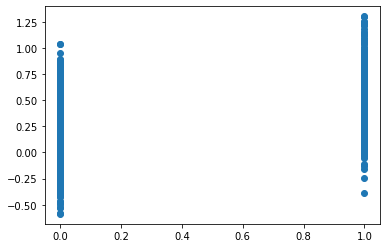

In [ ]:
import matplotlib.pyplot as plt
predictions = model.predict(x_test)
metrics.mean_absolute_error(y_test, predictions)
metrics.mean_squared_error(y_test, predictions)
plt.scatter(y_test, predictions)

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

0.14884536740193693

# USE max tokens test

In [ ]:
import tensorflow as tf
fn='/content/mount/My Drive/00_work/USE'
# model_1=tf.keras.models.load_model(fn)
model_1 = tf.saved_model.load(fn)

In [ ]:
embeds = hub.KerasLayer(fn,name='Embeddings/sharded_16:0')

In [ ]:
embeds2 = hub.KerasLayer(fn,name='Embeddings/ssssssssssssssharded_16:0')

In [ ]:
model_1.trainable_variables.trainable_variables

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
use_layer = hub.KerasLayer(model_1, trainable=True)

model = tf.keras.Sequential()
model.add(Dense(1024, input_dim=1024, activation='relu'))
model = tf.keras.Sequential([
     model,
     use_layer
])

In [ ]:
embed("aa", signature="default", as_dict=True)["default"]

In [ ]:
# module_handler = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_layer = hub.KerasLayer(module_handler, trainable=True)
model = tf.keras.Sequential([
     tf.keras.layers.InputLayer(input_shape=(1,512)),
    #  use_layer,
     tf.keras.layers.Dense(512)
])

In [ ]:
# ライブラリ「TensorFlow」のtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
from tensorflow.keras import layers       # 「レイヤーズ」モジュールのインポート

# 定数（モデル定義時に必要となる数値）
INPUT_FEATURES = 2  # 入力（特徴）の数： 2
LAYER1_NEURONS = 3  # ニューロンの数： 3
LAYER2_NEURONS = 3  # ニューロンの数： 3
OUTPUT_RESULTS = 1  # 出力結果の数： 1
model = tf.keras.models.Sequential([    # モデルの生成

  # 隠れ層：1つ目のレイヤー
  layers.Dense(                 # 全結合層
      input_shape=(INPUT_FEATURES,),       # 入力の形状（＝入力層）
      name='layer1',                       # 表示用に名前付け
      kernel_initializer='glorot_uniform', # 重さの初期化（一様分布のランダム値）
      bias_initializer='zeros',            # バイアスの初期化（0）
      units=LAYER1_NEURONS,                # ユニットの数
      activation='tanh'),                  # 活性化関数
  use_layer,
  # 隠れ層：2つ目のレイヤー
  layers.Dense(                 # 全結合層
      name='layer2',                       # 表示用に名前付け
      kernel_initializer='glorot_uniform', # 重さの初期化
      bias_initializer='zeros',            # バイアスの初期化
      units=LAYER2_NEURONS,                # ユニットの数
      activation='tanh'),                  # 活性化関数

  # 出力層
  layers.Dense(                 # 全結合層
      name='layer_out',                    # 表示用に名前付け
      kernel_initializer='glorot_uniform', # 重さの初期化
      bias_initializer='zeros',            # バイアスの初期化
      units=OUTPUT_RESULTS,                # ユニットの数
      activation='tanh'),                  # 活性化関数

], name='sequential_constructor'           # モデルにも名前付け
)

# 以上でモデル設計は完了
model.summary()      

In [ ]:
# import tensorflow as tf  
# import tensorflow_hub as hub
import numpy as np
t1 = 'The recent rapid progress of neural network-based natural language understanding research, especially on learning semantic text representations, can enable truly novel products such as Smart Compose and Talk to Books. It can also help improve performance on a variety of natural language tasks which have limited amounts of training data, such as building strong text classifiers from as few as 100 labeled examples. Below, we discuss two papers reporting recent progress on semantic representation research at Google, as well as two new models available for download on TensorFlow Hub that we hope developers will use to build new and exciting applications. In “Learning Semantic Textual Similarity from Conversations”, we introduce a new way to learn sentence representations for semantic textual similarity. The intuition is that sentences are semantically similar if they have a similar distribution of responses. For example, “How old are you?” and “What is your age?” are both questions about age, which can be answered by similar responses such as “I am 20 years old”. In contrast, while “How are you?” and “How old are you?” contain almost identical words, they have very different meanings and lead to different responses. In this work, we aim to learn semantic similarity by way of a response classification task: given a conversational input, we wish to classify the correct response from a batch of randomly selected responses. But, the ultimate goal is to learn a model that can return encodings representing a variety of natural language relationships, including similarity and relatedness. By adding another prediction task (In this case, the SNLI entailment dataset) and forcing both through shared encoding layers, we get even better performance on similarity measures such as the STSBenchmark (a sentence similarity benchmark) and CQA task B (a question/question similarity task). This is because logical entailment is quite different from simple equivalence and provides more signal for learning complex semantic representations. ' 
t2 = 'The recent rapid progress of neural network-based natural language understanding research, especially on learning semantic text representations, can enable truly novel products such as Smart Compose and Talk to Books. It can also help improve performance on a variety of natural language tasks which have limited amounts of training data, such as building strong text classifiers from as few as 100 labeled examples. Below, we discuss two papers reporting recent progress on semantic representation research at Google, as well as two new models available for download on TensorFlow Hub that we hope developers will use to build new and exciting applications. In “Learning Semantic Textual Similarity from Conversations”, we introduce a new way to learn sentence representations for semantic textual similarity. The intuition is that sentences are semantically similar if they have a similar distribution of responses. For example, “How old are you?” and “What is your age?” are both questions about age, which can be answered by similar responses such as “I am 20 years old”. In contrast, while “How are you?” and “How old are you?” contain almost identical words, they have very different meanings and lead to different responses. In this work, we aim to learn semantic similarity by way of a response classification task: given a conversational input, we wish to classify the correct response from a batch of randomly selected responses. But, the ultimate goal is to learn a model that can return encodings representing a variety of natural language relationships, including similarity and relatedness. By adding another prediction task (In this case, the SNLI entailment dataset) and forcing both through shared encoding layers, we get even better performance on similarity measures such as the STSBenchmark (a sentence similarity benchmark) and CQA task B (a question/question similarity task). This is because logical entailment is quite different from simple equivalence and provides more signal for learning complex semantic representations. ' 
t1='The recent rapid progress of neural network-based natural language understanding research especially a'
t2='The recent rapid progress of neural network-based natural language understanding research especially a'
# with tf.Session() as session: 
#      session.run([tf.global_variables_initializer(), tf.tables_initializer()]) 
#      embeddings = session.run(embed([t1, t2]))
embeddings=np.array(model_1([t1, t1]))
print(np.allclose(embeddings[0, :], embeddings[1, :]))

False


In [ ]:
t1 = 'The recent rapid progress of neural network-based natural language understanding research, especially on learning semantic text representations, can enable truly novel products such as Smart Compose and Talk to Books. It can also help improve performance on a variety of natural language tasks which have limited amounts of training data, such as building strong text classifiers from as few as 100 labeled examples. Below, we discuss two papers reporting recent progress on semantic representation research at Google, as well as two new models available for download on TensorFlow Hub that we hope developers will use to build new and exciting applications. In “Learning Semantic Textual Similarity from Conversations”, we introduce a new way to learn sentence representations for semantic textual similarity. The intuition is that sentences are semantically similar if they have a similar distribution of responses. For example, “How old are you?” and “What is your age?” are both questions about age, which can be answered by similar responses such as “I am 20 years old”. In contrast, while “How are you?” and “How old are you?” contain almost identical words, they have very different meanings and lead to different responses. In this work, we aim to learn semantic similarity by way of a response classification task: given a conversational input, we wish to classify the correct response from a batch of randomly selected responses. But, the ultimate goal is to learn a model that can return encodings representing a variety of natural language relationships, including similarity and relatedness. By adding another prediction task (In this case, the SNLI entailment dataset) and forcing both through shared encoding layers, we get even better performance on similarity measures such as the STSBenchmark (a sentence similarity benchmark) and CQA task B (a question/question similarity task). This is because logical entailment is quite different from simple equivalence and provides more signal for learning complex semantic representations.The recent rapid progress of neural network-based natural language understanding research, especially on learning semantic text representations, can enable truly novel products such as Smart Compose and Talk to Books. It can also help improve performance on a variety of natural language tasks which have limited amounts of training data, such as building strong text classifiers from as few as 100 labeled examples. Below, we discuss two papers reporting recent progress on semantic representation research at Google, as well as two new models available for download on TensorFlow Hub that we hope developers will use to build new and exciting applications. In “Learning Semantic Textual Similarity from Conversations”, we introduce a new way to learn sentence representations for semantic textual similarity. The intuition is that sentences are semantically similar if they have a similar distribution of responses. For example, “How old are you?” and “What is your age?” are both questions about age, which can be answered by similar responses such as “I am 20 years old”. In contrast, while “How are you?” and “How old are you?” contain almost identical words, they have very different meanings and lead to different responses. In this work, we aim to learn semantic similarity by way of a response classification task: given a conversational input, we wish to classify the correct response from a batch of randomly selected responses. But, the ultimate goal is to learn a model that can return encodings representing a variety of natural language relationships, including similarity and relatedness. By adding another prediction task (In this case, the SNLI entailment dataset) and forcing both through shared encoding layers, we get even better performance on similarity measures such as the STSBenchmark (a sentence similarity benchmark) and CQA task B (a question/question similarity task). This is because logical entailment is quite different from simple equivalence and provides more signal for learning complex semantic representations.The recent rapid progress of neural network-based natural language understanding research, especially on learning semantic text representations, can enable truly novel products such as Smart Compose and Talk to Books. It can also help improve performance on a variety of natural language tasks which have limited amounts of training data, such as building strong text classifiers from as few as 100 labeled examples. Below, we discuss two papers reporting recent progress on semantic representation research at Google, as well as two new models available for download on TensorFlow Hub that we hope developers will use to build new and exciting applications. In “Learning Semantic Textual Similarity from Conversations”, we introduce a new way to learn sentence representations for semantic textual similarity. The intuition is that sentences are semantically similar if they have a similar distribution of responses. For example, “How old are you?” and “What is your age?” are both questions about age, which can be answered by similar responses such as “I am 20 years old”. In contrast, while “How are you?” and “How old are you?” contain almost identical words, they have very different meanings and lead to different responses. In this work, we aim to learn semantic similarity by way of a response classification task: given a conversational input, we wish to classify the correct response from a batch of randomly selected responses. But, the ultimate goal is to learn a model that can return encodings representing a variety of natural language relationships, including similarity and relatedness. By adding another prediction task (In this case, the SNLI entailment dataset) and forcing both through shared encoding layers, we get even better performance on similarity measures such as the STSBenchmark (a sentence similarity benchmark) and CQA task B (a question/question similarity task). This is because logical entailment is quite different from simple equivalence and provides more signal for learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations'
t2 = 'The recent rapid progress of neural network-based natural language understanding research, especially on learning semantic text representations, can enable truly novel products such as Smart Compose and Talk to Books. It can also help improve performance on a variety of natural language tasks which have limited amounts of training data, such as building strong text classifiers from as few as 100 labeled examples. Below, we discuss two papers reporting recent progress on semantic representation research at Google, as well as two new models available for download on TensorFlow Hub that we hope developers will use to build new and exciting applications. In “Learning Semantic Textual Similarity from Conversations”, we introduce a new way to learn sentence representations for semantic textual similarity. The intuition is that sentences are semantically similar if they have a similar distribution of responses. For example, “How old are you?” and “What is your age?” are both questions about age, which can be answered by similar responses such as “I am 20 years old”. In contrast, while “How are you?” and “How old are you?” contain almost identical words, they have very different meanings and lead to different responses. In this work, we aim to learn semantic similarity by way of a response classification task: given a conversational input, we wish to classify the correct response from a batch of randomly selected responses. But, the ultimate goal is to learn a model that can return encodings representing a variety of natural language relationships, including similarity and relatedness. By adding another prediction task (In this case, the SNLI entailment dataset) and forcing both through shared encoding layers, we get even better performance on similarity measures such as the STSBenchmark (a sentence similarity benchmark) and CQA task B (a question/question similarity task). This is because logical entailment is quite different from simple equivalence and provides more signal for learning complex semantic representations.The recent rapid progress of neural network-based natural language understanding research, especially on learning semantic text representations, can enable truly novel products such as Smart Compose and Talk to Books. It can also help improve performance on a variety of natural language tasks which have limited amounts of training data, such as building strong text classifiers from as few as 100 labeled examples. Below, we discuss two papers reporting recent progress on semantic representation research at Google, as well as two new models available for download on TensorFlow Hub that we hope developers will use to build new and exciting applications. In “Learning Semantic Textual Similarity from Conversations”, we introduce a new way to learn sentence representations for semantic textual similarity. The intuition is that sentences are semantically similar if they have a similar distribution of responses. For example, “How old are you?” and “What is your age?” are both questions about age, which can be answered by similar responses such as “I am 20 years old”. In contrast, while “How are you?” and “How old are you?” contain almost identical words, they have very different meanings and lead to different responses. In this work, we aim to learn semantic similarity by way of a response classification task: given a conversational input, we wish to classify the correct response from a batch of randomly selected responses. But, the ultimate goal is to learn a model that can return encodings representing a variety of natural language relationships, including similarity and relatedness. By adding another prediction task (In this case, the SNLI entailment dataset) and forcing both through shared encoding layers, we get even better performance on similarity measures such as the STSBenchmark (a sentence similarity benchmark) and CQA task B (a question/question similarity task). This is because logical entailment is quite different from simple equivalence and provides more signal for learning complex semantic representations.The recent rapid progress of neural network-based natural language understanding research, especially on learning semantic text representations, can enable truly novel products such as Smart Compose and Talk to Books. It can also help improve performance on a variety of natural language tasks which have limited amounts of training data, such as building strong text classifiers from as few as 100 labeled examples. Below, we discuss two papers reporting recent progress on semantic representation research at Google, as well as two new models available for download on TensorFlow Hub that we hope developers will use to build new and exciting applications. In “Learning Semantic Textual Similarity from Conversations”, we introduce a new way to learn sentence representations for semantic textual similarity. The intuition is that sentences are semantically similar if they have a similar distribution of responses. For example, “How old are you?” and “What is your age?” are both questions about age, which can be answered by similar responses such as “I am 20 years old”. In contrast, while “How are you?” and “How old are you?” contain almost identical words, they have very different meanings and lead to different responses. In this work, we aim to learn semantic similarity by way of a response classification task: given a conversational input, we wish to classify the correct response from a batch of randomly selected responses. But, the ultimate goal is to learn a model that can return encodings representing a variety of natural language relationships, including similarity and relatedness. By adding another prediction task (In this case, the SNLI entailment dataset) and forcing both through shared encoding layers, we get even better performance on similarity measures such as the STSBenchmark (a sentence similarity benchmark) and CQA task B (a question/question similarity task). This is because logical entailment is quite different from simple equivalence and provides more signal for learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations learning complex semantic representations'
flg=False
n=4
for i in range(100):
  emb1=np.round(embed(t1),n)
  emb2=np.round(embed(t2),n)
  flg=np.allclose(emb1,emb2)
  if flg:
    break
print(flg)
  # print(np.max(np.round(emb1,6)-np.round(emb2,6)))

False


In [ ]:
print(np.round(emb1[0][0:10],6))
print(np.round(emb2[0][0:10],6))

In [ ]:
embed.summary()

#xling-many/1
https://tfhub.dev/google/universal-sentence-encoder-xling-many/1

In [ ]:
strtt='22'
def embed(str_in):
  v3=embed_ml3(str_in)
  # v3=np.squeeze(v3)
  v1=embed_xm1_single(str_in)
  # v1=np.squeeze(v1)
  res=np.concatenate([v1,v3],axis=1)
  # res=np.add(v1,v3)
  return res
embed(strtt)[0].shape

(1024,)

In [ ]:
hiden_n='SNLI/Classifier/tanh_layer_0/dense/kernel'
english_sentences=["aaa", "bbbb", "aaa"]
# hid=xling_8_embed.variable_map[hiden_n]
hid=xling_8_embed.get_input_info_dict()
sharded_0 = session.run(hid, feed_dict={text_input: english_sentences})
print(sharded_0)

#pip install -U sentence-transformers
https://github.com/UKPLab/sentence-transformers

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
sentences = ['入院を必要とする頭部・腹部以外の外傷・火傷がある',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

In [ ]:
def embed(sentences):  
  sentence_embeddings = model.encode(sentences)
  return sentence_embeddings

In [ ]:
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

In [ ]:
!pip install tensorflow_text

# train use

## resnet+use

In [ ]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### create data

In [ ]:
# df_tcd.to_json('/content/mount/My Drive/00_work/guidance/20200701/07_tcd/word_tcd.json',orient='records',force_ascii=False)
from itertools import permutations
import json

def get_perm_lst(dt_lst):
  perm_lst=[]
  cnt =len(dt_lst)
  for i  in range(cnt):
    pe_lst=permutations(dt_lst,i+1)
    for dt in pe_lst:
      perm='、'.join(map(str, dt))
      perm_lst.append(perm)
  return perm_lst
fn_tcd='/content/mount/My Drive/00_work/guidance/20200701/07_tcd/word_tcd.json'
json_tcd = json.load(open(fn_tcd, "r"))
cols=[ 'title','confirmation','detail','synonyms']
dt_train_list=[]
wd='word'
for tcd in json_tcd:
  dt_col_lst=[]
  for col in cols:
    dt=tcd[col]
    if len(dt)>1:
      # print(len(dt),col,dt)
      dt_col_lst.append(dt)
  if len(dt_col_lst)>0:
    perm_list=get_perm_lst(dt_col_lst)
    for perm in perm_list:
      dt_train_list.append([tcd[wd],perm])
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
path='/content/mount/My Drive/00_work/guidance/train_dt.csv'
df=pd.read_csv(path,sep=',',header=0)
df.shape
df_t=pd.DataFrame(dt_train_list,columns=['word','guid_t'])
df_tc=pd.merge(df,df_t,how='left',left_on='title',right_on='word')
df_n=df_tc.dropna(how='any').loc[:,['remark','word','guid_t','label']]
dt_x=df_n.loc[:,['remark','guid_t']].values.tolist()
dt_y=df_n.loc[:,['label']].values.tolist()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import os
import random
import glob
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
module_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
embedding_layer = hub.KerasLayer(module_url)

### mode create

In [ ]:

from keras.applications.resnet50 import ResNet50
img_size=32
nb_classes=2
hidden_layer = tf.keras.layers.Dense(512, activation='relu')
output_layer = tf.keras.layers.Dense(nb_classes, activation='softmax')
flat_layer=tf.keras.layers.Flatten()
dropout=tf.keras.layers.Dropout(0.5)
inputs = tf.keras.layers.Input(shape=(2,), dtype=tf.string)


# input_tensor = Input(shape=(img_size,img_size,1))
## train skratch ==>> weights=None ##
# ResNet50Layer = ResNet50(include_top=False, weights=None ,input_tensor=input_tensor)
ResNet50Layer = ResNet50(include_top=False, weights=None ,input_shape=(img_size,img_size,1))

x1 = embedding_layer(inputs[:,0])
x2 = embedding_layer(inputs[:,1])

ho=tf.concat([x1,x2],1)
resin=tf.reshape(ho,(-1,img_size,img_size,1))
resou=ResNet50Layer(resin)

ho=flat_layer(resou)
x2 = hidden_layer(ho)
x2=dropout(x2)
outputs = output_layer(x2)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

#hyper param
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

# model.summary()

### training

In [ ]:

nb_classes=2
dt_y = tf.keras.utils.to_categorical(dt_y, nb_classes)
x_train, x_test, y_train, y_test = train_test_split(dt_x, 
                                                    dt_y, 
                                                    test_size=0.3, 
                                                    stratify=dt_y, 
                                                    random_state=42)
log_filepath='/content/'
es_cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=1, mode='auto')
# tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_filepath, histogram_freq=1)
fpath ='/content/mount/My Drive/00_work/resmodel/'+\
 'weights.{val_accuracy:.6f}-.{accuracy:.6f}-{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = tf.keras.callbacks.ModelCheckpoint(filepath=fpath, 
                                        monitor='val_accuracy',
                                        # monitor='accuracy',
                                         mode='max',
                                        verbose=1,
                                        save_best_only=True
                                        save_weights_only=False)
# model = tf.keras.models.load_model('/content/mount/My Drive/00_work/model/weights.0.897210-.0.906931-01-0.43-0.59.hdf5')
model.fit( np.asarray(x_train), 
           np.asarray(y_train), 
          # batch_size=10,
          # verbose=0, 
          epochs=110, 
          validation_data=( np.asarray(x_test),  np.asarray(y_test)),
          callbacks=[cp_cb]
          )

## model src 1

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
module_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
# module_url = "https://tfhub.dev/google/universal-sentence-encoder-xling-many/1"
# embedding_layer = hub.KerasLayer(module_url,trainable=True)
embedding_layer = hub.KerasLayer(module_url)
hidden_layer = tf.keras.layers.Dense(512, activation='relu')
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
flat_layer=tf.keras.layers.Flatten()
dropout=tf.keras.layers.Dropout(0.5)
inputs = tf.keras.layers.Input(shape=(2,), dtype=tf.string)
x1 = embedding_layer(inputs[:,0])
x2 = embedding_layer(inputs[:,1])
# h1=hidden_layer(x1)
# h2=hidden_layer(x2)

ho=tf.concat([x1,x2],1)
# ho=flat_layer(ho)
x2 = hidden_layer(ho)
x2=dropout(x2)
outputs = output_layer(x2)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
# model.summary()

In [ ]:
ho.shape

TensorShape([None, 1024])

## model src old

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
module_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
# module_url = "https://tfhub.dev/google/universal-sentence-encoder-xling-many/1"
embedding_layer = hub.KerasLayer(module_url,trainable=True)
# embedding_layer = hub.KerasLayer(module_url)
hidden_layer = tf.keras.layers.Dense(1024, activation='relu')
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
# flat_layer=tf.keras.layers.Flatten(input_shape=(2,))
flat_layer=tf.keras.layers.Flatten()

inputs = tf.keras.layers.Input(shape=(2,), dtype=tf.string)
x = embedding_layer(tf.squeeze(tf.cast(inputs, tf.string)))
# x = embedding_layer(inputs)
x1=tf.reshape(x,[-1,1024])
# x1=flat_layer(x)
x2 = hidden_layer(x1)
x2=tf.keras.layers.Dropout(0.5)(x2)
outputs = output_layer(x2)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
# model.summary()

In [ ]:
k=embedding_layer(inputs[0])

In [ ]:
x1.shape

TensorShape([None, 512])

In [ ]:
model.summary()

In [ ]:
# dt_x=np.array(dt_x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dt_x, 
                                                    dt_y, 
                                                    test_size=0.3, 
                                                    stratify=dt_y, 
                                                    random_state=42)

## training

In [ ]:
log_filepath='/content/'
es_cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, verbose=1, mode='auto')
# tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_filepath, histogram_freq=1)
fpath ='/content/mount/My Drive/00_work/model/'+\
 'weights.{val_accuracy:.6f}-.{accuracy:.6f}-{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = tf.keras.callbacks.ModelCheckpoint(filepath=fpath, 
                                        monitor='val_accuracy',
                                        # monitor='accuracy',
                                         mode='max',
                                        verbose=1,
                                        save_best_only=True,
                                        save_weights_only=False)
'''
save_weights_only: Trueなら，モデルの重みが保存されます (model.save_weights(filepath))，そうでないなら，モデルの全体が保存されます (model.save(filepath))．
'''
# fnmodel='/content/mount/My Drive/00_work/model/weights.0.981311-.0.985870-04-0.04-0.05.hdf5'
# fnmodel='/content/mount/My Drive/00_work/model/23path_to_my_model.h5'
# model = tf.keras.models.load_model()
# model = tf.compat.v1.keras.experimental.load_from_saved_model(fnmodel, custom_objects={'KerasLayer':hub.KerasLayer})
fnddd='/content/mount/My Drive/00_work/model/weights.0.992992-.0.998665-10-0.01-0.06.hdf5'
model = tf.keras.models.load_model(fnddd,custom_objects={'KerasLayer':hub.KerasLayer})
# fnmodel='/content/mount/My Drive/00_work/model/33path_to_my_model.h5'
# model=tf.saved_model.load(fnmodel)
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, 
          y_train, 
          # batch_size=10,
          # verbose=0, 
          epochs=110, 
          validation_data=(x_test, y_test),
          callbacks=[cp_cb]
          )



## predict

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt
import tensorflow as tf
fn='weights.0.983517-.0.993046-05-0.02-0.06.hdf5'
fnddd='/content/mount/My Drive/00_work/resmodel/'+fn
model = tf.keras.models.load_model(fnddd,custom_objects={'KerasLayer':hub.KerasLayer})

# # col='all'
# col='synonyms'
def get_remark_dt(col):
# col='all'
  basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'
# col='synonyms'
  basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'

  fn="/word_"+col+".json"
  json_remark = json.load(open(basedir+"sentence.json", "r"))
  json_title = json.load(open(basedir+fn, "r"))
  return json_remark,json_title
def get_remark_dt2(fn_in):
  basedir='/content/mount/My Drive/00_work/guidance/20200701/05_all/'

  # col='synonyms'
  # basedir='/content/mount/My Drive/00_work/guidance/20200701/04_word/'

  fn_remark='/content/mount/My Drive/00_work/guidance/remak/'+fn_in
  json_remark = json.load(open(fn_remark, "r"))
  fn="/word_"+col+".json"
  json_title = json.load(open(basedir+fn, "r"))
  return json_remark,json_title
col='all'
# col='synonyms'

fn='notification_case_sentence'
# fn='human_power_extraction_sentence'
json_remark,json_title=get_remark_dt2(fn+'.json')
# json_remark,json_title=get_remark_dt(col)

results = []
print('remark vec start',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))

for i,remark in enumerate(json_remark):
    rg_list=[]
    r_doc=remark['sentence']
    print(i,r_doc)
    for j, g_doc in enumerate(json_title):
      rg_list.append([r_doc,g_doc[col]])
    sims=model.predict(np.array(rg_list))
    clssims=[]
    for sim in sims:
     clssims.append(np.argmax(sim))
    sim_rg_list=[]
    for doc_id, sim in enumerate(clssims): 
      sim_rg_list.append([doc_id,sim])
    sim_rg_list_sort=sorted(sim_rg_list,key=lambda x:x[1], reverse=True)
    for sim_rg in sim_rg_list_sort[0:3]:
      doc_id=sim_rg[0]
      sim_mean=sim_rg[1]
      gs_w=json_title[doc_id]['word']
      gs_s=json_title[doc_id][col]
      results.append([r_doc,gs_w,gs_s,sim_mean])
df_out=pd.DataFrame(results,columns=['sentence','word',col,'similarity'])
outdir='/content/mount/My Drive/00_work/guidance/output/00_nozawa/'
df_out.to_csv(outdir+col+fn+"_resnet_deep_modified_sentence_word_similarity.csv")
print('finish out',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))


## test

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import numpy as np
import pandas as pd
import json
from  datetime import datetime as dt
import tensorflow as tf
fn='weights.0.983517-.0.993046-05-0.02-0.06.hdf5'
fnddd='/content/mount/My Drive/00_work/resmodel/'+fn
model = tf.keras.models.load_model(fnddd,custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
sims=model.predict(np.asarray(dt_x[0:200]))

clssims=[]
for sim in sims:
     clssims.append(np.argmax(sim))

In [ ]:
#save h5
fnddd='/content/mount/My Drive/00_work/model/weights.0.992862-.0.998721-13-0.01-0.05.hdf5'
fnddd='/content/mount/My Drive/00_work/model/weights.0.992862-.0.998721-13-0.01-0.05.hdf5'
# model.save(fnddd)
new_model = tf.keras.models.load_model(fnddd,custom_objects={'KerasLayer':hub.KerasLayer})
new_model.summary()

# fnddd='/content/mount/My Drive/00_work/model/33path_to_my_model.h5'
# # tf.compat.v1.keras.experimental.export_saved_model(model, fnddd) tf1.o
# # tf.keras.models.save_model(model, fnddd,save_format="tf")
# # tf.saved_model.save(model, fnddd)
# model_l=tf.saved_model.load(fnddd)

In [ ]:
# tf.keras.models.load_model(fnddd)
reloaded_model = tf.compat.v1.keras.experimental.load_from_saved_model(fnddd, custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model.predict(["21 Pictures That Will Make You Feel Like You're 99 Years Old"])

In [ ]:
model.predict(['Google announces TensorFlow 2.0'])

# use qa

## samle

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
module = hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual-qa/3')

In [ ]:
questions = ["What is your age?"]
responses = ["I am 20 years old.", "good morning"]
response_contexts = ["I will be 21 next year.", "great day."]

questions = ["顔が腫れ上がり、額にケロイドが出来たのに…"]
responses = ["ネグレクトの可能性-被れ汗疹","受傷部位、受傷頻度※受傷理由入院加療が必要な外傷の有無-水疱","受傷部位、受傷頻度※受傷理由頭部へのあざの有無※入院加療が必要な外傷の有無"]
response_contexts = ['湿疹','水ぶくれ','痣']

questions = ["顔が腫れ上がり、額にケロイドが出来たのに…","この間なんか頭を窓にぶつけられ、腕につめをたてられて、血がでました"]
responses = ['受傷部位、受傷頻度※受傷理由入院加療が必要な外傷の有無-出血',
'受傷部位、受傷頻度※受傷理由頭部へのあざの有無※入院加療が必要な外傷の有無',
'・腹部や太腿内側などの柔らかい組織にある傷は虐待が疑われる。・首に内出血がある場合は首を絞められた可能性を疑う。線上の出血などはその可能性が高い。-'
]
response_contexts = ['血',
'痣',
'内出血',]
question_embeddings = module.signatures['question_encoder'](
            tf.constant(questions))
response_embeddings = module.signatures['response_encoder'](
        input=tf.constant(responses),
        context=tf.constant(response_contexts))

np.inner(question_embeddings['outputs'], response_embeddings['outputs'])


array([[0.1929994 , 0.16828038, 0.11203844],
       [0.34298226, 0.32539332, 0.35639504]], dtype=float32)

##qa sim1

## qa sim2

In [ ]:

def embed_qa_sim(q,r,rc):  
  question_embeddings = module.signatures['question_encoder'](
              tf.constant(q))
  response_embeddings = module.signatures['question_encoder'](
              tf.constant(r))

  res=cosine_similarity(question_embeddings['outputs'], response_embeddings['outputs'])
  return res

## qa sim3

In [ ]:
def embed_qa_sim(q,r,rc):  
  cnt=len(q)
  question_embeddings = module.signatures['response_encoder'](
          input=tf.constant(q),
          context=tf.constant(rc[0:cnt]))
  response_embeddings = module.signatures['response_encoder'](
          input=tf.constant(r),
          context=tf.constant(rc))

  res=cosine_similarity(question_embeddings['outputs'], response_embeddings['outputs'])
  return res

In [ ]:
array([[0.3073252 , 0.24394946, 0.19755541]], dtype=float32)
array([[0.29280186, 0.2029297 , 0.16828036]], dtype=float32)

TensorShape([2, 512])

#tem computer

In [ ]:
guidance=[
'身体的虐待。虐待、あざ、火傷、叩く、蹴る、殴る、拘束。身体的虐待にあたる行為。身体的な傷の跡はないか。打撲傷、あざ（内出血）、骨折、頭蓋内出血などの頭部外傷、内臓損傷、刺傷、たばこな。どによる火傷などの外傷を生じるような行為。首を絞める、殴る、蹴る、叩く、投げ落とす、激しく揺さぶる、熱湯をかける、布団蒸し。にする、おぼれさせる、逆さ吊りにする、異物を飲ませる、（体罰の意図を持ち）食事を。抜く、戸外に締め出す、縄などにより一室に拘束するなどの行為。意図的に子どもを病気にさせる。など',
'身体的虐待。虐待、あざ、火傷、叩く、蹴る、殴る、拘束。身体的虐待にあたる行為。身体的な傷の跡はないか。打撲傷、あざ（内出血）、骨折、頭蓋内出血などの頭部外傷、内臓損傷、刺傷、たばこな。どによる火傷などの外傷を生じるような行為。首を絞める、殴る、蹴る、叩く、投げ落とす、激しく揺さぶる、熱湯をかける、布団蒸し。にする、おぼれさせる、逆さ吊りにする、異物を飲ませる、（体罰の意図を持ち）食事を。抜く、戸外に締め出す、縄などにより一室に拘束するなどの行為。意図的に子どもを病気にさせる。など',
'身体的虐待。虐待、あざ、火傷、叩く、蹴る、殴る、拘束。身体的虐待にあたる行為。身体的な傷の跡はないか。打撲傷、あざ（内出血）、骨折、頭蓋内出血などの頭部外傷、内臓損傷、刺傷、たばこな。どによる火傷などの外傷を生じるような行為。首を絞める、殴る、蹴る、叩く、投げ落とす、激しく揺さぶる、熱湯をかける、布団蒸し。にする、おぼれさせる、逆さ吊りにする、異物を飲ませる、（体罰の意図を持ち）食事を。抜く、戸外に締め出す、縄などにより一室に拘束するなどの行為。意図的に子どもを病気にさせる。など',
'身体的虐待。虐待、あざ、火傷、叩く、蹴る、殴る、拘束。身体的虐待にあたる行為。身体的な傷の跡はないか。打撲傷、あざ（内出血）、骨折、頭蓋内出血などの頭部外傷、内臓損傷、刺傷、たばこな。どによる火傷などの外傷を生じるような行為。首を絞める、殴る、蹴る、叩く、投げ落とす、激しく揺さぶる、熱湯をかける、布団蒸し。にする、おぼれさせる、逆さ吊りにする、異物を飲ませる、（体罰の意図を持ち）食事を。抜く、戸外に締め出す、縄などにより一室に拘束するなどの行為。意図的に子どもを病気にさせる。など',
'身体的虐待。虐待、あざ、火傷、叩く、蹴る、殴る、拘束。身体的虐待にあたる行為。身体的な傷の跡はないか。打撲傷、あざ（内出血）、骨折、頭蓋内出血などの頭部外傷、内臓損傷、刺傷、たばこな。どによる火傷などの外傷を生じるような行為。首を絞める、殴る、蹴る、叩く、投げ落とす、激しく揺さぶる、熱湯をかける、布団蒸し。にする、おぼれさせる、逆さ吊りにする、異物を飲ませる、（体罰の意図を持ち）食事を。抜く、戸外に締め出す、縄などにより一室に拘束するなどの行為。意図的に子どもを病気にさせる。など',
'身体的虐待。虐待、あざ、火傷、叩く、蹴る、殴る、拘束。身体的虐待にあたる行為。身体的な傷の跡はないか。打撲傷、あざ（内出血）、骨折、頭蓋内出血などの頭部外傷、内臓損傷、刺傷、たばこな。どによる火傷などの外傷を生じるような行為。首を絞める、殴る、蹴る、叩く、投げ落とす、激しく揺さぶる、熱湯をかける、布団蒸し。にする、おぼれさせる、逆さ吊りにする、異物を飲ませる、（体罰の意図を持ち）食事を。抜く、戸外に締め出す、縄などにより一室に拘束するなどの行為。意図的に子どもを病気にさせる。など',
'ネグレクト。虐待、置き去り。ネグレストにあたる行為。子どもに対する責任を放棄していないか。子どもの健康・安全への配慮を怠っているなど。例えば、「重大な病気になっても病院に連れて行かない」、「乳幼児を家に残したまま外出。する」など。なお、親がパチンコに熱中している間、乳幼児を自動車の中に放置し、熱中症で子ども。が死亡したり、誘拐されたり、乳幼児だけを家に残して火災で子どもが焼死したりする。事件も、ネグレクトという虐待の結果であることに留意する。子どもの意思に反して学校等に登校させない。子どもが学校等に登校するように促すなど。の子どもの教育を保障する努力をしない。子どもにとって必要な情緒的欲求に応えていない（愛情遮断など）。食事、衣服、住居などが極端に不適切で、健康状態を損なうほどの無関心・怠慢。例えば。「適切な食事を与えない」。「下着など長期間ひどく不潔なままにする」。「極端に。不潔な環境の中で生活をさせる」など。子どもを遺棄したり、置き去りにする。祖父母、きょうだい、保護者の恋人などの同居人や自宅に出入りする第三者が身体的、性的、心理的な虐待にあたる行為を行っているにもかかわらず、それを放置する。など',
'ネグレクト。虐待、置き去り。ネグレストにあたる行為。子どもに対する責任を放棄していないか。子どもの健康・安全への配慮を怠っているなど。例えば、「重大な病気になっても病院に連れて行かない」、「乳幼児を家に残したまま外出。する」など。なお、親がパチンコに熱中している間、乳幼児を自動車の中に放置し、熱中症で子ども。が死亡したり、誘拐されたり、乳幼児だけを家に残して火災で子どもが焼死したりする。事件も、ネグレクトという虐待の結果であることに留意する。子どもの意思に反して学校等に登校させない。子どもが学校等に登校するように促すなど。の子どもの教育を保障する努力をしない。子どもにとって必要な情緒的欲求に応えていない（愛情遮断など）。食事、衣服、住居などが極端に不適切で、健康状態を損なうほどの無関心・怠慢。例えば。「適切な食事を与えない」。「下着など長期間ひどく不潔なままにする」。「極端に。不潔な環境の中で生活をさせる」など。子どもを遺棄したり、置き去りにする。祖父母、きょうだい、保護者の恋人などの同居人や自宅に出入りする第三者が身体的、性的、心理的な虐待にあたる行為を行っているにもかかわらず、それを放置する。など',
'ネグレクト。虐待、置き去り。ネグレストにあたる行為。子どもに対する責任を放棄していないか。子どもの健康・安全への配慮を怠っているなど。例えば、「重大な病気になっても病院に連れて行かない」、「乳幼児を家に残したまま外出。する」など。なお、親がパチンコに熱中している間、乳幼児を自動車の中に放置し、熱中症で子ども。が死亡したり、誘拐されたり、乳幼児だけを家に残して火災で子どもが焼死したりする。事件も、ネグレクトという虐待の結果であることに留意する。子どもの意思に反して学校等に登校させない。子どもが学校等に登校するように促すなど。の子どもの教育を保障する努力をしない。子どもにとって必要な情緒的欲求に応えていない（愛情遮断など）。食事、衣服、住居などが極端に不適切で、健康状態を損なうほどの無関心・怠慢。例えば。「適切な食事を与えない」。「下着など長期間ひどく不潔なままにする」。「極端に。不潔な環境の中で生活をさせる」など。子どもを遺棄したり、置き去りにする。祖父母、きょうだい、保護者の恋人などの同居人や自宅に出入りする第三者が身体的、性的、心理的な虐待にあたる行為を行っているにもかかわらず、それを放置する。など',
'ネグレクト。虐待、置き去り。ネグレストにあたる行為。子どもに対する責任を放棄していないか。子どもの健康・安全への配慮を怠っているなど。例えば、「重大な病気になっても病院に連れて行かない」、「乳幼児を家に残したまま外出。する」など。なお、親がパチンコに熱中している間、乳幼児を自動車の中に放置し、熱中症で子ども。が死亡したり、誘拐されたり、乳幼児だけを家に残して火災で子どもが焼死したりする。事件も、ネグレクトという虐待の結果であることに留意する。子どもの意思に反して学校等に登校させない。子どもが学校等に登校するように促すなど。の子どもの教育を保障する努力をしない。子どもにとって必要な情緒的欲求に応えていない（愛情遮断など）。食事、衣服、住居などが極端に不適切で、健康状態を損なうほどの無関心・怠慢。例えば。「適切な食事を与えない」。「下着など長期間ひどく不潔なままにする」。「極端に。不潔な環境の中で生活をさせる」など。子どもを遺棄したり、置き去りにする。祖父母、きょうだい、保護者の恋人などの同居人や自宅に出入りする第三者が身体的、性的、心理的な虐待にあたる行為を行っているにもかかわらず、それを放置する。など',
'ネグレクト。虐待、置き去り。ネグレストにあたる行為。子どもに対する責任を放棄していないか。子どもの健康・安全への配慮を怠っているなど。例えば、「重大な病気になっても病院に連れて行かない」、「乳幼児を家に残したまま外出。する」など。なお、親がパチンコに熱中している間、乳幼児を自動車の中に放置し、熱中症で子ども。が死亡したり、誘拐されたり、乳幼児だけを家に残して火災で子どもが焼死したりする。事件も、ネグレクトという虐待の結果であることに留意する。子どもの意思に反して学校等に登校させない。子どもが学校等に登校するように促すなど。の子どもの教育を保障する努力をしない。子どもにとって必要な情緒的欲求に応えていない（愛情遮断など）。食事、衣服、住居などが極端に不適切で、健康状態を損なうほどの無関心・怠慢。例えば。「適切な食事を与えない」。「下着など長期間ひどく不潔なままにする」。「極端に。不潔な環境の中で生活をさせる」など。子どもを遺棄したり、置き去りにする。祖父母、きょうだい、保護者の恋人などの同居人や自宅に出入りする第三者が身体的、性的、心理的な虐待にあたる行為を行っているにもかかわらず、それを放置する。など',
'ネグレクト。虐待、置き去り。ネグレストにあたる行為。子どもに対する責任を放棄していないか。子どもの健康・安全への配慮を怠っているなど。例えば、「重大な病気になっても病院に連れて行かない」、「乳幼児を家に残したまま外出。する」など。なお、親がパチンコに熱中している間、乳幼児を自動車の中に放置し、熱中症で子ども。が死亡したり、誘拐されたり、乳幼児だけを家に残して火災で子どもが焼死したりする。事件も、ネグレクトという虐待の結果であることに留意する。子どもの意思に反して学校等に登校させない。子どもが学校等に登校するように促すなど。の子どもの教育を保障する努力をしない。子どもにとって必要な情緒的欲求に応えていない（愛情遮断など）。食事、衣服、住居などが極端に不適切で、健康状態を損なうほどの無関心・怠慢。例えば。「適切な食事を与えない」。「下着など長期間ひどく不潔なままにする」。「極端に。不潔な環境の中で生活をさせる」など。子どもを遺棄したり、置き去りにする。祖父母、きょうだい、保護者の恋人などの同居人や自宅に出入りする第三者が身体的、性的、心理的な虐待にあたる行為を行っているにもかかわらず、それを放置する。など',
'性的虐待。虐待、性的、触らせる。性的虐待にあたる行為。子どもを性的な対象としていないか。子どもへの性交、性的行為（教唆を含む）。子どもの性器を触る又は子どもに触らせるなどの性的行為（教唆を含む）。子どもに性器や性交を見せる。子どもをポルノグラフィーの被写体などにする。など。',
'性的虐待。虐待、性的、触らせる。性的虐待にあたる行為。子どもを性的な対象としていないか。子どもへの性交、性的行為（教唆を含む）。子どもの性器を触る又は子どもに触らせるなどの性的行為（教唆を含む）。子どもに性器や性交を見せる。子どもをポルノグラフィーの被写体などにする。など。',
'性的虐待。虐待、性的、触らせる。性的虐待にあたる行為。子どもを性的な対象としていないか。子どもへの性交、性的行為（教唆を含む）。子どもの性器を触る又は子どもに触らせるなどの性的行為（教唆を含む）。子どもに性器や性交を見せる。子どもをポルノグラフィーの被写体などにする。など。',
'性的虐待。虐待、性的、触らせる。性的虐待にあたる行為。子どもを性的な対象としていないか。子どもへの性交、性的行為（教唆を含む）。子どもの性器を触る又は子どもに触らせるなどの性的行為（教唆を含む）。子どもに性器や性交を見せる。子どもをポルノグラフィーの被写体などにする。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'心理的虐待。虐待、脅かす、脅迫、差別、無視。心理的虐待にあたる行為。子どもを脅かしたり、無視したり、差別的な扱いをしていないか。言葉による脅かし、脅迫など。子どもを無視したり、拒否的な態度を示すことなど。子どもの心を傷付けることを繰り返し言う。子どもの自尊心を傷付けるような言動など。他のきょうだいと著しく差別的な扱いをする。配偶者やその他の家族などに対し暴力をふるう。子どものきょうだいに、身体的、性的、心理的な虐待、ネグレストにあたる行為を行う。など。',
'身体的影響。虐待のよる子供への身体的影響。子どもの発育状態。打撲、熱傷など外から見てわかる傷、骨折、頭蓋内出血など外から見えない傷、栄養障害や体重増加不良、低身長。愛情不足により成長ホルモンが抑えられた結果、成長不全を呈することもある。最近の研究では、保護者から暴力や暴言を受けた子どもの脳に委縮が見られた、との知見も明らかになりつつある。',
'身体的影響。虐待のよる子供への身体的影響。子どもの発育状態。打撲、熱傷など外から見てわかる傷、骨折、頭蓋内出血など外から見えない傷、栄養障害や体重増加不良、低身長。愛情不足により成長ホルモンが抑えられた結果、成長不全を呈することもある。最近の研究では、保護者から暴力や暴言を受けた子どもの脳に委縮が見られた、との知見も明らかになりつつある。',
'身体的影響。虐待のよる子供への身体的影響。子どもの発育状態。打撲、熱傷など外から見てわかる傷、骨折、頭蓋内出血など外から見えない傷、栄養障害や体重増加不良、低身長。愛情不足により成長ホルモンが抑えられた結果、成長不全を呈することもある。最近の研究では、保護者から暴力や暴言を受けた子どもの脳に委縮が見られた、との知見も明らかになりつつある。',
'身体的影響。虐待のよる子供への身体的影響。子どもの発育状態。打撲、熱傷など外から見てわかる傷、骨折、頭蓋内出血など外から見えない傷、栄養障害や体重増加不良、低身長。愛情不足により成長ホルモンが抑えられた結果、成長不全を呈することもある。最近の研究では、保護者から暴力や暴言を受けた子どもの脳に委縮が見られた、との知見も明らかになりつつある。',
'身体的影響。虐待のよる子供への身体的影響。子どもの発育状態。打撲、熱傷など外から見てわかる傷、骨折、頭蓋内出血など外から見えない傷、栄養障害や体重増加不良、低身長。愛情不足により成長ホルモンが抑えられた結果、成長不全を呈することもある。最近の研究では、保護者から暴力や暴言を受けた子どもの脳に委縮が見られた、との知見も明らかになりつつある。',
'知的発達面への影響。虐待のよる子供への知的発達への影響。子どもの知的発達状態。安心できない環境での生活により、落ち着いて学習に向かうことができない場合や、学校への登校もままならない場合などにより、もともとの能力に比しても発達が十分に得られないことがある。また、保護者が子どもの知的発達にとって必要なやり取りを行わない場合や、年齢や発達レベルにそぐわない過大な要求をする場合があり、その結果として子どもの知的発達を阻害してしまうことがある。',
'知的発達面への影響。虐待のよる子供への知的発達への影響。子どもの知的発達状態。安心できない環境での生活により、落ち着いて学習に向かうことができない場合や、学校への登校もままならない場合などにより、もともとの能力に比しても発達が十分に得られないことがある。また、保護者が子どもの知的発達にとって必要なやり取りを行わない場合や、年齢や発達レベルにそぐわない過大な要求をする場合があり、その結果として子どもの知的発達を阻害してしまうことがある。',
'知的発達面への影響。虐待のよる子供への知的発達への影響。子どもの知的発達状態。安心できない環境での生活により、落ち着いて学習に向かうことができない場合や、学校への登校もままならない場合などにより、もともとの能力に比しても発達が十分に得られないことがある。また、保護者が子どもの知的発達にとって必要なやり取りを行わない場合や、年齢や発達レベルにそぐわない過大な要求をする場合があり、その結果として子どもの知的発達を阻害してしまうことがある。',
'知的発達面への影響。虐待のよる子供への知的発達への影響。子どもの知的発達状態。安心できない環境での生活により、落ち着いて学習に向かうことができない場合や、学校への登校もままならない場合などにより、もともとの能力に比しても発達が十分に得られないことがある。また、保護者が子どもの知的発達にとって必要なやり取りを行わない場合や、年齢や発達レベルにそぐわない過大な要求をする場合があり、その結果として子どもの知的発達を阻害してしまうことがある。',
'知的発達面への影響。虐待のよる子供への知的発達への影響。子どもの知的発達状態。安心できない環境での生活により、落ち着いて学習に向かうことができない場合や、学校への登校もままならない場合などにより、もともとの能力に比しても発達が十分に得られないことがある。また、保護者が子どもの知的発達にとって必要なやり取りを行わない場合や、年齢や発達レベルにそぐわない過大な要求をする場合があり、その結果として子どもの知的発達を阻害してしまうことがある。',
'対人関係の障害。虐待による子どもの対人関係への影響。子どもの対人関係に問題がないか。子どもにとって最も安心を与えられる存在であるはずの保護者から虐待を受けることにより、子どもは欲求を適切に満たされることのない状態となり、愛着対象との基本的な信頼関係を構築することができなくなる。その結果、他人を信頼し愛着関係を形成することが困難になり、対人関係における問題を生じることがある。',
'対人関係の障害。虐待による子どもの対人関係への影響。子どもの対人関係に問題がないか。子どもにとって最も安心を与えられる存在であるはずの保護者から虐待を受けることにより、子どもは欲求を適切に満たされることのない状態となり、愛着対象との基本的な信頼関係を構築することができなくなる。その結果、他人を信頼し愛着関係を形成することが困難になり、対人関係における問題を生じることがある。',
'対人関係の障害。虐待による子どもの対人関係への影響。子どもの対人関係に問題がないか。子どもにとって最も安心を与えられる存在であるはずの保護者から虐待を受けることにより、子どもは欲求を適切に満たされることのない状態となり、愛着対象との基本的な信頼関係を構築することができなくなる。その結果、他人を信頼し愛着関係を形成することが困難になり、対人関係における問題を生じることがある。',
'対人関係の障害。虐待による子どもの対人関係への影響。子どもの対人関係に問題がないか。子どもにとって最も安心を与えられる存在であるはずの保護者から虐待を受けることにより、子どもは欲求を適切に満たされることのない状態となり、愛着対象との基本的な信頼関係を構築することができなくなる。その結果、他人を信頼し愛着関係を形成することが困難になり、対人関係における問題を生じることがある。',
'対人関係の障害。虐待による子どもの対人関係への影響。子どもの対人関係に問題がないか。子どもにとって最も安心を与えられる存在であるはずの保護者から虐待を受けることにより、子どもは欲求を適切に満たされることのない状態となり、愛着対象との基本的な信頼関係を構築することができなくなる。その結果、他人を信頼し愛着関係を形成することが困難になり、対人関係における問題を生じることがある。',
'低い自己評価。自己否定。虐待による子どもの自己肯定感の欠如。子どもの自尊心が欠如していないか。子どもは、自分が悪いから虐待されると思うことや、自分は愛情を受けるに値する存在ではないと感じることがあり、自己評価が低下し、自己肯定感を持てない状態となることがある。',
'低い自己評価。自己否定。虐待による子どもの自己肯定感の欠如。子どもの自尊心が欠如していないか。子どもは、自分が悪いから虐待されると思うことや、自分は愛情を受けるに値する存在ではないと感じることがあり、自己評価が低下し、自己肯定感を持てない状態となることがある。',
'低い自己評価。自己否定。虐待による子どもの自己肯定感の欠如。子どもの自尊心が欠如していないか。子どもは、自分が悪いから虐待されると思うことや、自分は愛情を受けるに値する存在ではないと感じることがあり、自己評価が低下し、自己肯定感を持てない状態となることがある。',
'低い自己評価。自己否定。虐待による子どもの自己肯定感の欠如。子どもの自尊心が欠如していないか。子どもは、自分が悪いから虐待されると思うことや、自分は愛情を受けるに値する存在ではないと感じることがあり、自己評価が低下し、自己肯定感を持てない状態となることがある。',
'低い自己評価。自己否定。虐待による子どもの自己肯定感の欠如。子どもの自尊心が欠如していないか。子どもは、自分が悪いから虐待されると思うことや、自分は愛情を受けるに値する存在ではないと感じることがあり、自己評価が低下し、自己肯定感を持てない状態となることがある。',
'行動コントロールの問題。虐待による子どもの粗暴な言動。子どもが乱暴な言動をしていないか。保護者から暴力を受けた子どもは、暴力で問題を解決することを学習し、学校や地域で粗暴な行動をとるようになり、攻撃的・衝動的な行動をとったり、欲求のままに行動する場合がある。',
'行動コントロールの問題。虐待による子どもの粗暴な言動。子どもが乱暴な言動をしていないか。保護者から暴力を受けた子どもは、暴力で問題を解決することを学習し、学校や地域で粗暴な行動をとるようになり、攻撃的・衝動的な行動をとったり、欲求のままに行動する場合がある。',
'行動コントロールの問題。虐待による子どもの粗暴な言動。子どもが乱暴な言動をしていないか。保護者から暴力を受けた子どもは、暴力で問題を解決することを学習し、学校や地域で粗暴な行動をとるようになり、攻撃的・衝動的な行動をとったり、欲求のままに行動する場合がある。',
'行動コントロールの問題。虐待による子どもの粗暴な言動。子どもが乱暴な言動をしていないか。保護者から暴力を受けた子どもは、暴力で問題を解決することを学習し、学校や地域で粗暴な行動をとるようになり、攻撃的・衝動的な行動をとったり、欲求のままに行動する場合がある。',
'多動。虐待による子どもの落ち着きのない言動。子どもの落ち着きのない行動、（ADHDでも同様の兆候が見られるため注意）。虐待を受けて養育されることは、子どもを刺激に対して過敏にさせることがあり、落ち着きのない行動が現れることがある。ADHD。に似た症状を示すため、その鑑別が必要となる場合がある。',
'多動。虐待による子どもの落ち着きのない言動。子どもの落ち着きのない行動、（ADHDでも同様の兆候が見られるため注意）。虐待を受けて養育されることは、子どもを刺激に対して過敏にさせることがあり、落ち着きのない行動が現れることがある。ADHD。に似た症状を示すため、その鑑別が必要となる場合がある。',
'多動。虐待による子どもの落ち着きのない言動。子どもの落ち着きのない行動、（ADHDでも同様の兆候が見られるため注意）。虐待を受けて養育されることは、子どもを刺激に対して過敏にさせることがあり、落ち着きのない行動が現れることがある。ADHD。に似た症状を示すため、その鑑別が必要となる場合がある。',
'多動。虐待による子どもの落ち着きのない言動。子どもの落ち着きのない行動、（ADHDでも同様の兆候が見られるため注意）。虐待を受けて養育されることは、子どもを刺激に対して過敏にさせることがあり、落ち着きのない行動が現れることがある。ADHD。に似た症状を示すため、その鑑別が必要となる場合がある。',
'心的外傷後ストレス障害。PTSD。虐待による子どもへの精神的影響。子どもの非行・問題行為。受けた心の傷（トラウマ）は適切な治療を受けないまま放置されると将来にわたって心的外傷後ストレス障害（PTSD）として残り、思春期等に至って問題行動として出現する場合がある。',
'心的外傷後ストレス障害。PTSD。虐待による子どもへの精神的影響。子どもの非行・問題行為。受けた心の傷（トラウマ）は適切な治療を受けないまま放置されると将来にわたって心的外傷後ストレス障害（PTSD）として残り、思春期等に至って問題行動として出現する場合がある。',
'心的外傷後ストレス障害。PTSD。虐待による子どもへの精神的影響。子どもの非行・問題行為。受けた心の傷（トラウマ）は適切な治療を受けないまま放置されると将来にわたって心的外傷後ストレス障害（PTSD）として残り、思春期等に至って問題行動として出現する場合がある。',
'心的外傷後ストレス障害。PTSD。虐待による子どもへの精神的影響。子どもの非行・問題行為。受けた心の傷（トラウマ）は適切な治療を受けないまま放置されると将来にわたって心的外傷後ストレス障害（PTSD）として残り、思春期等に至って問題行動として出現する場合がある。',
'心的外傷後ストレス障害。PTSD。虐待による子どもへの精神的影響。子どもの非行・問題行為。受けた心の傷（トラウマ）は適切な治療を受けないまま放置されると将来にわたって心的外傷後ストレス障害（PTSD）として残り、思春期等に至って問題行動として出現する場合がある。',
'偽成熟性。虐待による子どもへの精神的影響。子どもが過度に大人の顔色を気にしていないか。大人の顔色を見ながら生活することから、大人の欲求に従って先取りした行動をとることがある。精神的に不安定な保護者に代わり、大人としての役割分担を果たさなければならないこともあり、ある面では大人びた行動をとることがある。一見よくできた子どもに思える一方で、思春期等に問題が表出することもある。',
'偽成熟性。虐待による子どもへの精神的影響。子どもが過度に大人の顔色を気にしていないか。大人の顔色を見ながら生活することから、大人の欲求に従って先取りした行動をとることがある。精神的に不安定な保護者に代わり、大人としての役割分担を果たさなければならないこともあり、ある面では大人びた行動をとることがある。一見よくできた子どもに思える一方で、思春期等に問題が表出することもある。',
'偽成熟性。虐待による子どもへの精神的影響。子どもが過度に大人の顔色を気にしていないか。大人の顔色を見ながら生活することから、大人の欲求に従って先取りした行動をとることがある。精神的に不安定な保護者に代わり、大人としての役割分担を果たさなければならないこともあり、ある面では大人びた行動をとることがある。一見よくできた子どもに思える一方で、思春期等に問題が表出することもある。',
'偽成熟性。虐待による子どもへの精神的影響。子どもが過度に大人の顔色を気にしていないか。大人の顔色を見ながら生活することから、大人の欲求に従って先取りした行動をとることがある。精神的に不安定な保護者に代わり、大人としての役割分担を果たさなければならないこともあり、ある面では大人びた行動をとることがある。一見よくできた子どもに思える一方で、思春期等に問題が表出することもある。',
'偽成熟性。虐待による子どもへの精神的影響。子どもが過度に大人の顔色を気にしていないか。大人の顔色を見ながら生活することから、大人の欲求に従って先取りした行動をとることがある。精神的に不安定な保護者に代わり、大人としての役割分担を果たさなければならないこともあり、ある面では大人びた行動をとることがある。一見よくできた子どもに思える一方で、思春期等に問題が表出することもある。',
'偽成熟性。虐待による子どもへの精神的影響。子どもが過度に大人の顔色を気にしていないか。大人の顔色を見ながら生活することから、大人の欲求に従って先取りした行動をとることがある。精神的に不安定な保護者に代わり、大人としての役割分担を果たさなければならないこともあり、ある面では大人びた行動をとることがある。一見よくできた子どもに思える一方で、思春期等に問題が表出することもある。',
'精神的病状。虐待による子どもへの精神的影響。子どもに記憶障害、意識がもうろうとした状態、解離性同一性障害がみられないか。反復性のトラウマにより、精神的に病的な症状を呈することがある。例えば、記憶障害、意識がもうろうとした状態、さらには強い防衛機制としての解離が出現し、解離性同一性障害に至る場合もある。',
'精神的病状。虐待による子どもへの精神的影響。子どもに記憶障害、意識がもうろうとした状態、解離性同一性障害がみられないか。反復性のトラウマにより、精神的に病的な症状を呈することがある。例えば、記憶障害、意識がもうろうとした状態、さらには強い防衛機制としての解離が出現し、解離性同一性障害に至る場合もある。',
'精神的病状。虐待による子どもへの精神的影響。子どもに記憶障害、意識がもうろうとした状態、解離性同一性障害がみられないか。反復性のトラウマにより、精神的に病的な症状を呈することがある。例えば、記憶障害、意識がもうろうとした状態、さらには強い防衛機制としての解離が出現し、解離性同一性障害に至る場合もある。',
'精神的病状。虐待による子どもへの精神的影響。子どもに記憶障害、意識がもうろうとした状態、解離性同一性障害がみられないか。反復性のトラウマにより、精神的に病的な症状を呈することがある。例えば、記憶障害、意識がもうろうとした状態、さらには強い防衛機制としての解離が出現し、解離性同一性障害に至る場合もある。',
'精神的病状。虐待による子どもへの精神的影響。子どもに記憶障害、意識がもうろうとした状態、解離性同一性障害がみられないか。反復性のトラウマにより、精神的に病的な症状を呈することがある。例えば、記憶障害、意識がもうろうとした状態、さらには強い防衛機制としての解離が出現し、解離性同一性障害に至る場合もある。',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'硬膜下血腫。虐待による本病の発症。子どもが歩行開始前か。歩行開始前の乳児の硬膜下血腫の９５％は虐待と言われている',
'乳幼児揺さぶられ症候群。揺さぶられっ子症候群、SBS。虐待による本病の発症。子どもに対する激しく揺さぶる行為。子どもの首が激しく揺さぶられることで頭蓋内出血（硬膜下血腫が多い）や脳の断裂を起こすことがある。発症は乳児が中心だが、それ以上の年齢でも起こりうる。眼底の出血を伴うことが多いので、眼科的診察が必要となる。',
'乳幼児揺さぶられ症候群。揺さぶられっ子症候群、SBS。虐待による本病の発症。子どもに対する激しく揺さぶる行為。子どもの首が激しく揺さぶられることで頭蓋内出血（硬膜下血腫が多い）や脳の断裂を起こすことがある。発症は乳児が中心だが、それ以上の年齢でも起こりうる。眼底の出血を伴うことが多いので、眼科的診察が必要となる。',
'乳幼児揺さぶられ症候群。揺さぶられっ子症候群、SBS。虐待による本病の発症。子どもに対する激しく揺さぶる行為。子どもの首が激しく揺さぶられることで頭蓋内出血（硬膜下血腫が多い）や脳の断裂を起こすことがある。発症は乳児が中心だが、それ以上の年齢でも起こりうる。眼底の出血を伴うことが多いので、眼科的診察が必要となる。',
'乳幼児揺さぶられ症候群。揺さぶられっ子症候群、SBS。虐待による本病の発症。子どもに対する激しく揺さぶる行為。子どもの首が激しく揺さぶられることで頭蓋内出血（硬膜下血腫が多い）や脳の断裂を起こすことがある。発症は乳児が中心だが、それ以上の年齢でも起こりうる。眼底の出血を伴うことが多いので、眼科的診察が必要となる。',
'乳幼児揺さぶられ症候群。揺さぶられっ子症候群、SBS。虐待による本病の発症。子どもに対する激しく揺さぶる行為。子どもの首が激しく揺さぶられることで頭蓋内出血（硬膜下血腫が多い）や脳の断裂を起こすことがある。発症は乳児が中心だが、それ以上の年齢でも起こりうる。眼底の出血を伴うことが多いので、眼科的診察が必要となる。',
'乳幼児揺さぶられ症候群。揺さぶられっ子症候群、SBS。虐待による本病の発症。子どもに対する激しく揺さぶる行為。子どもの首が激しく揺さぶられることで頭蓋内出血（硬膜下血腫が多い）や脳の断裂を起こすことがある。発症は乳児が中心だが、それ以上の年齢でも起こりうる。眼底の出血を伴うことが多いので、眼科的診察が必要となる。',
'乳幼児揺さぶられ症候群。揺さぶられっ子症候群、SBS。虐待による本病の発症。子どもに対する激しく揺さぶる行為。子どもの首が激しく揺さぶられることで頭蓋内出血（硬膜下血腫が多い）や脳の断裂を起こすことがある。発症は乳児が中心だが、それ以上の年齢でも起こりうる。眼底の出血を伴うことが多いので、眼科的診察が必要となる。',
'代理によるミュンヒハウゼン症候群。代理によるミュンヒハウゼン症候群、ミュンヒハウゼン、MSBP周囲の関心や同情を引くために子どもを故意に病人に仕立て上げる。保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度が見られないか。MSBPとは保護者が巧妙な虚偽や症状の捏造によって、子どもに病的な状態を持続的に造り出す、子ども虐待の一形態である。MSBPは致死率の高い虐待の形であり、MSBPの保護者は実母が非常に多い。MSBPは、比較的良い全身状態にもかかわらず重篤な検査所見がある、保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度などから疑われるが、医療者が疑いを持つまでに長期間を要することも少なくなく、確定するのは困難を伴う。子どもを守ることができて、確証を得られるのは、保護者と子どもを分離して、症状の消失を確かめることによるが、分離には保護者が抵抗することが多く、一時保護が必要になることが多い。',
'代理によるミュンヒハウゼン症候群。代理によるミュンヒハウゼン症候群、ミュンヒハウゼン、MSBP周囲の関心や同情を引くために子どもを故意に病人に仕立て上げる。保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度が見られないか。MSBPとは保護者が巧妙な虚偽や症状の捏造によって、子どもに病的な状態を持続的に造り出す、子ども虐待の一形態である。MSBPは致死率の高い虐待の形であり、MSBPの保護者は実母が非常に多い。MSBPは、比較的良い全身状態にもかかわらず重篤な検査所見がある、保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度などから疑われるが、医療者が疑いを持つまでに長期間を要することも少なくなく、確定するのは困難を伴う。子どもを守ることができて、確証を得られるのは、保護者と子どもを分離して、症状の消失を確かめることによるが、分離には保護者が抵抗することが多く、一時保護が必要になることが多い。',
'代理によるミュンヒハウゼン症候群。代理によるミュンヒハウゼン症候群、ミュンヒハウゼン、MSBP周囲の関心や同情を引くために子どもを故意に病人に仕立て上げる。保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度が見られないか。MSBPとは保護者が巧妙な虚偽や症状の捏造によって、子どもに病的な状態を持続的に造り出す、子ども虐待の一形態である。MSBPは致死率の高い虐待の形であり、MSBPの保護者は実母が非常に多い。MSBPは、比較的良い全身状態にもかかわらず重篤な検査所見がある、保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度などから疑われるが、医療者が疑いを持つまでに長期間を要することも少なくなく、確定するのは困難を伴う。子どもを守ることができて、確証を得られるのは、保護者と子どもを分離して、症状の消失を確かめることによるが、分離には保護者が抵抗することが多く、一時保護が必要になることが多い。',
'代理によるミュンヒハウゼン症候群。代理によるミュンヒハウゼン症候群、ミュンヒハウゼン、MSBP周囲の関心や同情を引くために子どもを故意に病人に仕立て上げる。保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度が見られないか。MSBPとは保護者が巧妙な虚偽や症状の捏造によって、子どもに病的な状態を持続的に造り出す、子ども虐待の一形態である。MSBPは致死率の高い虐待の形であり、MSBPの保護者は実母が非常に多い。MSBPは、比較的良い全身状態にもかかわらず重篤な検査所見がある、保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度などから疑われるが、医療者が疑いを持つまでに長期間を要することも少なくなく、確定するのは困難を伴う。子どもを守ることができて、確証を得られるのは、保護者と子どもを分離して、症状の消失を確かめることによるが、分離には保護者が抵抗することが多く、一時保護が必要になることが多い。',
'代理によるミュンヒハウゼン症候群。代理によるミュンヒハウゼン症候群、ミュンヒハウゼン、MSBP周囲の関心や同情を引くために子どもを故意に病人に仕立て上げる。保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度が見られないか。MSBPとは保護者が巧妙な虚偽や症状の捏造によって、子どもに病的な状態を持続的に造り出す、子ども虐待の一形態である。MSBPは致死率の高い虐待の形であり、MSBPの保護者は実母が非常に多い。MSBPは、比較的良い全身状態にもかかわらず重篤な検査所見がある、保護者の報告との乖離、不自然な検査所見の組合せや推移、一般の医学では考えにくい症状、子どもと離れない不自然な保護者の態度などから疑われるが、医療者が疑いを持つまでに長期間を要することも少なくなく、確定するのは困難を伴う。子どもを守ることができて、確証を得られるのは、保護者と子どもを分離して、症状の消失を確かめることによるが、分離には保護者が抵抗することが多く、一時保護が必要になることが多い。',
'子ども虐待の発生要因。①保護者側の事情、被虐待歴、愛着不全、社会的未成熟、人格の偏り、精神疾患、薬物依存、知的障害などによる養育能力の問題、子ども理解の歪み、不適切な育児方法の獲得など、②家庭内のストレス、経済困窮、家族関係の不和、看護・介護を要する状況、育児負担の過重、転居・転職など、③社会的孤立、親戚、友人、近隣、関係機関等との社会的なつながりがないなど、④保護者から見た子どもの問題、発達の問題、障害や性格などを起因とする育てにくさ、期待に応えない行動など',
'子ども虐待の発生要因。①保護者側の事情、被虐待歴、愛着不全、社会的未成熟、人格の偏り、精神疾患、薬物依存、知的障害などによる養育能力の問題、子ども理解の歪み、不適切な育児方法の獲得など、②家庭内のストレス、経済困窮、家族関係の不和、看護・介護を要する状況、育児負担の過重、転居・転職など、③社会的孤立、親戚、友人、近隣、関係機関等との社会的なつながりがないなど、④保護者から見た子どもの問題、発達の問題、障害や性格などを起因とする育てにくさ、期待に応えない行動など',
'子ども虐待の発生要因。①保護者側の事情、被虐待歴、愛着不全、社会的未成熟、人格の偏り、精神疾患、薬物依存、知的障害などによる養育能力の問題、子ども理解の歪み、不適切な育児方法の獲得など、②家庭内のストレス、経済困窮、家族関係の不和、看護・介護を要する状況、育児負担の過重、転居・転職など、③社会的孤立、親戚、友人、近隣、関係機関等との社会的なつながりがないなど、④保護者から見た子どもの問題、発達の問題、障害や性格などを起因とする育てにくさ、期待に応えない行動など',
'子ども虐待の発生要因。①保護者側の事情、被虐待歴、愛着不全、社会的未成熟、人格の偏り、精神疾患、薬物依存、知的障害などによる養育能力の問題、子ども理解の歪み、不適切な育児方法の獲得など、②家庭内のストレス、経済困窮、家族関係の不和、看護・介護を要する状況、育児負担の過重、転居・転職など、③社会的孤立、親戚、友人、近隣、関係機関等との社会的なつながりがないなど、④保護者から見た子どもの問題、発達の問題、障害や性格などを起因とする育てにくさ、期待に応えない行動など',

]
sentences=[
           'うちは母親が常にイライラしており、精神的、身体的虐待が慢性化した家庭でした',
'また殴られるという身体的虐待を受けていたので「抵抗できない恐怖」と「理由が分からない恐怖」が心に刻まれていると思います',
'私は、母親から身体的虐待を受けてます',
'私は、物心ついた頃から母親から精神的、身体的虐待を最近まで受け続けてきました',
'私は物覚えつくころにはもう(たぶんその前から)、主に母親から身体的虐待、精神的虐待を受けていました',
'身体的虐待、心理的虐待、ネグレクトも経験しました',
'また、ネグレクトで常にカビの生えた生乾きの下着や服を着ており、お風呂は週一、ゴミ屋敷の中でコンビニ弁当を食べたりと、精神的、身体的に毎日ボロボロでした',
'母はネグレクトで、毎日両親二人でパチンコに行っては、帰って来るのは午前様で、夕食は店屋物を買って来て、動物に餌でも与えるような感じで、ほらと渡されていました',
'妹と母と父は、私が幼いころから精神的ネグレクトとネグレクトとモラハラと暴力で、毎日絶え間なく虐待し、私の貯金も無断で全て使い果たしました',
'母のネグレクトや言葉の暴力、そして実妹の同様の攻撃・嫌がらせなどで苦しみ、最近、投薬を受け、カウンセリングに通い始めました',
'身体が成長するとガードができるため次は家庭内で自分の存在が消えるネグレクトが始まりました',
'自分がいつか子供に虐待してしまうのではないか、もうネグレクトをしてるんじゃないかと',
'私は中学1年生まで実父に性的虐待をうけていました',
'私は小学3、4年生の頃、祖父から性的虐待を受けていました',
'親からは心理的虐待を、親の愛人からは性的虐待を受けていました',
'小学生から高校生まで父親性的から性的虐待を受けていました',
'両親からネグレクト、精神的虐待、心理的虐待を受けて育ちました',
'母と再婚した父に心理的虐待、ネグレクトを受けていた者です',
'私は母親に心理的虐待を受けています',
'虐待と聞くと「身体的虐待」を真っ先に思いつくのですが、私の場合は両親からの過干渉とモラハラだったので、「心理的虐待」ではありますが、表面的には見えない言葉の使い方をしてくるので、「子供の乱用」という言葉がピッタリきました',
'今31ですが、17くらいまで家族から身体・心理的虐待を受けていました',
'わたしの受けた虐待は身体的、性的、心理的虐待の3つです',
'心理的虐待/ネグレクトを受けながら育ちました',
'物心ついた時から、親から身体的、心理的虐待を受けてきました',
'「今は寝ないで!」と脅迫的に叩き続けたこともあります',
'実の父は厳しい人で優秀な姉と比較され布団たたきで繰り返し内出血で体が真紫色に腫れるまで殴られたり、死ね、お前なんか生まれてこなければ良かったのに',
'鼻血が出るまで殴られ続け妹は殴られて鼓膜が破れ、母は骨折しました',
'悪いことをすると暴力を受けたりベランダへ放り出したり…特に母からの虐待は酷く、痣が出来たり骨折するまでフライパンや麺棒などで殴られました',
'父は酒乱だったのですが、酔って母と大喧嘩したとき、止めに入った私が手を骨折したにもかかわらず、大怪我をした私を長時間怒鳴り散らしたのです',
'母は…身体的暴力を振るう人で骨折も何度もされて私の足は普通のようには歩けません',
'子供が二人いるのですが、下の子が知的障害があって、何かとストレスたまることやイライラがよくあります',
'長男は知的障害があり悪さばかりをして手に負えず、叩いたり蹴ったり突飛ばしたり',
'結果、私は発達障害の中のLD「学習障害」なのだそうです',
'これは、私が発達障害の虐待児だったからそう思うのかもしれませんが',
'私は発達障害で虐待されて育ち一人で暮らすことが難しい為、今も怯えて生きてます',
'幼い頃に親から虐待された被害者は、本来なら最も信頼できる存在であるはずの親を信頼できなくなり、警戒心が強くなります',
'あの日を境にいま言語障害、男性恐怖症、対人恐怖症、暴力により足の関節に金属を入れていて走ることは出来ません',
'虐待する親は、周囲の人の顔色を優先するあまり、自分の子供の優先度を下げて子供に我慢や無理を強いる',
'クラスメートが家庭の話をしている時に、『自分は、この人達とは住んでる世界が違う』と感じ、対人関係もうまくいきませんでした',
'一般の幼稚園・学校に行くも、やっぱり自閉症スペクトラムという概念が無く、そこでのルール順守、適応能力、学ぶ力、友人関係、自己管理が欠落しており、ただの甘え、怠けとレッテルを貼られ、いじめ、体罰などの暴力行為で体調を崩そうが、精神を病もうが、無理やり登園・登校させられました',
'幼少期より親兄弟の虐待を受けて育ち、自分への嫌悪感や自信欠乏から、愛した旦那との間にできた初めての娘を殺してしまうと盲信し、精神科に搬送され、産後うつと分かり娘は乳児院に保護された',
'虐待する親は、周囲の人の顔色を優先するあまり、自分の子供の優先度を下げて子供に我慢や無理を強いる',
'そう思ってしまう自分に自己嫌悪になります',
'母の機嫌が悪くなるともうこの世の終わりなにもしらない私は愛されようと必死だった今なら、それは親がおかしいよ親もきっとやり方がわからなくて困っているんだあなたは逃げていいんだよって思えるけどねあるがままの自分を認めてもらえなかったその子は自己肯定感が低く、そのストレスやトラウマから精神疾患を患うことが多いのが事実虐待はこんなにも深い傷を子供の心に残す',
'自己喪失、「自分」というものが全くなかった私は、長年鬱状態で毎日死ぬことばかり考えていた',
'中学になってから、私は「親が子供を叩くのはおかしい!」と反抗するようになって、一時暴力は奮わなくなりましたが、1ヶ月位経つと、また何時ものように殴ったり、蹴ったりします',
'実は、私も調べてみましたが、ゆらさんにおける性的虐待のトラウマ症状が専門書にかかれてある諸々の症状にあてはまり、性的トラウマを中心に治療していくことによりうつや乖離の改善、自己破壊行動の抑制に繋がるようです',
'私は母親から痣が沢山出来るほど殴られ叩かれその度に死にたくなる衝動に駆られます',
'父からの暴力、そして中学時代に始まったいじめの影響で、私は粗暴な同性を過度に恐れるようになっていました',
'父も未診断ですが、ADHDの傾向があるようです',
'行動も(扉をすごい勢いで閉めたり、車を乱暴に運転したり)乱暴になってきて、すごく怖いです',
'虐待なのかどうかわからないのですが、言うこと聞かなかったり、わがままな行動を繰り返したりすると勝手な行動を起こし、最悪の場合は店の前で暴れることも',
'心が離れ、お試し行動が増え、悪循環でした',
'彼らを許せば、暴力を受け苦しみ、その心の傷に苦しんでいる状態にいる今の私が自分自身に対し心に蓋をし、そっぽを向いている状態になるからです',
'今は行政を使って相談している最中ですが仮に親と離れて無事に暮らせても心の傷は消えることは難しく、忘れることも出来ません',
'母の機嫌が悪くなるともうこの世の終わりなにもしらない私は愛されようと必死だった今なら、それは親がおかしいよ親もきっとやり方がわからなくて困っているんだあなたは逃げていいんだよって思えるけどねあるがままの自分を認めてもらえなかったその子は自己肯定感が低く、そのストレスやトラウマから精神疾患を患うことが多いのが事実虐待はこんなにも深い傷を子供の心に残す',
'なんせ今虐待している大人は小さい頃に受けた親からの虐待がトラウマになってるケースが多いからです!',
'大人から浴びせられた言葉は今でもトラウマになっています',
'幼い頃から精神的虐待が絶え間なく続き、離れて十数年経つ今でも人に怯え、顔色を伺い心の中でごめんなさいを繰り返す日々です',
'母は感情の波の激しい人で、ずっと母の顔色を伺いながら生きていました',
'私の父は家父長制の思想に近く「俺が絶対」であり、さらに感情が高ぶると怒鳴り散らし、いつも顔色を見る生活でした',
'私は毎日父親の顔色を伺って生活して居ました',
'なので徐々に人の顔色ばかり伺う人間となり、もういい大人になった今でも常に自信がなく自尊心が低いため鬱を繰り返しています',
'虐待する親は、周囲の人の顔色を優先するあまり、自分の子供の優先度を下げて子供に我慢や無理を強いる',
'身体的な虐待は一切なかったものの、ものごころついた頃から父の、これ以上ない怒りの表情や声色、ドアを思い切りしめる態度や家中に響く大きな音、歯を食いしばったり握りこぶしを見せたり机を叩くなどの威圧など…精神的な圧迫で男性恐怖症、人間不信に陥り、結婚はもちろん恋愛もできなくなりました',
'教祖は90歳を超えて死に、今はこの世にいませんが、教祖と父による性的虐待・DVにより、男性恐怖症にもなりました',
'性的犯罪で子どもは人格否定され異性や人間不信・嫌悪を持たされます',
'幼少期より親兄弟の虐待を受けて育ち、自分への嫌悪感や自信欠乏から、愛した旦那との間にできた初めての娘を殺してしまうと盲信し、精神科に搬送され、産後うつと分かり娘は乳児院に保護された',
'父は、戦争により精神不安定になった祖父から、酷い暴力を受けて育ち、その影響もあるのか、病的酩酊となりました',
'「ガン!!」そんな音がしたあと、後頭部から、血が流れ出しました',
'しかしとてもじゃないけど、血がでるまでこんなことされて私は猛烈に頭にきて押し返しました',
'万引きを繰り返す私を小4の頃…母は…私の頭をお皿で殴りました',
'全裸で外に出されたり、水筒で頭を殴られたり、風呂で溺死させられそうになったり、言い出したらきりがないです',
'母が働いて家にいない間、気に入らないことがあると何時間も怒鳴り続ける、過干渉やお前は人間のクズだ、などの暴言、体にアザができるまで暴力を振るったり頭に茶碗をぶつけられ何針も体に残る傷をつけられ、学校でもいじめにあい不登校になってどちらにも居場所がなく祖父母に殺意を覚え毎晩、今日こそ殺そうそれか自殺するしか逃げ場はないと追い詰められているなか、遠くの支援学校に転校という形で中3のときにやっと逃げることができました',
'腕とか蹴ってくるし、頭とかめちゃ叩かれます!',
'言い返す暇もなくお腹にｹﾘを入れられ拳で顔面殴られ頭から顔から体中殴る蹴るが続き、髪の毛だけをつかまれ隣の部屋へ引きずられ、また殴る蹴る…どのくらいの時間が過ぎたのか',
'陶器で何度も頭を殴られたり、日常的に理由もなく自分や弟に罵詈雑言を繰り返しました',
'頭の上に乗られたり、パイプ椅子で殴られたりしたおかげか、頭がボコボコです',
'揺さぶられたせいで、あなたの赤ちゃんの脳が損傷を受けていたり、 頭蓋骨の中で出血が起こったりしているのに、治療を受けないま まにしていたら、赤ちゃんの状態は悪くなる一方です。',
'あなたの赤ちゃんが激しく揺さぶられたのではないかと思ったら、最も大切なことは、一刻も早く、赤ちゃんを病院に連れて行くことです。',
'無理に泣きやませようと激しく揺さぶらないでください！',
'赤ちゃんの「泣きの特徴」と「激しく揺さぶってはいけないこと」を家族に知ってもらいましょう！',
'泣かれてイライラするのはみんな一緒です。赤ちゃんのお世話をする全ての人に揺さぶりの危険性を知ってもらいましょう！',
'物心ついたときから体調の不快感があり、幼稚園児の時に母親に訴えても聞き入れてもらえず、それを機に意識がなく、返事をしないと顔を叩く、体を強く揺さぶる、怒鳴るの繰り返しで、意識が戻ると恐怖でいっぱいでした',
'なぜ、顔を叩いたのか、揺さぶったのか、怒鳴ったのかの説明が一切なく、自分が悪い事をしているからだと、病気が分かるまで自分自身を責める毎日でした',
'「この母親が虐待などするはずがない」と、思わせることが まれではないため、何か「おかしい」と MSBP を疑うことが大切です。',
'「これまでに診たことがない」というような、非常に稀な症状であることがある。そのために、様々な検査がおこなわれる。',
'両親または養育者によって、子どもに病的な状態が持続的に作られ、医師がその子どもにはさまざまな検査や治療が必要であると誤診するような、巧妙な虚偽や症状の捏造によって作られる子ども虐待の特異な形。',
'実際に何らかの薬を飲ませるなどして病気を捏造することもあれば、痙攣が起きていないにもかかわらず虚偽の報告をしたり、子どもの尿に血液などを混入させて血尿として受診するなどの模倣の形をとることがある。',
'うちの子、難しい病気なんでしょう?と繰り返し聞いてくる。よくいる心配性なお母さんという感じだった。時には母親を疑ってみる姿勢がないと、不必要に採血したり、子供を傷つけてしまうと反省した',
'なんせ今虐待している大人は小さい頃に受けた親からの虐待がトラウマになってるケースが多いからです!',
'子どものころから、虚しさや、喪失感、孤立感、生きているのに死んだような感じでした',
'専門家によれば、虐待の背景には、何らかの“家庭の不調和”が見られるケースが少なくないといいます',
'私の精神疾患もあり旦那と殴り合いの喧嘩も多々ありました(今はかなり落ち着きました)子どもに手を出すことはありませんが、息子には暴力はこの世に存在し消えるには難しいと',

]

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
remark_list=[]
guidan_list=[]
guidan_context_list=[]
simlst=[]
for gui, sent in zip(guidance,sentences):
  vs=embed_ml3(sent)
  vg=embed_ml3(gui)
  sim=cosine_similarity(vs,vg)

  # print(sim[0][0])
  simlst.append(sim[0][0])
  # remark_list.append(sent)
  # guidan_list.append(gui)
  # guidan_context_list.append(''.join(map(str,list(reversed(gui)))))
  # # guidan_context_list.append('')

# print('guidance vec end',dt.utcnow().strftime( '%y/%m/%d %H:%M:%S'))
# sim_rg_matrix_org=embed_qa_sim( remark_list, guidan_list,guidan_context_list)

In [ ]:
sim_rg_matrix_org
import pandas as pd
df=pd.DataFrame(simlst)
df.to_csv('aa.csv')

#KNN

In [ ]:
#https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
wine = datasets.load_wine()

In [ ]:
# print the names of the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [ ]:
# print the wine data (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [ ]:
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# print data(feature)shape
print(wine.data.shape)

(178, 13)


In [ ]:
# print target(or label)shape
print(wine.target.shape)

(178,)


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7592592592592593


In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7592592592592593
